In [1]:
# Common imports
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
import pprint
import missingno
import thinkstats2
import thinkplot
import scipy

# Timing models
import math, time, datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=18)
#mpl.rc('xtick', labelsize=16)
#mpl.rc('ytick', labelsize=16)
import seaborn as sns

# Warnings
import warnings
# to change warnings in functions:
#warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
# to reset warnings:
#warnings.resetwarnings()

# Where to save the figures
PROJECT_ROOT_DIR = '/Users/Gregs_Computer/Documents/Studies/Data_Science/Projects/Airbnb NYC/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'Images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, 'images', fig_id)

def save_fig(fig_id, tight_layout=True):
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + '.png', format='png', dpi=300)

# Importing the Data

Data retrieved from: http://insideairbnb.com/get-the-data.html.

In [2]:
# Import Listings Summary Data
listings_summary = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, 'Data', 'listings_summary.csv'))
listings_summary.head()

id                                              name  host_id    host_name neighbourhood_group   neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365
0  2539                Clean & quiet apt home by the park     2787         John            Brooklyn      Kensington  40.64749  -73.97237     Private room    149               1                  9  2018-10-19               0.21                               6               365
1  2595                             Skylit Midtown Castle     2845     Jennifer           Manhattan         Midtown  40.75362  -73.98377  Entire home/apt    225               1                 44  2019-05-07               0.38                               2               331
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth           Manhattan          Harlem  40.80902  -73.94190     Private room    150               3                  0         NaN                NaN                               1               365
3  3831                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne            Brooklyn    Clinton Hill  40.68514  -73.95976  Entire home/apt     89               1                258  2019-05-20               4.53                               1               182
4  4989  Great 1 bdrm. apartment in the PERFECT location!     7118   New-Yorker           Manhattan  Hell's Kitchen  40.76260  -73.99304  Entire home/apt    105               4                 27  2018-07-25               0.24                               1                83

In [3]:
# Import Listings Data
listings_original = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, 'Data', 'listings.csv'))
listings_original.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                        listing_url       scrape_id last_scraped                                              name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                             access                                        interaction                                        house_rules  thumbnail_url  medium_url                                        picture_url  xl_picture_url  host_id                                host_url    host_name  host_since                      host_location                                         host_about  host_response_time host_response_rate  host_acceptance_rate host_is_superhost                                 host_thumbnail_url  \
0  2539  https://www.airbnb.com/rooms/2539  20190602163209   2019-06-03                Clean & quiet apt home by the park           Renovated apt home in elevator building.  Spacious, renovated, and clean apt home, one b...  Renovated apt home in elevator building. Spaci...                none    Close to Prospect Park and Historic Ditmas Park  If this room is unavailable on your desired da...  Very close to F and G trains and Express bus i...                                                NaN                                                NaN  -The security and comfort of all our guests is...            NaN         NaN  https://a0.muscache.com/im/pictures/3949d073-a...             NaN     2787  https://www.airbnb.com/users/show/2787         John  2008-09-07  New York, New York, United States  Educated professional living in Brooklyn.  I l...      within an hour               100%                   NaN                 f  https://a0.muscache.com/im/pictures/8674565a-7...   
1  2595  https://www.airbnb.com/rooms/2595  20190602163209   2019-06-03                             Skylit Midtown Castle  Find your romantic getaway to this beautiful, ...  - Spacious (500+ft²), immaculate and nicely fu...  Find your romantic getaway to this beautiful, ...                none  Centrally located in the heart of Manhattan ju...                                                NaN  Apartment is located on 37th Street between 5t...  Guests have full access to the kitchen, bathro...  I am a Sound Therapy Practitioner and Kundalin...  Make yourself at home, respect the space and t...            NaN         NaN  https://a0.muscache.com/im/pictures/f0813a11-4...             NaN     2845  https://www.airbnb.com/users/show/2845     Jennifer  2008-09-09  New York, New York, United States  A New Yorker since 2000! My passion is creatin...  within a few hours                83%                   NaN                 f  https://a0.muscache.com/im/users/2845/profile_...   
2  3647  https://www.airbnb.com/rooms/3647  20190602163209   2019-06-03               THE VILLAGE OF HARLEM....NEW YORK !                                                NaN  WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...  WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...                none                                                NaN                                                NaN                                                NaN                                                NaN                                                NaN  Upon arrival please have a legibile copy of yo...            NaN         NaN  https://a0.muscache.com/im/pictures/838341/9b3...             NaN     4632  https://www.airbnb.com/users/show/4632    Elisabeth  2008-11-25  New York, New York, United States  Make Up Artist National/ (Website hidden by Ai...        within a day               100%                   NaN                 f  https://a0.muscache.com/im/users/4632/profile_...   
3  3831  https://www.airbnb.com/rooms/3831  201906021

In [4]:
listings_original.shape

(48801, 106)

# Goals of the Project

The goal of this project is to create a model that can predict the price of an Airbnb apartment in NYC based on the features in the dataset (ie # bedrooms, Amenities, etc).

In order to improve prediction accuracy, we will remove outlier data from extremely luxurious listings that are astronomically more expensive than more standard Airbnb's. The maximum price/night we will use is the tukey outlier threshold of $323.

# Cleaning the Data

In [5]:
# Copy original DataFrame
listings = listings_original.copy()

In [6]:
# Create train/test sets
from sklearn.model_selection import train_test_split
listings_train, listings_test = train_test_split(listings.copy(),
                                                 test_size=0.2, random_state=42)

In [7]:
listings_train.shape

(39040, 106)

In [8]:
listings_train.head()

id                            listing_url       scrape_id last_scraped                                               name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                             access                                        interaction                                        house_rules  thumbnail_url  medium_url                                        picture_url  xl_picture_url    host_id                                     host_url        host_name  host_since                      host_location                                         host_about host_response_time host_response_rate  host_acceptance_rate host_is_superhost  \
37753  29060392  https://www.airbnb.com/rooms/29060392  20190602163209   2019-06-03  Spacious Bedroom for 2 w/ washer/dryer + backyard  This modern apartment will be perfect for your...  Washer and Dryer, quaint but enjoyable living ...  This modern apartment will be perfect for your...                none  This is right next to trendy Bushwick. You hav...  Please recycle properly. I will have bins with...  You have many options when it comes traveling ...  Backyard, washer and dryer, living room, kitch...  I will most likely be there during the stay, b...  If this is for staying purposes only, please t...            NaN         NaN  https://a0.muscache.com/im/pictures/097f4aa7-4...             NaN  121836170  https://www.airbnb.com/users/show/121836170           Rafael  2017-03-21  New York, New York, United States  I am a nerd at heart hence why you will see al...     within an hour               100%                   NaN                 f   
12791   9685158   https://www.airbnb.com/rooms/9685158  20190602163209   2019-06-02                    Awesome East Village Apartment!  Super clean, modern and all newly renovated ap...  The apartment is fully furnished, super comfor...  Super clean, modern and all newly renovated ap...                none  The neighborhood is extremely safe with a very...                                                NaN  All the major subway lines can be accessed wit...         The entire apartment is available to book.                                                NaN  Please enjoy your time here and treat our home...            NaN         NaN  https://a0.muscache.com/im/pictures/2c185b69-a...             NaN   28191353   https://www.airbnb.com/users/show/28191353  Norah And James  2015-02-22  New York, New York, United States                                                NaN                NaN                NaN                   NaN                 f   
3719    2223082   https://www.airbnb.com/rooms/2223082  20190602163209   2019-06-03                 Beautiful 1 BR with Private Garden  This quiet one bedroom apartment with a privat...  * Personal entrance  * Private garden (full su...  This quiet one bedroom apartment with a privat...                none  Chelsea is the ultimate hub of NYC with restau...  A dog lives in the apartment, so please be awa...            10 Minute walk to the A, C, E & L lines             Full access to private garden terrace!                                                NaN  No smoking or parties in the apartment. It is ...            NaN         NaN  https://a0.muscache.com/im/pictures/29972903/4...             NaN    1446751    https://www.airbnb.com/users/show/1446751          Allison  2011-11-27  New York, New York, United States  Originally from Maryland I have been living in...       within a day                80%                   NaN                 f   
6355    4589819   https://www.airbnb.com/rooms/4589819  20190602163209   2019-06-03  Cozy bedroom in a luxury building with 24h doo...  It's a cozy and nice place even thoug

In [9]:
# Copy listings_train for data exploration
listings_explore = listings_train.copy()

In [10]:
# General Training set info
listings_explore.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39040 entries, 37753 to 15795
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_

In [11]:
# View missing values
def find_missing_values(df, columns):
    '''
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe (ie train)
    ::param_columns:: = list of columns (train.columns)
    '''
    missing_vals = {}
    print('Number of missing or NaN values for each column:')
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_column_values
        # missing_vals.append(str(column + ' column has {} missing or NaN values.'.format())
    return missing_vals

missing_values = find_missing_values(listings_explore, listings_explore.columns)
missing_values

Number of missing or NaN values for each column:


{'id': 0,
 'listing_url': 0,
 'scrape_id': 0,
 'last_scraped': 0,
 'name': 12,
 'summary': 1567,
 'space': 11387,
 'description': 576,
 'experiences_offered': 0,
 'neighborhood_overview': 14107,
 'notes': 22863,
 'transit': 13711,
 'access': 17065,
 'interaction': 16139,
 'house_rules': 15110,
 'thumbnail_url': 39040,
 'medium_url': 39040,
 'picture_url': 0,
 'xl_picture_url': 39040,
 'host_id': 0,
 'host_url': 0,
 'host_name': 10,
 'host_since': 10,
 'host_location': 129,
 'host_about': 14855,
 'host_response_time': 13133,
 'host_response_rate': 13133,
 'host_acceptance_rate': 39040,
 'host_is_superhost': 10,
 'host_thumbnail_url': 10,
 'host_picture_url': 10,
 'host_neighbourhood': 5228,
 'host_listings_count': 10,
 'host_total_listings_count': 10,
 'host_verifications': 0,
 'host_has_profile_pic': 10,
 'host_identity_verified': 10,
 'street': 0,
 'neighbourhood': 7,
 'neighbourhood_cleansed': 0,
 'neighbourhood_group_cleansed': 0,
 'city': 39,
 'state': 3,
 'zipcode': 445,
 'market'

### Preliminary Feature Elimination

In [12]:
# Drop obviously unnecessary features
dropped_cols = []
dropped_cols.extend([
 'id',
 'host_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_about',
 'host_response_time', # too many missing values
 'host_response_rate', # too many missing values
 'host_acceptance_rate', # too many missing values
 'host_thumbnail_url',
 'host_picture_url',
 'square_feet', # too many missing values
 'weekly_price', # too many missing values
 'monthly_price', # too many missing values
 'security_deposit', # too many missing values
 'license', # too many missing values
 'jurisdiction_names' # too many missing values
 ])
listings_explore.drop(columns=dropped_cols, inplace=True)

# Univariate Feature Cleaning

Now that we have eliminated the immediately obvious features to remove, we will further explore the values within our remaining features.

**Feature: experiences_offered**

We drop experiences_offered because all values are null.

In [13]:
# Check values for experiences_offered
listings_explore.experiences_offered.value_counts()

none    39040
Name: experiences_offered, dtype: int64

In [14]:
# Drop experiences_offered
listings_explore.drop(columns='experiences_offered', inplace=True)
dropped_cols.append('experiences_offered')

**Feature: host_location**

We drop host_location because it seems to be an arbitrary fill-in from the hosts, and their location is not the location of the airbnb's location.

In [15]:
# check values for host_location
listings_explore.host_location.value_counts()

New York, New York, United States                                                                                                                                    26044
US                                                                                                                                                                    3954
Brooklyn, New York, United States                                                                                                                                     2919
Queens, New York, United States                                                                                                                                        978
Los Angeles, California, United States                                                                                                                                 234
Bronx, New York, United States                                                                                                                   

In [16]:
# Drop host_location
listings_explore.drop(columns='host_location', inplace=True)
dropped_cols.extend(['host_location'])

**Feature: street**

We drop street because it doesn't seem to accurately label streets. It's probably manually filled in by the hosts without verification of street names. We can use our other location-based feature(s) instead.

In [17]:
# Check values for street
listings_explore.street.value_counts()

New York, NY, United States                                  17722
Brooklyn, NY, United States                                  15072
Queens, NY, United States                                     3337
Bronx, NY, United States                                       653
Brooklyn , NY, United States                                   613
Staten Island, NY, United States                               261
Astoria, NY, United States                                     122
The Bronx, NY, United States                                    95
Flushing, NY, United States                                     66
Long Island City, NY, United States                             64
New York , NY, United States                                    60
Flushing , NY, United States                                    53
Astoria , NY, United States                                     42
NY, NY, United States                                           42
Bronx , NY, United States                                     

In [18]:
# Drop Street
listings_explore.drop(columns='street', inplace=True)
dropped_cols.extend(['street'])

**Feature: host_neighbourhood**

Drop because unnecessary host manual fill-in information.

In [19]:
# check values for host_neighbourhood
listings_explore.host_neighbourhood.value_counts()

Williamsburg                                                                                                                                                                2801
Bedford-Stuyvesant                                                                                                                                                          2383
Bushwick                                                                                                                                                                    1676
Upper East Side                                                                                                                                                             1396
Hell's Kitchen                                                                                                                                                              1388
Harlem                                                                                                             

In [20]:
# Drop host_neighbourhood
listings_explore.drop(columns='host_neighbourhood', inplace=True)
dropped_cols.append('host_neighbourhood')

**Feature: host_verifications**

Drop because this is unnecessary corporate information that is invisible to the renter.

In [21]:
# check values for host_verifications
listings_explore.host_verifications.value_counts()

['email', 'phone', 'reviews', 'kba']                                                                                                                                        4004
['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                                                                     3729
['email', 'phone']                                                                                                                                                          2774
['email', 'phone', 'reviews']                                                                                                                                               2396
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                                               1686
['email', 'phone', 'facebook', 'reviews', 'kba']                                                                   

In [22]:
# Drop host_verifications
listings_explore.drop(columns='host_verifications', inplace=True)
dropped_cols.append('host_verifications')

**Feature: neighbourhood**

Drop because neighbourhood_cleansed and neighbourhood_group_cleansed are a more accurate/clean version of neighbourhood. neighbourhood is likely a manual host fill-in.

In [23]:
# Check values for neighbourhood
listings_explore.neighbourhood.value_counts()

Brooklyn                         8573
Manhattan                        8260
Queens                           2203
Bedford-Stuyvesant               1520
Williamsburg                     1477
Harlem                           1313
Midtown                          1146
Bushwick                          791
Upper West Side                   742
Upper East Side                   721
East Village                      604
Astoria                           544
Crown Heights                     524
Lower East Side                   503
Chelsea                           447
The Bronx                         435
Hell's Kitchen                    430
Flatbush                          419
Midtown East                      372
Financial District                345
Greenpoint                        340
Washington Heights                314
East Harlem                       312
West Village                      292
Clinton Hill                      282
Jamaica                           259
Park Slope  

In [24]:
# Check values for neighbourhood_cleansed
listings_explore.neighbourhood_cleansed.value_counts()

Williamsburg                  3152
Bedford-Stuyvesant            2960
Harlem                        2119
Bushwick                      1956
Upper West Side               1655
Hell's Kitchen                1577
East Village                  1491
Upper East Side               1486
Crown Heights                 1271
Midtown                       1219
Chelsea                        898
Greenpoint                     884
East Harlem                    872
Astoria                        749
Lower East Side                736
Washington Heights             686
West Village                   616
Financial District             594
Flatbush                       496
Clinton Hill                   458
Prospect-Lefferts Gardens      421
Long Island City               402
Park Slope                     395
Murray Hill                    392
East Flatbush                  379
Kips Bay                       377
Fort Greene                    372
Flushing                       354
Ridgewood           

In [25]:
# Check values for neighbourhood_group_cleansed
listings_explore.neighbourhood_group_cleansed.value_counts()

Manhattan        17495
Brooklyn         16024
Queens            4409
Bronx              828
Staten Island      284
Name: neighbourhood_group_cleansed, dtype: int64

In [26]:
# Drop neighbourhood
listings_explore.drop(columns='neighbourhood', inplace=True)
dropped_cols.append('neighbourhood')

**Features: city, state**

Drop city because neighbourhood_cleansed and neighbourhood_group_cleansed describe the city. Drop state because all listings are in the same state. Both are likely host fill-in.

In [27]:
# Check values for city
listings_explore.city.value_counts()

New York                                  17722
Brooklyn                                  15073
Queens                                     3337
Bronx                                       653
Brooklyn                                    613
Staten Island                               261
Astoria                                     122
The Bronx                                    95
Flushing                                     66
Long Island City                             64
New York                                     64
Flushing                                     53
Astoria                                      42
Bronx                                        41
Woodside                                     36
New York City                                27
Ridgewood                                    25
Elmhurst                                     23
flushing                                     20
Queens                                       20
Jamaica                                 

In [28]:
# Check values for state
listings_explore.state.value_counts()

NY    39025
Ny        7
ny        2
CA        1
MP        1
NJ        1
Name: state, dtype: int64

In [29]:
# Drop city and state
listings_explore.drop(columns=['city', 'state'], inplace=True)
dropped_cols.extend(['city', 'state'])

**Features: market, smart_location, country_code, country**

Drop market and smart_location as neither seem to be accurate representations of listing location. Drop country_code and country because all listings are in the same country.

In [30]:
# Check values for market
listings_explore.market.value_counts()

New York                       38929
Other (Domestic)                  12
Adirondacks                        2
New Orleans                        1
Catskills and Hudson Valley        1
Agra                               1
Kyoto                              1
Cuba                               1
Boston                             1
D.C.                               1
London                             1
Atlanta                            1
Los Angeles                        1
Paris                              1
Lagos, NG                          1
Name: market, dtype: int64

In [31]:
# Check values for smart_location
listings_explore.smart_location.value_counts()

New York, NY                                  17722
Brooklyn, NY                                  15072
Queens, NY                                     3337
Bronx, NY                                       653
Brooklyn , NY                                   613
Staten Island, NY                               261
Astoria, NY                                     122
The Bronx, NY                                    95
Flushing, NY                                     66
Long Island City, NY                             64
New York , NY                                    60
Flushing , NY                                    53
Astoria , NY                                     42
NY                                               42
Bronx , NY                                       41
Woodside, NY                                     36
New York City, NY                                27
Ridgewood, NY                                    25
Elmhurst, NY                                     23
flushing, NY

In [32]:
# Drop 'market', 'smart_location', 'country_code', 'country'
listings_explore.drop(columns=['market', 'smart_location', 'country_code', 'country'], inplace=True)
dropped_cols.extend(['market', 'smart_location', 'country_code', 'country'])

**Feature: calendar_last_scraped**

Drop because all listings were scraped within one day of each other.

In [33]:
# Check values for calendar_last_scraped
listings_explore.calendar_last_scraped.value_counts()

2019-06-03    27851
2019-06-02    11189
Name: calendar_last_scraped, dtype: int64

In [34]:
# Drop calendar_last_scraped
listings_explore.drop(columns='calendar_last_scraped', inplace=True)
dropped_cols.append('calendar_last_scraped')

**Feature: requires_license**

Drop because all values are f.

In [35]:
# Check values for requires_license
listings_explore.requires_license.value_counts()

f    39040
Name: requires_license, dtype: int64

In [36]:
# Drop requires_license
listings_explore.drop(columns='requires_license', inplace=True)
dropped_cols.append('requires_license')

**Feature: is_business_travel_ready**

Drop because all values are f.

In [37]:
# Check values for is_business_travel_ready
listings_explore.is_business_travel_ready.value_counts()

f    39040
Name: is_business_travel_ready, dtype: int64

In [38]:
# Drop is_business_travel_ready
listings_explore.drop(columns='is_business_travel_ready', inplace=True)
dropped_cols.append('is_business_travel_ready')

In [39]:
# View DataFrame
listings_explore.head(10)

host_since host_is_superhost  host_listings_count  host_total_listings_count host_has_profile_pic host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed zipcode  latitude  longitude is_location_exact property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type                                          amenities    price cleaning_fee  guests_included extra_people  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm first_review last_review  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value instant_bookable          cancellation_policy  \
37753  2017-03-21                 f                  1.0                        1.0                    t                      f               Bushwick                     Brooklyn   11237  40.70229  -73.92223                 t     Apartment     Private room             2        1.0       1.0   1.0  Real Bed  {TV,Wifi,"Air conditioning",Kitchen,"Pets allo...   $85.00       $25.00                1       $20.00               1              60                       1                       1                      60                      60                     1.0                    60.0     2 months ago                t                6               20               50               325                 38                     38   2018-10-23  2019-05-26                  95.0                    10.0                        9.0                   10.0                         10.0                    10.0                 10.0                f  strict_14_with_grace_period   
12791  2015-02-22                 f                  1.0                        1.0                    t                      f           East Village                    Manhattan   10009  40.72912  -73.97854                 t     Apartment  Entire home/apt             5        1.0       2.0   3.0  Real Bed  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $390.00      $175.00                4       $15.00               7            1125                       7                       7                    1125                    1125                     7.0                  1125.0    24 months ago                t                0                0                0                 0                  0                      0          NaN         NaN                   NaN                     NaN                        NaN                    NaN                          NaN                     NaN                  NaN                f                     moderate   
3719   2011-11-27                 f                  1.0                        1.0                    t                      t                Chelsea                    Manhattan   10011  40.74502  -74.00429                 t     Apartment  Entire home/apt             4        1.0       1.0   4.0  Real Bed  {TV,Internet,Wifi,"Air conditioning",Kitchen,H...  $285.00       $90.00                2       $50.00               2              10                       2                       2                      10                      10                     2.0                    10.0       4 days ago                t                0               19               23               168                 45                     10   2014-04-27  2019-05-26                  96.0                    10.0                       10.0                   10.0                         10.0                    10.0                 10.0                f                     moderate   
6355   2013-07-31                 f                  1.0                        1.0                

In [40]:
# Check current amount of features
len(listings_explore.columns)

58

## Feature Cleaning and Univariate Analysis

Now that we have eliminated preliminary features, we will take a deeper look at each feature and modify as needed.

In [41]:
# Lists of each type of attribute (to be filled as each feature is analyzed)
num_attribs = []
disc_attribs = []
cat_attribs = []
drop_attribs = []
drop_later = []

First, we will create a few functions for feature analysis.

In [42]:
# Create dataframe of categorical/numerical variables (for later use)
def num_cat_df(num_attribs, cat_attribs):
    '''
    Creates a dataframe of numerical and categorical attributes.
    '''
    num_df = pd.DataFrame({})
    cat_df = pd.DataFrame({})

    num_df['Numerical'] = num_attribs
    cat_df['Categorical'] = cat_attribs
    var_df = pd.concat([num_df, cat_df], axis=1)
    return var_df

In [43]:
# Create function for viewing basic information about each feature
def preliminaries(df, column, values=True):
    '''
    Prints the dtype, missing values, and value counts of a series.
    
    Args:
    df -- dataframe
    column -- feature column
    values -- display value_counts
    '''
    # Dtype
    print('Dtype: ', df[column].dtype)
    
    # Missing Values
    df_length = len(df)
    total_column_values = df[column].value_counts().sum()
    missing_vals = df_length - total_column_values
    print('Missing Values: ', missing_vals)
    
    # Value counts
    if values:
        print(df[column].value_counts())

In [44]:
# Function for statistical analysis of each feature
def sum_stats(df_dot_column):
    '''
    Prints basic summary statistics of a given feature:
    nobs, median, mode, mean, std, minmax, 25%, 50%, 75%, skewness
    
    Args:
    df_dot_column -- Pandas series of given feature
    '''
    sum_stats = scipy.stats.describe(df_dot_column)
    pd_stats = df_dot_column.describe()
    print('nobs:', sum_stats[0])
    print('median:', df_dot_column.median())
    print('mode:', scipy.stats.mode(df_dot_column)[0])
    print('mean:', sum_stats[2])
    print('std:', np.sqrt(sum_stats[3]))
    print('minmax:', sum_stats[1])
    print('25%', pd_stats[4])
    print('50%', pd_stats[5])
    print('75%', pd_stats[6])
    print('skewness:', sum_stats[4])

View the distribution of missing values in the dataframe.

In [45]:
find_missing_values(listings_train, listings_train.columns)

Number of missing or NaN values for each column:


{'id': 0,
 'listing_url': 0,
 'scrape_id': 0,
 'last_scraped': 0,
 'name': 12,
 'summary': 1567,
 'space': 11387,
 'description': 576,
 'experiences_offered': 0,
 'neighborhood_overview': 14107,
 'notes': 22863,
 'transit': 13711,
 'access': 17065,
 'interaction': 16139,
 'house_rules': 15110,
 'thumbnail_url': 39040,
 'medium_url': 39040,
 'picture_url': 0,
 'xl_picture_url': 39040,
 'host_id': 0,
 'host_url': 0,
 'host_name': 10,
 'host_since': 10,
 'host_location': 129,
 'host_about': 14855,
 'host_response_time': 13133,
 'host_response_rate': 13133,
 'host_acceptance_rate': 39040,
 'host_is_superhost': 10,
 'host_thumbnail_url': 10,
 'host_picture_url': 10,
 'host_neighbourhood': 5228,
 'host_listings_count': 10,
 'host_total_listings_count': 10,
 'host_verifications': 0,
 'host_has_profile_pic': 10,
 'host_identity_verified': 10,
 'street': 0,
 'neighbourhood': 7,
 'neighbourhood_cleansed': 0,
 'neighbourhood_group_cleansed': 0,
 'city': 39,
 'state': 3,
 'zipcode': 445,
 'market'

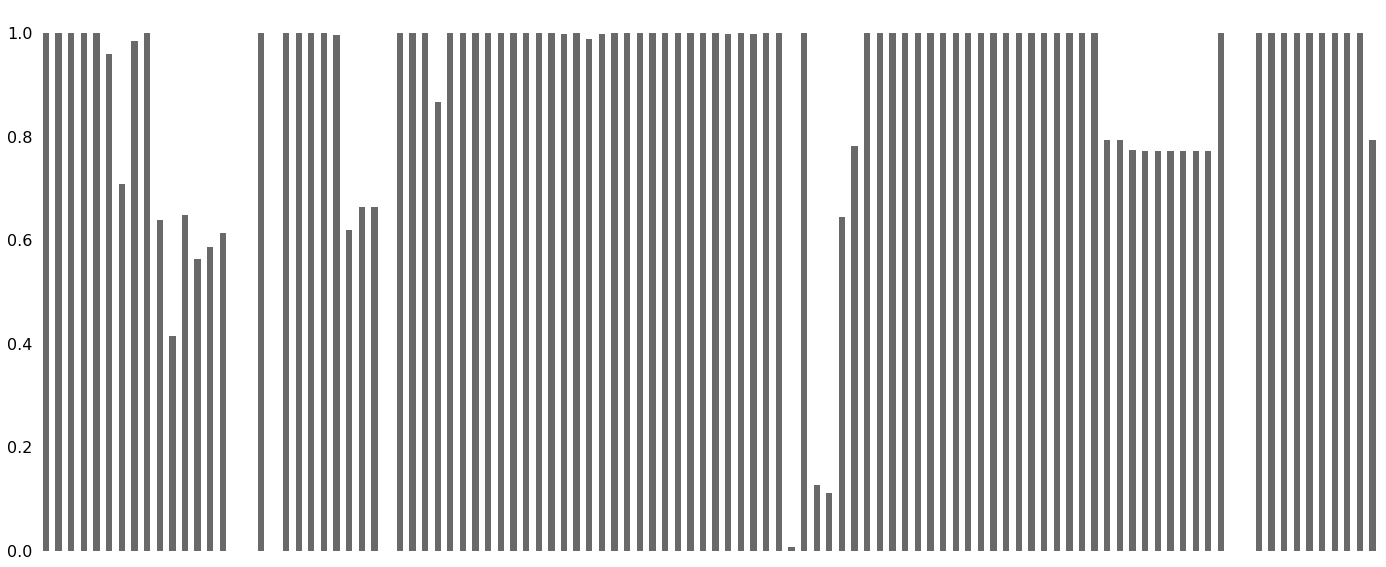

In [46]:
missingno.bar(listings_train)
plt.show()

## Numerical Features
First, we will analyze the numerical features.

In [47]:
# Function to view tukey outliers
def tukey_outliers(df_dot_column):
    '''
    Function for detecting Tukey outliers using IQR
    
    data --- dataset
    feature --- string name of feature column
    
    returns 2 vars: outlier indices & outlier values
    
    Args:
    df_dot_column -- feature's Pandas series
    '''
    x = df_dot_column
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    return floor, ceiling

In [48]:
# Function to plot CDF's
def cdf(df, column):
    '''
    Function to plot CDF of a numerical feature
    
    Args:
    df -- dataframe
    column -- feature name
    '''
    plt.hist(df[column],
             cumulative=True, density=1, histtype='step', bins=len(df[column]))
    plt.show()

For imputing w/ train and test:

Choose how you're gonna impute each feature, then create separate dataframes of those columns you'll impute with the same strategy (ie mean, median, etc). Run pipeline.

Ex:
simple_imputer_median runs simpleimputer strategy median. (for median_columns)
simple_imputer_mean runs simpleimputer strategy mean. (for mean_columns)
'num' runs standardscaler from within columntransformer. (or it can become num_pipeline for multiple transformations)
'cat' runs onehotencoder from within columntransformer.
Then you line it all up in columntransformer with the right columns selected.
listings_prepared = full_pipeline.fit_transform(listings_train)

Then later for test set:
X_test_prepared = full_pipeline.transform(X_test) #not fit_transform just transform!

In [49]:
listings_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39040 entries, 37753 to 15795
Data columns (total 58 columns):
host_since                                      39030 non-null object
host_is_superhost                               39030 non-null object
host_listings_count                             39030 non-null float64
host_total_listings_count                       39030 non-null float64
host_has_profile_pic                            39030 non-null object
host_identity_verified                          39030 non-null object
neighbourhood_cleansed                          39040 non-null object
neighbourhood_group_cleansed                    39040 non-null object
zipcode                                         38595 non-null object
latitude                                        39040 non-null float64
longitude                                       39040 non-null float64
is_location_exact                               39040 non-null object
property_type                              

In [50]:
missing_values_explore = find_missing_values(listings_explore, listings_explore.columns)
missing_values_explore

Number of missing or NaN values for each column:


{'host_since': 10,
 'host_is_superhost': 10,
 'host_listings_count': 10,
 'host_total_listings_count': 10,
 'host_has_profile_pic': 10,
 'host_identity_verified': 10,
 'neighbourhood_cleansed': 0,
 'neighbourhood_group_cleansed': 0,
 'zipcode': 445,
 'latitude': 0,
 'longitude': 0,
 'is_location_exact': 0,
 'property_type': 0,
 'room_type': 0,
 'accommodates': 0,
 'bathrooms': 47,
 'bedrooms': 23,
 'beds': 34,
 'bed_type': 0,
 'amenities': 0,
 'price': 0,
 'cleaning_fee': 8481,
 'guests_included': 0,
 'extra_people': 0,
 'minimum_nights': 0,
 'maximum_nights': 0,
 'minimum_minimum_nights': 0,
 'maximum_minimum_nights': 0,
 'minimum_maximum_nights': 0,
 'maximum_maximum_nights': 0,
 'minimum_nights_avg_ntm': 0,
 'maximum_nights_avg_ntm': 0,
 'calendar_updated': 0,
 'has_availability': 0,
 'availability_30': 0,
 'availability_60': 0,
 'availability_90': 0,
 'availability_365': 0,
 'number_of_reviews': 0,
 'number_of_reviews_ltm': 0,
 'first_review': 8084,
 'last_review': 8084,
 'review_s

## Feature: price (Independent Variable) (numerical)

In [51]:
preliminaries(listings_explore, 'price')

Dtype:  object
Missing Values:  0
$150.00      1670
$100.00      1569
$50.00       1242
$60.00       1165
$200.00      1103
$75.00       1079
$80.00       1010
$65.00        926
$70.00        924
$120.00       887
$125.00       829
$250.00       818
$90.00        797
$55.00        773
$45.00        705
$85.00        695
$175.00       633
$40.00        625
$110.00       606
$99.00        596
$95.00        571
$130.00       498
$300.00       441
$140.00       429
$180.00       416
$35.00        400
$160.00       394
$115.00       389
$225.00       357
$135.00       348
$199.00       317
$350.00       312
$69.00        297
$89.00        290
$49.00        279
$145.00       264
$105.00       257
$170.00       253
$165.00       252
$195.00       238
$59.00        235
$149.00       230
$79.00        225
$190.00       216
$30.00        206
$275.00       204
$220.00       202
$185.00       188
$400.00       179
$129.00       167
$48.00        158
$42.00        157
$155.00       154
$119.00     

In [52]:
# Remove string characters, convert to float
listings_explore['price'] = listings_explore['price'].astype('str').copy()
listings_explore['price'] = listings_explore['price'].str.replace('.00', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].str.replace('$', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].str.replace(',', '', regex=False).copy()
listings_explore['price'] = listings_explore['price'].astype('float64').copy()

In [53]:
preliminaries(listings_explore, 'price', values=False)

Dtype:  float64
Missing Values:  0


In [54]:
tukey_outliers(listings_explore.price)

(-90.0, 334.0)

In [55]:
# Check percentile of $334 ceiling price
scipy.stats.percentileofscore(listings_explore.price, 334)

93.74615778688525

Because we are looking for standard Airbnb's, we drop outliers of price above outlier 323/night. We also drop prices below 10/night because these are unrealistic accommodations which are likely mistakes (and there are very few of these).

In [56]:
# only include price in range [10, 323]
listings_explore = listings_explore[(listings_explore.price < 323) & (listings_explore.price >= 10)]

In [57]:
sum_stats(listings_explore.price)

nobs: 36432
median: 100.0
mode: [150.]
mean: 119.07444005270092
std: 66.94934559205603
minmax: (10.0, 322.0)
25% 65.0
50% 100.0
75% 157.0
skewness: 0.8964214310633671


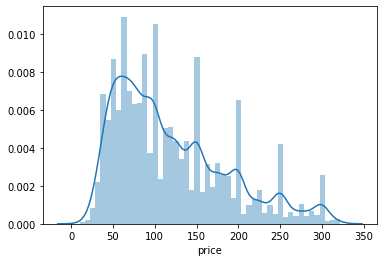

In [58]:
sns.distplot(listings_explore.price, bins=50)
plt.show()

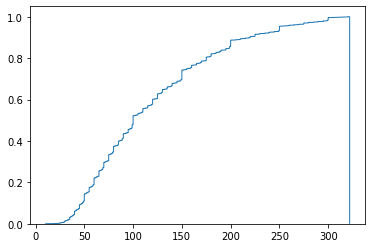

In [59]:
# CDF
cdf(listings_explore, 'price')

20% - 80% of prices are between 75 and 200 dollars, but there are sharp spikes at every 50 mark up to 300. Skews right.

In [60]:
num_attribs.append('price')

Clean.

## **Feature: number_of_reviews_ltm** (last twelve months) (discrete)

In [61]:
preliminaries(listings_explore, 'number_of_reviews_ltm')

Dtype:  int64
Missing Values:  0
0      14434
1       3128
2       2036
3       1617
4       1229
5       1013
6        836
7        718
8        661
9        586
10       496
11       455
14       406
12       405
13       400
15       359
16       333
17       314
18       313
19       302
22       287
21       276
20       274
26       240
23       233
24       233
30       217
25       210
27       207
28       190
29       190
31       183
32       178
33       171
34       160
36       158
35       156
37       153
41       144
44       134
38       134
40       124
39       123
45       113
42       112
43       108
48       107
47        98
46        97
49        89
50        84
55        74
52        71
51        68
54        65
60        59
53        59
59        48
56        48
61        44
58        44
57        42
69        30
65        30
66        27
68        27
64        26
67        26
63        25
62        25
73        21
72        21
71        21
70        20
77   

In order to isolate listings that are actually rented on a regular basis, we will assume that listings that are regularly rented will have at least 1 review in the last 12 months. Before dropping all listings with 0 reviews in ltm, we will check to confirm this is not solely due to new hosts who have not had enough time to accrue reviews:

In [62]:
# number of listings with host_since==0 and number_of_reviews_ltm==0
len(listings_explore[(listings_explore.host_since == 0) & (listings_explore.number_of_reviews_ltm == 0)])

0

Only a small fraction of the thousands of listings with 0 number_of_reviews_ltm are due to a host being new. This helps confirm that these listings are simply inactive. Therefore, we will drop listings with 0 number_of_reviews_ltm.

In [63]:
# only include number_of_reviews_ltm > 0
listings_explore = listings_explore[listings_explore.number_of_reviews_ltm > 0]

In [64]:
preliminaries(listings_explore, 'number_of_reviews_ltm')

Dtype:  int64
Missing Values:  0
1      3128
2      2036
3      1617
4      1229
5      1013
6       836
7       718
8       661
9       586
10      496
11      455
14      406
12      405
13      400
15      359
16      333
17      314
18      313
19      302
22      287
21      276
20      274
26      240
24      233
23      233
30      217
25      210
27      207
29      190
28      190
31      183
32      178
33      171
34      160
36      158
35      156
37      153
41      144
38      134
44      134
40      124
39      123
45      113
42      112
43      108
48      107
47       98
46       97
49       89
50       84
55       74
52       71
51       68
54       65
60       59
53       59
59       48
56       48
58       44
61       44
57       42
65       30
69       30
66       27
68       27
67       26
64       26
63       25
62       25
71       21
72       21
73       21
70       20
77       19
75       15
78       14
74       13
85       12
79       12
81       11
76     

In [65]:
sum_stats(listings_explore.number_of_reviews_ltm)

nobs: 21998
median: 8.0
mode: [1]
mean: 15.640785525956906
std: 18.4863398234607
minmax: (1, 282)
25% 3.0
50% 8.0
75% 23.0
skewness: 2.4239319779583917


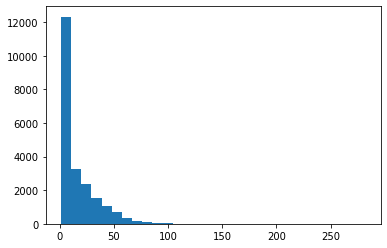

In [66]:
plt.hist(listings_explore.number_of_reviews_ltm, bins=30)
plt.show()

In [67]:
tukey_outliers(listings_explore.number_of_reviews_ltm)

(-27.0, 53.0)

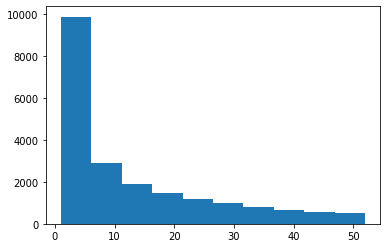

In [68]:
# Zoom <53 reviews
plt.hist(listings_explore[listings_explore.number_of_reviews_ltm<=52].number_of_reviews_ltm)
plt.show()

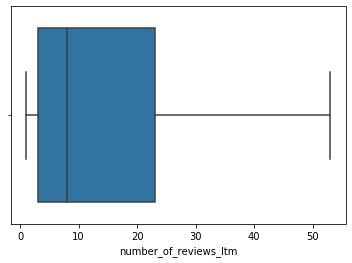

In [69]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.number_of_reviews_ltm, showfliers=False)
plt.show()

Most hosts have <20 reviews, dropping off around 100 but outliers spread all the way to 600+. Skews right.

In [70]:
disc_attribs.append('number_of_reviews_ltm')

Clean.

## **Feature: host_since** (discrete)

In [71]:
preliminaries(listings_explore, 'host_since')

Dtype:  object
Missing Values:  4
2018-10-08    123
2017-06-27     62
2016-03-03     59
2018-05-22     48
2014-05-28     37
2013-07-15     35
2017-03-14     35
2015-12-07     32
2017-03-07     32
2015-11-04     31
2015-12-16     31
2018-08-13     27
2014-04-29     26
2018-11-06     26
2012-04-11     26
2014-10-14     25
2014-02-14     25
2016-12-16     25
2017-11-16     25
2014-12-26     25
2018-11-18     24
2017-05-23     24
2014-07-17     24
2018-07-09     23
2011-12-05     23
2014-06-30     23
2013-07-02     23
2016-02-22     22
2016-03-17     22
2016-03-22     22
2015-08-01     22
2015-06-12     21
2014-03-20     21
2015-10-02     21
2017-01-29     21
2015-12-17     21
2016-04-04     21
2014-07-07     21
2015-08-04     21
2012-05-01     21
2017-10-11     20
2013-10-07     20
2015-10-27     20
2017-10-28     20
2018-06-22     20
2014-08-12     20
2018-12-03     20
2018-09-05     20
2014-05-29     19
2015-11-03     19
2019-02-22     19
2018-07-24     19
2013-02-20     19
2014-12-07  

We will convert host_since to how many years host has been a host.

In [72]:
# Convert to how many years host
listings_explore['host_since'] = 2019 - listings_explore['host_since'].str[:4].astype('float64')

In [73]:
# Identify indices of missing values (True)
listings_explore.host_since.isnull().sort_values()

37753    False
21825    False
36430    False
11167    False
35092    False
13338    False
10753    False
37719    False
362      False
21004    False
36257    False
44105    False
38620    False
45622    False
40946    False
22787    False
29527    False
15797    False
20557    False
5302     False
36865    False
37120    False
2925     False
14515    False
5310     False
31817    False
27408    False
19280    False
36063    False
18547    False
15457    False
39730    False
33262    False
41890    False
22       False
1128     False
32322    False
16160    False
29612    False
23418    False
36941    False
41380    False
42456    False
30755    False
19416    False
36588    False
5639     False
36067    False
16980    False
31335    False
24687    False
10995    False
36114    False
34954    False
5967     False
21742    False
34227    False
35907    False
28069    False
43219    False
34862    False
12661    False
3856     False
20843    False
35354    False
35905    False
23235    F

In [74]:
# Check a missing value index
listings_explore.loc[9339]

host_since                                                                                    NaN
host_is_superhost                                                                             NaN
host_listings_count                                                                           NaN
host_total_listings_count                                                                     NaN
host_has_profile_pic                                                                          NaN
host_identity_verified                                                                        NaN
neighbourhood_cleansed                                                            Upper West Side
neighbourhood_group_cleansed                                                            Manhattan
zipcode                                                                                     10023
latitude                                                                                  40.7741
longitude           

Remove missing values because there are only 4 and many features have these same 4 rows missing values.

In [75]:
# Remove missing values
#listings_explore = listings_explore[listings_explore.host_since.notnull()].copy()

In [76]:
# Convert dtype to int
listings_explore['host_since'] = listings_explore.host_since.astype('float64')

In [77]:
preliminaries(listings_explore, 'host_since')

Dtype:  float64
Missing Values:  4
4.0     3220
5.0     3151
3.0     2956
1.0     2686
6.0     2591
2.0     2389
7.0     2116
8.0     1267
0.0      896
9.0      513
10.0     193
11.0      16
Name: host_since, dtype: int64


In [78]:
sum_stats(listings_explore.host_since.dropna())

nobs: 21994
median: 4.0
mode: [4.]
mean: 4.191324906792762
std: 2.3706946253180505
minmax: (0.0, 11.0)
25% 2.0
50% 4.0
75% 6.0
skewness: 0.17188379478247912


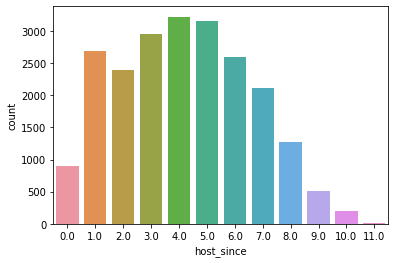

In [79]:
# Countplot
sns.countplot(listings_explore.host_since)
plt.show()

Most hosts are spread rather evenly between 1 year and 7 years. 0 and 8-10 years are still significant amount. Skews slightly right.

In [80]:
disc_attribs.append('host_since')

Ready to impute.

## **Feature: number_of_reviews** (discrete)

In [81]:
preliminaries(listings_explore, 'number_of_reviews')

Dtype:  int64
Missing Values:  0
1      1826
2      1366
3      1170
4       977
5       859
6       742
7       652
8       642
9       541
10      479
11      437
12      422
13      368
14      364
16      310
17      306
15      294
18      280
20      257
19      239
21      236
22      235
25      209
23      202
24      201
27      177
26      177
31      173
30      168
28      167
32      159
33      154
37      147
35      138
29      138
34      132
36      130
42      121
39      120
45      118
38      118
40      114
47      113
41      112
49      111
44      103
43      100
56      100
50       99
46       96
48       94
54       93
51       86
57       83
55       82
53       77
60       76
67       76
61       75
62       75
66       73
52       72
64       72
71       71
59       71
75       70
70       69
63       68
68       62
58       62
74       61
82       61
85       57
65       57
72       56
73       56
81       55
69       53
80       50
89       50
88     

In [82]:
sum_stats(listings_explore.number_of_reviews)

nobs: 21998
median: 15.0
mode: [1]
mean: 36.58668969906355
std: 52.61377490330862
minmax: (1, 609)
25% 5.0
50% 15.0
75% 47.0
skewness: 2.8773175319133326


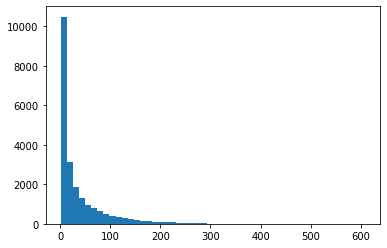

In [83]:
plt.hist(listings_explore.number_of_reviews, bins=50)
plt.show()

In [84]:
tukey_outliers(listings_explore.number_of_reviews)

(-58.0, 110.0)

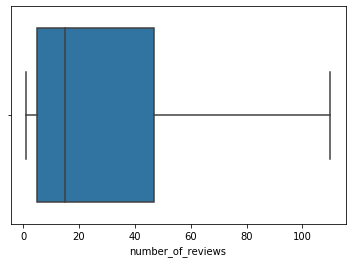

In [85]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.number_of_reviews, showfliers=False)
plt.show()

Nearly all hosts have 100 reviews or less, with most closer to 0 than 100. Skews right.

In [86]:
disc_attribs.append('number_of_reviews')

Clean.

## **Feature: host_listings_count** (discrete) (for analysis only)

In [87]:
preliminaries(listings_explore, 'host_listings_count')

Dtype:  float64
Missing Values:  4
1.0       11548
2.0        4142
3.0        1939
4.0         999
5.0         620
6.0         435
7.0         331
8.0         306
9.0         137
10.0        135
11.0        117
297.0       111
12.0         98
0.0          88
15.0         72
13.0         59
91.0         55
14.0         46
17.0         46
22.0         44
52.0         43
34.0         43
29.0         41
117.0        41
16.0         40
35.0         38
28.0         37
48.0         37
50.0         29
18.0         26
97.0         24
1108.0       22
21.0         21
19.0         21
39.0         20
25.0         19
44.0         18
155.0        15
593.0        13
31.0         12
27.0         11
84.0         10
26.0         10
33.0          9
43.0          8
40.0          7
151.0         7
814.0         7
38.0          6
42.0          6
20.0          4
32.0          4
24.0          4
63.0          3
220.0         3
408.0         2
23.0          1
86.0          1
150.0         1
102.0         1
45.0 

A host can't have 0 listings, so this must be a mistake. We will consider 0 values to be Nan.

In [88]:
# Amount of listings with 0 host_listings_count
len(listings_explore[listings_explore.host_listings_count == 0])

88

In [89]:
# Convert 0 values to Nan
listings_explore['host_listings_count'] = listings_explore.host_listings_count.replace(0.0, np.nan).astype('float64')

In [90]:
# Confirm no more 0 host_listings_count
preliminaries(listings_explore, 'host_listings_count', values=False)

Dtype:  float64
Missing Values:  92


In [91]:
sum_stats(listings_explore.host_listings_count.dropna())

nobs: 21906
median: 1.0
mode: [1.]
mean: 7.1070939468638725
std: 46.887025783622555
minmax: (1.0, 1108.0)
25% 1.0
50% 1.0
75% 3.0
skewness: 17.141199112472787


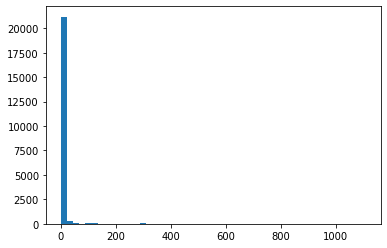

In [92]:
plt.hist(listings_explore.host_listings_count.dropna(), bins=50)
plt.show()

In [93]:
tukey_outliers(listings_explore.host_listings_count.dropna())

(-2.0, 6.0)

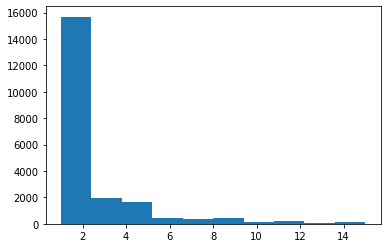

In [94]:
# Hist of host_listings_count <= 15
plt.hist(listings_explore[listings_explore.host_listings_count <= 15].host_listings_count)
plt.show()

Nearly all hosts have only 1 listing, but it spreads all the way past 1000. Skews right.

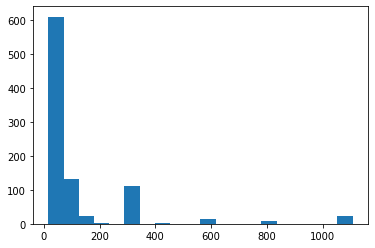

In [95]:
# Hist of host_listings_count >= 15
plt.hist(listings_explore[listings_explore.host_listings_count > 15].host_listings_count, bins=20)
plt.show()

Fill missing values manually since feature won't be in model.

In [96]:
# Fill missing values (can do this now because feature will be dropped)
listings_explore['host_listings_count'] = listings_explore.host_listings_count.fillna(1.0)

In [97]:
#disc_attribs.append('host_listings_count')
drop_later.append('host_listings_count')

Clean.

## **Feature: host_total_listings_count**

In [98]:
print((listings_explore['host_listings_count'] == listings_explore['host_total_listings_count']).sum())
print()
print(len(listings_explore['host_listings_count']))
print(len(listings_explore['host_total_listings_count']))
print()
print(missing_values_explore['host_total_listings_count'])
print(missing_values_explore['host_total_listings_count'])

21906

21998
21998

10
10


We can see that these columns' values are exactly the same, so we will drop this one (host_total_listings_count).

In [99]:
listings_explore.drop(columns='host_total_listings_count', inplace=True)
dropped_cols.append('host_total_listings_count')

## **Feature: latitude**

In [100]:
preliminaries(listings_explore, 'latitude')

Dtype:  float64
Missing Values:  0
40.68757    8
40.69454    8
40.71813    7
40.68634    7
40.72147    7
40.69054    7
40.68374    7
40.74474    7
40.70713    7
40.71353    7
40.68709    7
40.67757    7
40.71515    7
40.76195    6
40.68352    6
40.71106    6
40.69034    6
40.68864    6
40.69295    6
40.68613    6
40.71681    6
40.69306    6
40.70740    6
40.72018    6
40.71923    6
40.76189    6
40.67293    6
40.68853    6
40.67731    6
40.69155    6
40.70644    6
40.72699    6
40.76942    6
40.71081    6
40.68563    6
40.70803    6
40.70732    6
40.70766    6
40.70750    6
40.76152    6
40.72290    6
40.68615    6
40.76284    6
40.73850    6
40.72859    6
40.67520    6
40.69854    6
40.68812    6
40.76494    6
40.72607    6
40.72829    6
40.68910    6
40.69389    6
40.76404    6
40.71890    6
40.71790    6
40.76364    6
40.71895    6
40.71301    6
40.72820    6
40.68994    6
40.77029    6
40.68782    6
40.71110    6
40.70833    5
40.70819    5
40.72528    5
40.70721    5
40.68599    5

In [101]:
num_attribs.append('latitude')

Clean.

## **Feature: Longitude**

In [102]:
preliminaries(listings_explore, 'longitude')

Dtype:  float64
Missing Values:  0
-73.95166    11
-73.95677    10
-73.98954    10
-73.94556    10
-73.95427    10
-73.95016    10
-73.95392     9
-73.95742     9
-73.95541     9
-73.95667     9
-73.95275     9
-73.95154     9
-73.94994     9
-73.95292     9
-73.94426     9
-73.94913     9
-73.94547     8
-73.95675     8
-73.95386     8
-73.94578     8
-73.94465     8
-73.99573     8
-73.98303     8
-73.93979     8
-73.95470     8
-73.95402     8
-73.95688     8
-73.94051     8
-73.95522     8
-73.94717     8
-73.93830     8
-73.95231     8
-73.98915     8
-73.94686     8
-73.95136     8
-73.95249     8
-73.94861     8
-73.95810     8
-73.93967     8
-73.95536     7
-73.94349     7
-73.95444     7
-73.93502     7
-73.93913     7
-73.94370     7
-73.95812     7
-73.94827     7
-73.99257     7
-73.95026     7
-73.98236     7
-73.95155     7
-73.98702     7
-73.94648     7
-73.95372     7
-73.98347     7
-73.95211     7
-73.94300     7
-73.95732     7
-73.98539     7
-73.95405     7
-73.9

In [103]:
num_attribs.append('longitude')

Clean.

## **Feature: accommodates** (discrete)

In [104]:
preliminaries(listings_explore, 'accommodates')

Dtype:  int64
Missing Values:  0
2     10417
4      3423
1      2913
3      2618
6      1012
5       924
8       274
7       202
10       93
9        47
12       23
16       20
11       11
14        9
13        9
15        3
Name: accommodates, dtype: int64


In [105]:
sum_stats(listings_explore.accommodates)

nobs: 21998
median: 2.0
mode: [2]
mean: 2.8161196472406584
std: 1.682256249145391
minmax: (1, 16)
25% 2.0
50% 2.0
75% 4.0
skewness: 2.1068170931469448


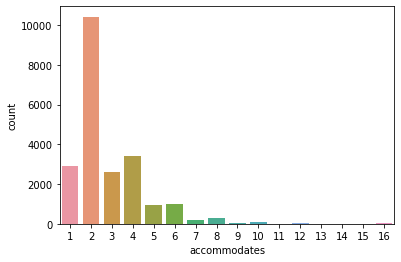

In [106]:
sns.countplot(listings_explore.accommodates)
plt.show()

Most accommodate 2, many ranging from 1-6. Skews right.

In [107]:
disc_attribs.append('accommodates')

Clean.

## **Feature: bathrooms** (discrete)

In [108]:
preliminaries(listings_explore, 'bathrooms')

Dtype:  float64
Missing Values:  14
1.0    19156
2.0     1448
1.5      991
2.5      123
3.0      111
0.0       51
0.5       51
4.0       20
3.5       17
6.0        7
6.5        6
7.0        2
5.0        1
Name: bathrooms, dtype: int64


In [109]:
sum_stats(listings_explore.bathrooms.dropna())

nobs: 21984
median: 1.0
mode: [1.]
mean: 1.1118995633187774
std: 0.36543855004584563
minmax: (0.0, 7.0)
25% 1.0
50% 1.0
75% 1.0
skewness: 4.638480022358254


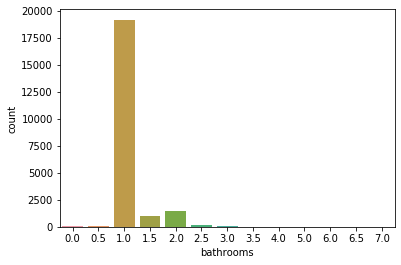

In [110]:
sns.countplot(listings_explore.bathrooms)
plt.show()

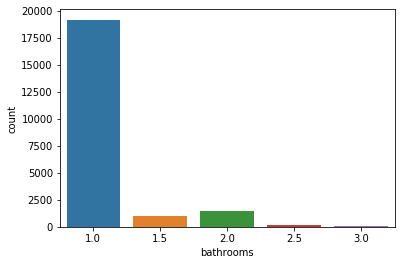

In [111]:
# hist of bathrooms between 1 & 3
sns.countplot((listings_explore[(listings_explore.bathrooms <= 3) & (listings_explore.bathrooms >= 1)]).bathrooms)
plt.show()

Nearly all listings have 1 bathroom. Skews right.

In [112]:
disc_attribs.append('bathrooms')

Ready to impute.

## **Feature: bedrooms** (discrete)

In [113]:
preliminaries(listings_explore, 'bedrooms')

Dtype:  float64
Missing Values:  11
1.0    16267
2.0     2796
0.0     1977
3.0      771
4.0      155
5.0       14
6.0        4
7.0        2
9.0        1
Name: bedrooms, dtype: int64


In [114]:
sum_stats(listings_explore.bedrooms.dropna())

nobs: 21987
median: 1.0
mode: [1.]
mean: 1.1328967116932733
std: 0.6512091143955939
minmax: (0.0, 9.0)
25% 1.0
50% 1.0
75% 1.0
skewness: 1.6047263383243688


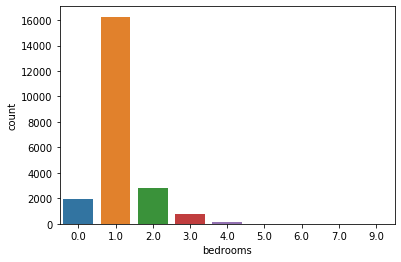

In [115]:
sns.countplot(listings_explore.bedrooms)

Most listings have 1 bedroom, some have 0, 2, and 3. Skews right.

In [116]:
# View listings with >4 bedrooms
listings_explore[listings_explore.bedrooms > 4][['bedrooms', 'beds', 'bathrooms', 'price']]

bedrooms  beds  bathrooms  price
43428       5.0   6.0        3.0  250.0
28040       7.0   7.0        2.0  265.0
2656        5.0   1.0        1.0   69.0
10138       5.0   5.0        3.0  225.0
22781       5.0   7.0        2.0  289.0
25971       6.0   1.0        1.0  150.0
4560        6.0   8.0        2.5  160.0
5927        5.0   7.0        3.5  310.0
25887       6.0   6.0        2.5   86.0
6174        5.0   6.0        2.5  300.0
47255       5.0   5.0        2.0  299.0
6405        5.0   4.0        2.0  225.0
8746        6.0   1.0        1.0  140.0
35653       5.0   6.0        2.0  249.0
807         9.0  16.0        3.0  300.0
36327       5.0   1.0        2.0   38.0
45167       5.0   6.0        2.0  299.0
44018       5.0   6.0        2.0  260.0
43210       5.0   9.0        2.0  275.0
43527       7.0   1.0        1.5   37.0
22436       5.0   5.0        2.0  225.0

Although these are not completely "ordinary", as most NYC apartments have <=3 bedrooms, they are not so out of out of the ordinary that we should consider them inaccurate. They could be large apartments, houses, etc. We will keep them.

In [117]:
disc_attribs.append('bedrooms')

Ready to impute.

## **Feature: beds** (discrete)

In [118]:
preliminaries(listings_explore, 'beds')

Dtype:  float64
Missing Values:  5
1.0     13650
2.0      4853
3.0      1677
0.0       744
4.0       680
5.0       217
6.0       104
8.0        24
7.0        22
9.0         7
10.0        4
12.0        4
11.0        3
13.0        2
14.0        1
16.0        1
Name: beds, dtype: int64


In [119]:
sum_stats(listings_explore.beds.dropna())

nobs: 21993
median: 1.0
mode: [1.]
mean: 1.518755967807939
std: 1.0178587474497025
minmax: (0.0, 16.0)
25% 1.0
50% 1.0
75% 2.0
skewness: 2.6337905237694295


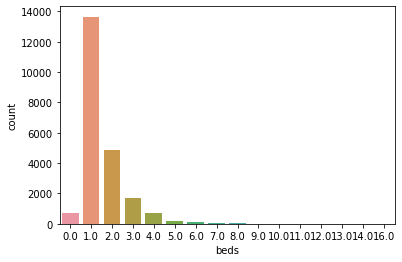

In [120]:
sns.countplot(listings_explore.beds)
plt.show()

Most have 1 bed, some have 2 and 3, only a few have more and a few have 0.

In [121]:
disc_attribs.append('beds')

Ready to impute.

## **Feature: cleaning_fee**

In [122]:
preliminaries(listings_explore, 'cleaning_fee')

Dtype:  object
Missing Values:  2719
$50.00     1944
$100.00    1758
$25.00     1311
$30.00     1237
$75.00     1118
$20.00     1101
$0.00      1086
$60.00      885
$40.00      831
$15.00      731
$10.00      705
$80.00      687
$150.00     661
$35.00      567
$70.00      362
$120.00     352
$125.00     306
$45.00      287
$65.00      283
$85.00      272
$90.00      251
$95.00      191
$55.00      181
$200.00     165
$5.00       151
$99.00      116
$49.00       91
$130.00      81
$12.00       80
$110.00      78
$29.00       73
$175.00      68
$18.00       65
$39.00       61
$160.00      52
$250.00      50
$140.00      50
$69.00       49
$59.00       49
$79.00       43
$8.00        39
$19.00       36
$135.00      36
$6.00        34
$115.00      31
$105.00      31
$89.00       28
$7.00        28
$9.00        25
$17.00       21
$145.00      19
$13.00       18
$48.00       16
$195.00      16
$28.00       15
$165.00      15
$155.00      15
$199.00      14
$23.00       13
$180.00      12
$27

In [123]:
# Remove string characters, convert to float
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace('$', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace('.00', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.str.replace(',', '', regex=False)
listings_explore['cleaning_fee'] = listings_explore.cleaning_fee.astype('float64')

In [124]:
preliminaries(listings_explore, 'cleaning_fee')

Dtype:  float64
Missing Values:  2719
50.0     1944
100.0    1758
25.0     1311
30.0     1237
75.0     1118
20.0     1101
0.0      1086
60.0      885
40.0      831
15.0      731
10.0      705
80.0      687
150.0     661
35.0      567
70.0      362
120.0     352
125.0     306
45.0      287
65.0      283
85.0      272
90.0      251
95.0      191
55.0      181
200.0     165
5.0       151
99.0      116
49.0       91
130.0      81
12.0       80
110.0      78
29.0       73
175.0      68
18.0       65
39.0       61
160.0      52
250.0      50
140.0      50
69.0       49
59.0       49
79.0       43
8.0        39
135.0      36
19.0       36
6.0        34
105.0      31
115.0      31
89.0       28
7.0        28
9.0        25
17.0       21
145.0      19
13.0       18
195.0      16
48.0       16
165.0      15
155.0      15
28.0       15
199.0      14
23.0       13
180.0      12
27.0       12
16.0       11
149.0      11
24.0       11
300.0      11
38.0       11
22.0       11
98.0       10
170.0     

In [125]:
sum_stats(listings_explore.cleaning_fee.dropna())

nobs: 19279
median: 50.0
mode: [50.]
mean: 59.23035427148711
std: 45.99522070457579
minmax: (0.0, 600.0)
25% 25.0
50% 50.0
75% 85.0
skewness: 1.6209885047725725


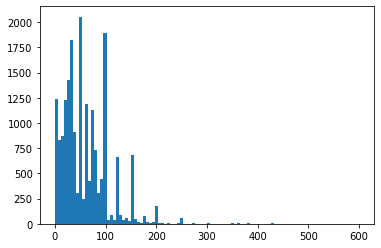

In [126]:
plt.hist(listings_explore.cleaning_fee.dropna(), bins=100)
plt.show()

In [127]:
tukey_outliers(listings_explore.cleaning_fee.dropna())

(-65.0, 175.0)

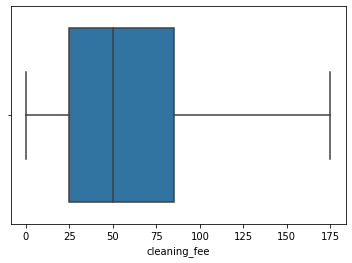

In [128]:
# Boxplot w/o outliers
sns.boxplot(listings_explore.cleaning_fee.dropna(), showfliers=False)
plt.show()

Cleaning fees vary between 0 and 200, with mean around 60 and median/mode at 50. Outliers up to 600. Skews right.

In [129]:
num_attribs.append('cleaning_fee')

Ready to impute.

## **Feature: guests_included** (discrete)

In [130]:
preliminaries(listings_explore, 'guests_included')

Dtype:  int64
Missing Values:  0
1     14569
2      5095
4      1106
3       694
6       234
5       201
8        52
7        21
10       15
16        6
9         5
Name: guests_included, dtype: int64


In [131]:
sum_stats(listings_explore.guests_included)

nobs: 21998
median: 1.0
mode: [1]
mean: 1.5695972361123738
std: 1.0859952450199053
minmax: (1, 16)
25% 1.0
50% 1.0
75% 2.0
skewness: 3.206714798294352


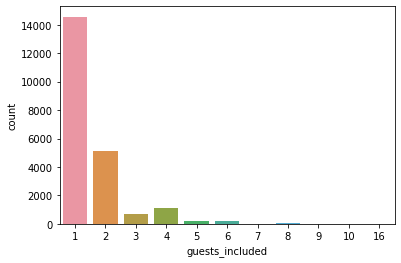

In [132]:
sns.countplot(listings_explore.guests_included)
plt.show()

Most guests included are 1, some are 2 and a few are 3 and 4. The rest up to 16 are hardly any.

In [133]:
disc_attribs.append('guests_included')

Clean.

## **Feature: extra_people**

Cost per additional person.

In [134]:
preliminaries(listings_explore, 'extra_people')

Dtype:  object
Missing Values:  0
$0.00      9154
$25.00     2259
$20.00     2090
$10.00     1721
$15.00     1379
$50.00     1274
$30.00     1031
$40.00      487
$35.00      415
$5.00       388
$75.00      214
$100.00     202
$45.00      126
$60.00      120
$12.00      102
$19.00       76
$7.00        66
$18.00       53
$8.00        51
$55.00       49
$80.00       49
$29.00       42
$49.00       40
$39.00       38
$300.00      37
$9.00        33
$150.00      32
$17.00       30
$65.00       30
$70.00       28
$28.00       25
$200.00      25
$22.00       24
$24.00       19
$6.00        18
$14.00       18
$16.00       16
$13.00       15
$85.00       15
$69.00       15
$21.00       14
$11.00       12
$38.00       10
$26.00       10
$37.00       10
$95.00        9
$32.00        8
$23.00        8
$90.00        8
$250.00       7
$36.00        7
$33.00        7
$125.00       6
$27.00        6
$99.00        5
$34.00        5
$48.00        5
$120.00       4
$77.00        4
$79.00        4
$59.00

In [135]:
# Remove string characters, convert to float
listings_explore['extra_people'] = listings_explore.extra_people.str.replace('$', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.str.replace('.00', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.str.replace(',', '', regex=False)
listings_explore['extra_people'] = listings_explore.extra_people.astype('float64')

In [136]:
preliminaries(listings_explore, 'extra_people')

Dtype:  float64
Missing Values:  0
0.0      9154
25.0     2259
20.0     2090
10.0     1721
15.0     1379
50.0     1274
30.0     1031
40.0      487
35.0      415
5.0       388
75.0      214
100.0     202
45.0      126
60.0      120
12.0      102
19.0       76
7.0        66
18.0       53
8.0        51
55.0       49
80.0       49
29.0       42
49.0       40
39.0       38
300.0      37
9.0        33
150.0      32
65.0       30
17.0       30
70.0       28
200.0      25
28.0       25
22.0       24
24.0       19
6.0        18
14.0       18
16.0       16
85.0       15
69.0       15
13.0       15
21.0       14
11.0       12
26.0       10
37.0       10
38.0       10
95.0        9
32.0        8
23.0        8
90.0        8
250.0       7
36.0        7
33.0        7
125.0       6
27.0        6
99.0        5
34.0        5
48.0        5
77.0        4
59.0        4
43.0        4
120.0       4
79.0        4
74.0        3
73.0        3
57.0        2
98.0        2
31.0        2
62.0        2
89.0        2

In [137]:
sum_stats(listings_explore.extra_people)

nobs: 21998
median: 10.0
mode: [0.]
mean: 17.015410491862898
std: 24.58359286094277
minmax: (0.0, 300.0)
25% 0.0
50% 10.0
75% 25.0
skewness: 4.385639195835524


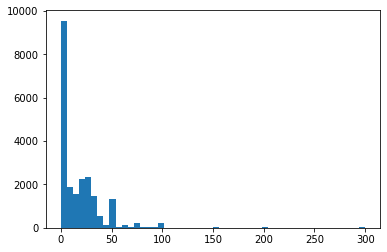

In [138]:
plt.hist(listings_explore.extra_people, bins=50)
plt.show()

In [139]:
tukey_outliers(listings_explore.extra_people)

(-37.5, 62.5)

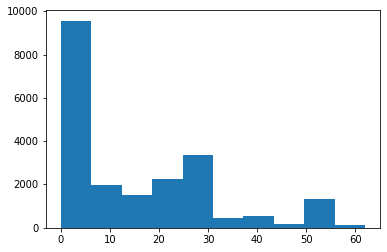

In [140]:
# Hist w/o outliers
plt.hist(listings_explore[listings_explore.extra_people <= 62.5].extra_people)
plt.show()

Most are 0, median is 10, skews right, outliers begin at 62.5 up to 300.

In [141]:
num_attribs.append('extra_people')

Clean.

## **Feature: minimum_nights** (discrete)

In [142]:
preliminaries(listings_explore, 'minimum_nights')

Dtype:  int64
Missing Values:  0
2      6134
1      5706
3      3828
4      1538
30     1342
5      1263
7       721
6       316
10      191
14      165
28       92
15       84
20       81
29       76
31       76
8        55
21       41
60       36
12       35
25       33
9        32
90       17
13       17
18       11
11        8
27        8
45        8
180       6
23        5
120       5
22        5
270       4
365       4
100       4
50        4
26        4
70        3
24        3
40        3
19        3
80        2
240       2
32        2
35        2
16        2
59        2
68        1
52        1
222       1
300       1
44        1
91        1
17        1
33        1
75        1
250       1
210       1
58        1
265       1
999       1
115       1
150       1
133       1
36        1
47        1
Name: minimum_nights, dtype: int64


How there are minimum_nights values above 180 when the MAXIMUM airbnb allows is 6 months (180 days)? One solution is to drop the rows for which minimum_nights exceeds 180, another is to drop the feature altogether.

Because we are measuring standard Airbnb's, we are not measuring long-term Airbnb's. Therefore we should drop all rows whose minimum_nights exceed 7 nights. This has been chosen because a week seems like a reasonable amount of time for a minimum for a standard type of room that hasn't been heavily discounted due to quantity of long-term stay.

In [143]:
# only include minimum_nights <= 7
listings_explore = listings_explore[listings_explore.minimum_nights <= 7].copy()

In [144]:
sum_stats(listings_explore.minimum_nights)

nobs: 19506
median: 2.0
mode: [2]
mean: 2.505280426535425
std: 1.5215104025115558
minmax: (1, 7)
25% 1.0
50% 2.0
75% 3.0
skewness: 1.2214395564997413


In [145]:
tukey_outliers(listings_explore.minimum_nights)

(-2.0, 6.0)

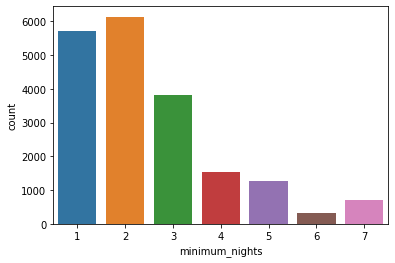

In [146]:
sns.countplot(listings_explore.minimum_nights)
plt.show()

Most listings have 1-3 night minimum, but it ranges up to 7, with outliers at 6+. Skews right.

In [147]:
disc_attribs.append('minimum_nights')

Ready to impute.

## **Feature: maximum_nights** (discrete)

In [148]:
preliminaries(listings_explore, 'maximum_nights')

Dtype:  int64
Missing Values:  0
1125     8591
30       1631
14        819
28        596
7         591
90        556
60        551
10        445
365       441
29        438
21        401
15        386
20        321
31        298
1124      282
25        225
5         215
180       178
8         156
4         148
6         141
120       131
3         123
27        119
45        109
100       102
12        100
40         81
9          80
35         62
16         59
2          59
13         50
360        49
300        49
1000       42
200        42
18         40
22         37
26         36
32         35
24         34
11         31
17         31
50         30
150        29
730        28
1          19
1120       18
62         17
125        16
999        16
19         15
99         15
65         14
70         14
23         13
1123       13
75         13
33         12
500        10
61          9
80          9
250         8
36          8
364         8
93          7
112         7
160         6
4

How there are maximum_nights values above 180 when the MAXIMUM airbnb allows is 6 months (180 days)? One solution is to drop the rows for which maximum_nights exceeds 180, another is to drop the feature altogether.

Maximum nights need not be filtered because we ensured minimum nights cannot exceed 7 nights, so pricing should remain short-term stay price.

In [149]:
sum_stats(listings_explore.maximum_nights)

nobs: 19506
median: 180.0
mode: [1125]
mean: 555.6846611299087
std: 706.7853914080637
minmax: (1, 60000)
25% 28.0
50% 180.0
75% 1125.0
skewness: 31.337019025454545


In [150]:
tukey_outliers(listings_explore.maximum_nights)

(-1617.5, 2770.5)

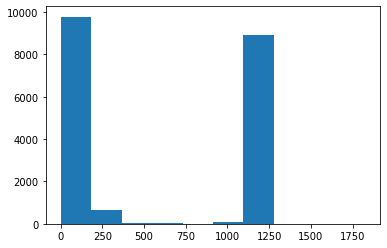

In [151]:
plt.hist(listings_explore[listings_explore.maximum_nights <= 2000].maximum_nights)
plt.show()

There is a surprisingly high mode at 1125 maximum_nights with a large gap before and after that number. This may be the maximum allowable by the Airbnb fill-in field. We will use 180 as a bin for any number of nights above 180 because 6 months is the max length of stay for short-term Airbnb as per policy.

In [152]:
# Cap maximum_nights at 180
listings_explore['maximum_nights'].values[listings_explore.maximum_nights > 180] = 180

In [153]:
sum_stats(listings_explore.maximum_nights)

nobs: 19506
median: 180.0
mode: [180]
mean: 106.64252025017943
std: 76.91872495258504
minmax: (1, 180)
25% 28.0
50% 180.0
75% 180.0
skewness: -0.16872493511923184


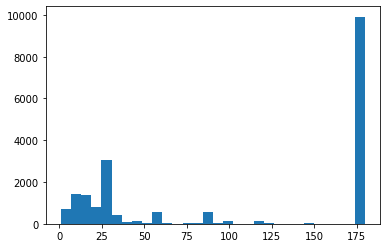

In [154]:
plt.hist(listings_explore.maximum_nights, bins=30)
plt.show()

Distribution's mode is at 180 maximum_nights, skewed left with some grouping around 0 to 25.

In [155]:
disc_attribs.append('maximum_nights')

**Features: minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm**

We will drop these specific features in lieu of the features: minimum_nights and maximum_nights. NTM means 'next twelve months.'

In [156]:
listings_explore.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True)
dropped_cols.extend(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'])

## **Feature: availability_30** (discrete)

In [157]:
preliminaries(listings_explore, 'availability_30')

Dtype:  int64
Missing Values:  0
0     6578
2     1296
1     1091
3     1045
4      939
5      770
6      741
7      588
8      541
30     477
10     465
9      458
11     382
12     368
13     286
29     279
14     266
15     252
17     250
16     232
18     229
19     227
24     218
28     216
25     207
23     207
20     200
22     190
26     189
27     162
21     157
Name: availability_30, dtype: int64


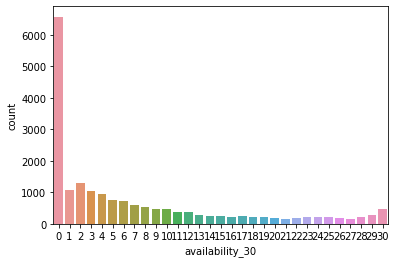

In [158]:
sns.countplot(listings_explore.availability_30)
plt.show()

Mode is at 0 availability_30 with small amounts ranging from 1-30. Skews right.

In [159]:
disc_attribs.append('availability_30')

Clean.

## **Feature: availability_60**

In [160]:
preliminaries(listings_explore, 'availability_60')

Dtype:  int64
Missing Values:  0
0     5137
1      653
60     445
3      408
4      403
5      402
2      388
6      373
7      373
8      358
9      354
10     339
32     330
11     328
12     299
17     282
14     278
13     267
16     265
59     263
19     263
15     258
18     255
20     227
27     226
25     224
33     222
23     220
31     220
34     209
24     206
21     203
26     201
22     198
58     195
29     193
28     193
38     187
36     183
47     182
35     181
37     178
30     178
40     175
44     172
39     171
42     170
54     169
41     166
53     164
48     157
55     151
52     150
56     149
43     147
46     145
49     143
45     138
51     134
50     129
57     129
Name: availability_60, dtype: int64


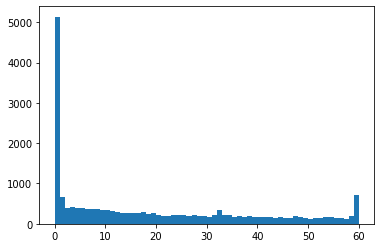

In [161]:
plt.hist(listings_explore.availability_60, bins=60)
plt.show()

Mode at 0 with a small spike at 60. Skews right.

In [162]:
disc_attribs.append('availability_60')

Clean.

## **Feature: availability_90**

In [163]:
preliminaries(listings_explore, 'availability_90')

Dtype:  int64
Missing Values:  0
0     4522
90     420
1      388
6      261
89     252
62     251
31     248
2      248
10     243
12     242
16     238
4      231
15     231
3      227
11     225
7      221
8      219
5      217
9      217
13     215
20     212
14     203
88     201
22     197
17     194
32     187
27     187
19     183
18     181
29     175
21     173
23     171
24     170
63     169
61     169
33     168
25     161
64     160
28     158
77     158
84     155
71     154
35     152
57     152
53     148
83     146
52     146
72     144
86     143
58     142
47     141
49     141
30     140
69     138
26     138
66     137
70     136
85     135
51     135
36     134
55     134
38     134
78     134
34     133
54     133
67     133
74     129
44     129
43     128
75     127
65     127
68     127
60     126
37     126
79     123
76     122
39     121
81     121
73     120
45     119
46     116
56     115
87     114
82     113
42     112
40     109
50     108
80     108

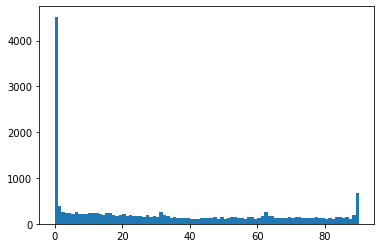

In [164]:
plt.hist(listings_explore.availability_90, bins=90)
plt.show()

Mode at 0 with small spike at 90, skews right.

In [165]:
disc_attribs.append('availability_90')

Clean.

## **Feature: availability_365**

In [166]:
preliminaries(listings_explore, 'availability_365')

Dtype:  int64
Missing Values:  0
0      3782
365     245
1       245
153     161
2       146
3       137
4       135
31      128
6       124
62      120
10      120
7       109
364     105
5       104
12      102
90      101
89       98
179      95
16       93
8        91
337      90
9        88
17       88
363      86
15       85
13       83
20       82
88       79
29       77
361      76
57       76
11       76
14       74
61       74
63       73
24       73
83       72
60       71
23       71
84       70
180      69
19       69
338      68
339      67
54       66
28       66
58       65
44       65
122      65
306      65
81       65
18       65
22       64
53       64
25       64
70       63
51       63
214      63
73       63
342      63
77       62
275      62
21       62
49       62
358      61
35       61
27       61
350      61
32       61
39       60
359      60
30       60
80       59
52       58
65       58
356      58
71       58
47       57
360      57
346      57
66     

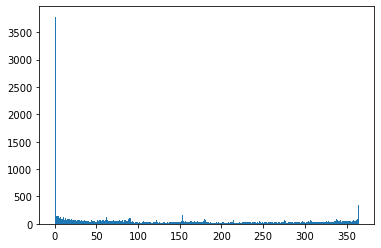

In [167]:
plt.hist(listings_explore.availability_365, bins=365)
plt.show()

Mode at 0 with small spike at 365, skews right.

In [168]:
disc_attribs.append('availability_365')

Clean.

Clean.

## **Features: first_review, last_review**

Feature first_review dropped in lieu of feature number_of_reviews because that covers all reviews, and host_since measures how long a host has been hosting.

Feature last_review dropped in lieu of feature number_of_reviews_ltm because that covers the amount of recent reviews for potential renters to see.

In [169]:
listings_explore.drop(columns=['first_review', 'last_review'], inplace=True)
dropped_cols.extend(['first_review', 'last_review'])

## **Feature: review_scores_rating**

In [170]:
preliminaries(listings_explore, 'review_scores_rating')

Dtype:  float64
Missing Values:  259
100.0    4430
98.0     1794
97.0     1652
96.0     1524
95.0     1406
93.0     1242
94.0     1092
99.0     1074
90.0      810
92.0      777
91.0      600
80.0      426
89.0      408
87.0      381
88.0      360
85.0      217
86.0      188
84.0      140
83.0      130
60.0      109
82.0       75
73.0       46
81.0       44
70.0       44
77.0       35
78.0       33
75.0       32
40.0       26
20.0       26
76.0       24
79.0       22
67.0       14
74.0       12
50.0       10
68.0        6
72.0        6
53.0        6
71.0        5
65.0        4
69.0        4
55.0        4
30.0        2
63.0        1
47.0        1
33.0        1
62.0        1
56.0        1
44.0        1
64.0        1
Name: review_scores_rating, dtype: int64


In [171]:
sum_stats(listings_explore.review_scores_rating.dropna())

nobs: 19247
median: 96.0
mode: [100.]
mean: 94.31511404374707
std: 7.138444164094625
minmax: (20.0, 100.0)
25% 92.0
50% 96.0
75% 99.0
skewness: -3.7195392855576648


In [172]:
tukey_outliers(listings_explore.review_scores_rating.dropna())

(81.5, 109.5)

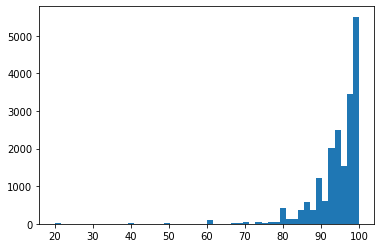

In [173]:
plt.hist(listings_explore.review_scores_rating.dropna(), bins=50)
plt.show()

Mode at 100, skews left.

In [174]:
num_attribs.append('review_scores_rating')

Ready to impute.

## **Feature: review_scores_accuracy**

In [175]:
preliminaries(listings_explore, 'review_scores_accuracy')

Dtype:  float64
Missing Values:  261
10.0    14405
9.0      3993
8.0       605
7.0       105
6.0        80
2.0        32
4.0        18
5.0         7
Name: review_scores_accuracy, dtype: int64


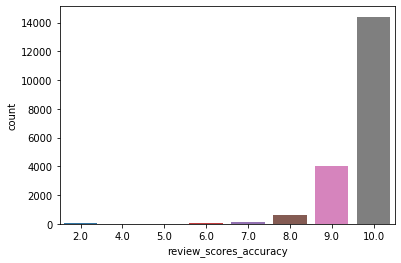

In [176]:
sns.countplot(listings_explore.review_scores_accuracy.dropna())
plt.show()

Mode at 10, some at 9, the rest small down to 2. Skews left.

In [177]:
disc_attribs.append('review_scores_accuracy')

Ready to impute.

## **Feature: review_scores_cleanliness**

In [178]:
preliminaries(listings_explore, 'review_scores_cleanliness')

Dtype:  float64
Missing Values:  261
10.0    10555
9.0      6337
8.0      1694
7.0       363
6.0       182
4.0        41
2.0        41
5.0        28
3.0         4
Name: review_scores_cleanliness, dtype: int64


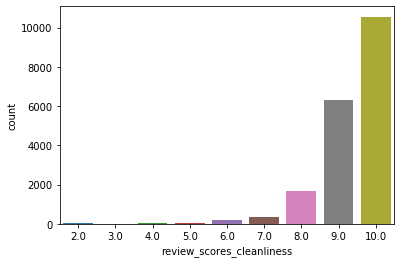

In [179]:
sns.countplot(listings_explore.review_scores_cleanliness.dropna())
plt.show()

Mode at 10, some at 9 and 8, skews left.

In [180]:
disc_attribs.append('review_scores_cleanliness')

Ready to impute.

## **Feature: review_scores_checkin**

In [181]:
preliminaries(listings_explore, 'review_scores_checkin')

Dtype:  float64
Missing Values:  263
10.0    16108
9.0      2609
8.0       360
6.0        69
7.0        60
2.0        20
4.0        10
5.0         7
Name: review_scores_checkin, dtype: int64


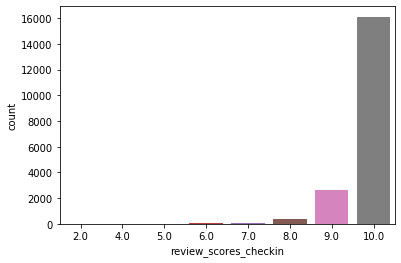

In [182]:
sns.countplot(listings_explore.review_scores_checkin.dropna())
plt.show()

Mode at 10, some at 9, skews left.

In [183]:
disc_attribs.append('review_scores_checkin')

Ready to impute.

## **Feature: review_scores_communication**

In [184]:
preliminaries(listings_explore, 'review_scores_communication')

Dtype:  float64
Missing Values:  261
10.0    16247
9.0      2476
8.0       344
7.0        72
6.0        62
2.0        21
4.0        13
5.0         8
3.0         2
Name: review_scores_communication, dtype: int64


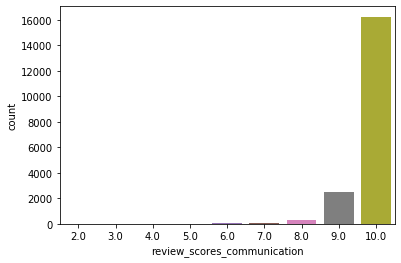

In [185]:
sns.countplot(listings_explore.review_scores_communication.dropna())
plt.show()

Mode at 10, some at 9, skews left.

In [186]:
disc_attribs.append('review_scores_communication')

Ready to impute.

## **Feature: review_scores_location**

In [187]:
preliminaries(listings_explore, 'review_scores_location')

Dtype:  float64
Missing Values:  263
10.0    12473
9.0      5879
8.0       723
7.0        73
6.0        61
2.0        17
4.0         9
5.0         6
3.0         2
Name: review_scores_location, dtype: int64


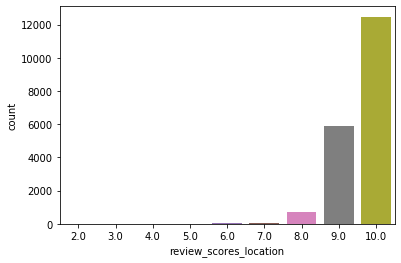

In [188]:
sns.countplot(listings_explore.review_scores_location.dropna())
plt.show()

Mode at 10, half at 9, some at 8, skews left.

In [189]:
disc_attribs.append('review_scores_location')

Ready to impute.

## **Feature: review_scores_value**

In [190]:
preliminaries(listings_explore, 'review_scores_value')

Dtype:  float64
Missing Values:  263
10.0    10829
9.0      7166
8.0       932
7.0       132
6.0       123
2.0        24
4.0        20
5.0        15
3.0         2
Name: review_scores_value, dtype: int64


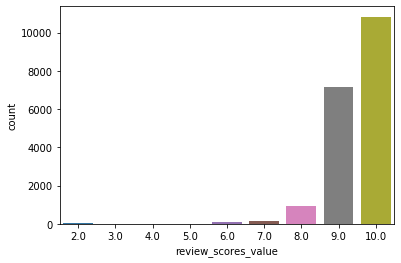

In [191]:
sns.countplot(listings_explore.review_scores_value.dropna())
plt.show()

Mode at 10, close to 9, a few at 8, skews left.

In [192]:
disc_attribs.append('review_scores_value')

Ready to impute.

**Features: calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms**

These features have been dropped as they do not seem to directly contribute much more information to the potential renter as to whether they will rent or not. I understand that there may be a correlation between having more or less listings and, for instance, reviews or price, but we have chosen to leave these features out for reasons of streamlining this process, and I feel the other features cover much of the needed to determine the price.

In [193]:
listings_explore.drop(columns=['calculated_host_listings_count',
                               'calculated_host_listings_count_entire_homes',
                               'calculated_host_listings_count_private_rooms',
                               'calculated_host_listings_count_shared_rooms'], inplace=True)
dropped_cols.extend(['calculated_host_listings_count',
                     'calculated_host_listings_count_entire_homes',
                     'calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_shared_rooms'])

## **Feature: reviews_per_month**

In [194]:
preliminaries(listings_explore, 'reviews_per_month')

Dtype:  float64
Missing Values:  0
1.00     513
2.00     254
0.19     179
0.20     167
3.00     158
0.39     132
0.18     129
0.23     126
0.29     119
0.22     119
0.38     114
0.12     111
0.14     111
0.40     111
0.24     109
0.16     108
0.17     106
0.27     105
0.09     104
0.58     104
0.31     102
0.10     102
0.35     101
0.59     101
0.26     100
0.34      99
0.52      97
0.32      96
0.44      94
0.11      94
0.37      93
0.45      92
0.48      88
0.33      88
0.21      88
0.28      87
0.13      87
4.00      87
0.36      86
0.41      85
0.57      85
0.63      84
0.60      84
0.42      83
0.68      79
0.51      79
0.53      79
0.15      78
0.30      77
0.46      77
0.47      77
0.75      76
0.55      76
0.25      73
0.50      73
0.43      72
0.56      71
0.71      70
0.70      70
0.76      69
0.94      69
0.49      69
0.88      69
0.77      69
0.78      68
0.87      68
0.65      67
0.93      65
0.81      64
0.85      63
0.80      63
0.64      62
0.67      62
0.89      61
0.9

In [195]:
sum_stats(listings_explore.reviews_per_month)

nobs: 19506
median: 1.37
mode: [1.]
mean: 1.9028078539936428
std: 1.7616027593254382
minmax: (0.02, 28.0)
25% 0.58
50% 1.37
75% 2.77
skewness: 1.969132469374286


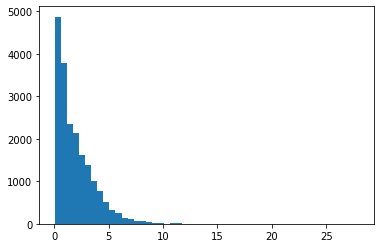

In [196]:
plt.hist(listings_explore.reviews_per_month, bins=50)
plt.show()

Mode at 0, many up to 4. Skews right up to 28.

In [197]:
num_attribs.append('reviews_per_month')

Ready to impute.

# Categorical Features

In [198]:
# Function to convert true/false values to binary
def convert_tf(df, column):
    '''
    Converts t/f values in a Series to 0/1.
    '''
    df[column] = df[column].map({'t': 1, 'f': 0}, na_action='ignore')
    return df[column]

## **Feature: host_is_superhost**

In [199]:
preliminaries(listings_explore, 'host_is_superhost')

Dtype:  object
Missing Values:  4
f    13983
t     5519
Name: host_is_superhost, dtype: int64


In [200]:
# Convert t/f to 1/0
listings_explore['host_is_superhost'] = convert_tf(listings_explore, 'host_is_superhost')

In [201]:
preliminaries(listings_explore, 'host_is_superhost')

Dtype:  float64
Missing Values:  4
0.0    13983
1.0     5519
Name: host_is_superhost, dtype: int64


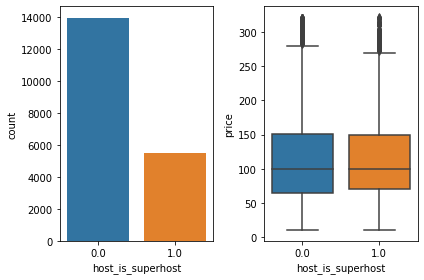

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(listings_explore.host_is_superhost, ax=ax1)
sns.catplot('host_is_superhost', 'price', data=listings_explore, kind='box', ax=ax2)
fig.tight_layout()
plt.close()
plt.show()

Nearly a quarter of hosts are superhosts.

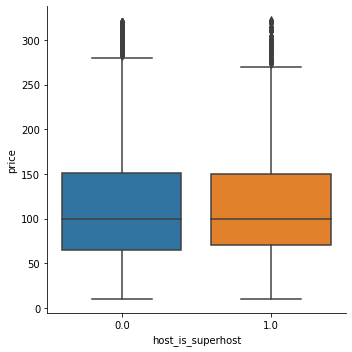

In [203]:
sns.catplot('host_is_superhost', 'price', data=listings_explore, kind='box')
plt.show()

In [204]:
cat_attribs.append('host_is_superhost')

Clean.

## **Feature: host_has_profile_pic**

In [205]:
preliminaries(listings_explore, 'host_has_profile_pic')

Dtype:  object
Missing Values:  4
t    19466
f       36
Name: host_has_profile_pic, dtype: int64


Virtually all listings have a profile picture, so we will remove this feature from the data.

In [206]:
listings_explore.drop(columns='host_has_profile_pic', inplace=True)
dropped_cols.append('host_has_profile_pic')

Clean.

## **Feature: host_identity_verified** (For analysis only)

This column is only for analysis purposes and will be removed from the model, as the potential guest cannot see whether a host is verified.

In [207]:
preliminaries(listings_explore, 'host_identity_verified')

Dtype:  object
Missing Values:  4
f    9841
t    9661
Name: host_identity_verified, dtype: int64


In [208]:
# Convert t/f to 1/0
listings_explore['host_identity_verified'] = convert_tf(listings_explore, 'host_identity_verified')

In [209]:
preliminaries(listings_explore, 'host_identity_verified')

Dtype:  float64
Missing Values:  4
0.0    9841
1.0    9661
Name: host_identity_verified, dtype: int64


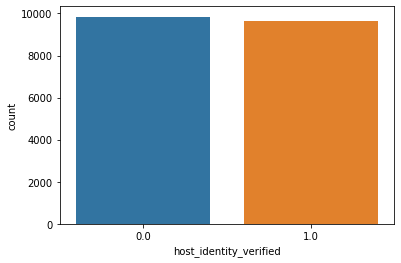

In [210]:
sns.countplot(listings_explore.host_identity_verified)
plt.show()

About half of hosts are verified.

In [211]:
#cat_attribs.append('host_identity_verified')
drop_later.append('host_identity_verified')

Clean.

## **Feature: neighbourhood_cleansed**

In [212]:
preliminaries(listings_explore, 'neighbourhood_cleansed')

Dtype:  object
Missing Values:  0
Bedford-Stuyvesant            1756
Williamsburg                  1529
Harlem                        1180
Bushwick                      1038
Hell's Kitchen                 751
East Village                   656
Crown Heights                  653
Upper West Side                566
Upper East Side                554
East Harlem                    512
Greenpoint                     384
Astoria                        368
Washington Heights             355
Midtown                        338
Lower East Side                336
Chelsea                        334
Flatbush                       281
East Flatbush                  270
Flushing                       260
Long Island City               242
West Village                   237
Prospect-Lefferts Gardens      229
Clinton Hill                   215
Financial District             207
Sunset Park                    186
Fort Greene                    177
Park Slope                     175
Ridgewood            

A list of value counts is the best way to view this data.

In [213]:
cat_attribs.append('neighbourhood_cleansed')

Clean.

## **Feature: neighbourhood_group_cleansed**

In [214]:
preliminaries(listings_explore, 'neighbourhood_group_cleansed')

Dtype:  object
Missing Values:  0
Brooklyn         8614
Manhattan        7341
Queens           2773
Bronx             560
Staten Island     218
Name: neighbourhood_group_cleansed, dtype: int64


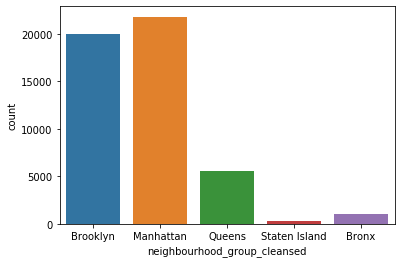

In [215]:
sns.countplot(listings.neighbourhood_group_cleansed)
plt.show()

Brooklyn and Manhattan have by far the most listings, followed by Queens at about 1/4 of their size, with Staten Island and  Bronx quite low.

In [216]:
cat_attribs.append('neighbourhood_group_cleansed')

Clean.

**Feature: zipcode**

In [217]:
preliminaries(listings_explore, 'zipcode')

Dtype:  object
Missing Values:  216
11211         673
11221         669
11206         471
11216         447
11233         402
10002         393
11238         355
10009         324
10019         322
11222         310
11215         292
11237         288
10027         285
10031         279
10003         270
10029         258
11226         258
10036         249
11249         225
11205         215
11221.0       212
11207         211
10025         209
11213         199
10012         198
11225         190
10011         187
10014         183
11211.0       178
11217         176
10026         173
10032         167
10016         167
11206.0       160
11385         150
11216.0       143
11101         138
10001         135
11103         134
10030         127
11231         126
11201         119
10023         118
10005         118
11106         116
11237.0       115
10035         114
11218         114
11377         110
10128         107
10013         105
11355         105
11102         104
11233.0   

In [218]:
#listings_explore['zipcode'] = listings_train['zipcode']
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('-', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('NY ', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str.replace('\n', '', regex=False)
#listings_explore['zipcode'] = listings_explore['zipcode'].str[:5]

Because we have longitude and latitude, which is a more accurate measure of location, along with neighbourhood_cleansed, we will drop the zipcode feature.

In [219]:
listings_explore.drop(columns='zipcode', inplace=True)
dropped_cols.append('zipcode')

## **Feature: property_type**

In [220]:
preliminaries(listings_explore, 'property_type')

Dtype:  object
Missing Values:  0
Apartment                 14823
House                      2023
Townhouse                   849
Loft                        625
Condominium                 570
Guest suite                 209
Serviced apartment           73
Boutique hotel               58
Hotel                        50
Hostel                       49
Bed and breakfast            35
Guesthouse                   31
Other                        27
Bungalow                     17
Villa                        14
Tiny house                   12
Resort                        8
Cottage                       6
Camper/RV                     5
Boat                          4
Aparthotel                    4
Tent                          4
Earth house                   3
Castle                        2
Dome house                    2
Nature lodge                  1
Houseboat                     1
Casa particular (Cuba)        1
Name: property_type, dtype: int64


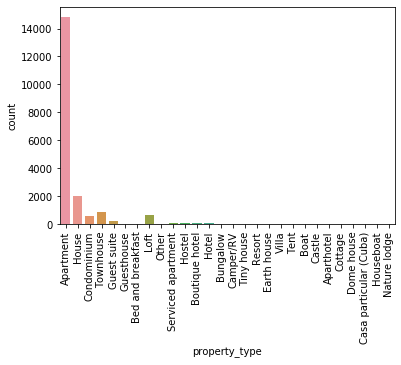

In [221]:
fig = sns.countplot(listings_explore.property_type)
fig.set_xticklabels(labels=pd.unique(listings_explore.property_type), rotation=90)
plt.show()

Because we are isolating more standard Airbnbs, we will only keep the following values from the data:

In [222]:
# Filter specific property types
listings_explore = listings_explore[
                       (listings_explore.property_type == 'Apartment') |
                       (listings_explore.property_type == 'House') |
                       (listings_explore.property_type == 'Condominium') |
                       (listings_explore.property_type == 'Townhouse') |
                       (listings_explore.property_type == 'Guest suite') |
                       (listings_explore.property_type == 'Guesthouse') |
                       (listings_explore.property_type == 'Loft') |
                       (listings_explore.property_type == 'Serviced apartment') |
                       (listings_explore.property_type == 'Tiny house') |
                       (listings_explore.property_type == 'Earth house') |
                       (listings_explore.property_type == 'Villa') |
                       (listings_explore.property_type == 'Castle') |
                       (listings_explore.property_type == 'Cottage') |
                       (listings_explore.property_type == 'Dome house')
                    ]

In [223]:
preliminaries(listings_explore, 'property_type', values=True)

Dtype:  object
Missing Values:  0
Apartment             14823
House                  2023
Townhouse               849
Loft                    625
Condominium             570
Guest suite             209
Serviced apartment       73
Guesthouse               31
Villa                    14
Tiny house               12
Cottage                   6
Earth house               3
Castle                    2
Dome house                2
Name: property_type, dtype: int64


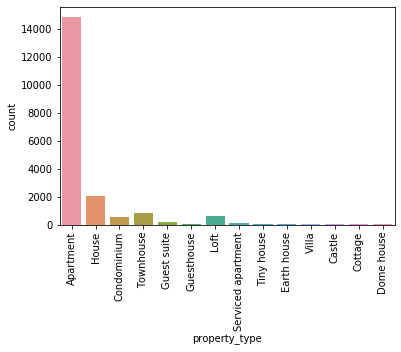

In [224]:
fig = sns.countplot(listings_explore.property_type)
fig.set_xticklabels(labels=pd.unique(listings_explore.property_type), rotation=90)
plt.show()

Nearly all apartments, some houses, condominiums, townhomes, lofts, and only a few of the others.

In [225]:
cat_attribs.append('property_type')

Clean.

## **Feature: room_type**

In [226]:
preliminaries(listings_explore, 'room_type')

Dtype:  object
Missing Values:  0
Private room       9419
Entire home/apt    9361
Shared room         462
Name: room_type, dtype: int64


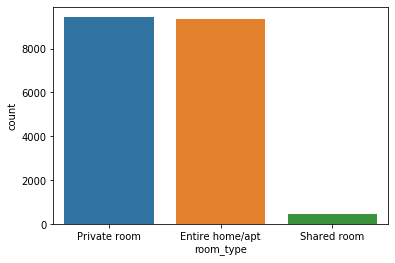

In [227]:
sns.countplot(listings_explore.room_type)
plt.show()

About 50/50 private room / entire home with only a few shared room.

In [228]:
cat_attribs.append('room_type')

Clean.

**Feature: is_location_exact**

In [229]:
preliminaries(listings_explore, 'is_location_exact')

Dtype:  object
Missing Values:  0
t    15435
f     3807
Name: is_location_exact, dtype: int64


We're not exactly sure what this measures, so we will delete the feature.

In [230]:
listings_explore.drop(columns='is_location_exact', inplace=True)
dropped_cols.append('is_location_exact')

## **Feature: bed_type**

In [231]:
preliminaries(listings_explore, 'bed_type')

Dtype:  object
Missing Values:  0
Real Bed         18933
Futon              118
Pull-out Sofa      113
Airbed              51
Couch               27
Name: bed_type, dtype: int64


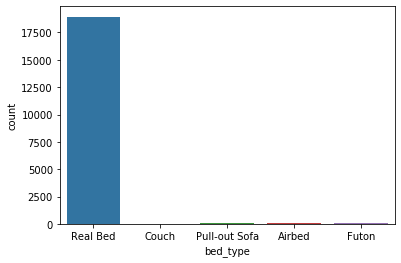

In [232]:
sns.countplot(listings_explore.bed_type)
plt.show()

Virtually all real bed, with only a few of the others.

In [233]:
cat_attribs.append('bed_type')

Clean.

## **Feature: amenities**
The amenities feature originally consists of strings of each amenity of the listing. We split this into binary columns for each amenity in order to accurately measure each amenity each listing has.

In [234]:
preliminaries(listings_explore, 'amenities')

Dtype:  object
Missing Values:  0
{TV,"Cable TV",Wifi,"Air conditioning",Kitchen,Elevator,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,"Private living room","Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"Long term stays allowed"}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [235]:
# Remove empty values ({})
listings_explore = listings_explore[listings_explore.amenities != '{}']

In [236]:
# Remove brackets and quotes, split by ','
listings_explore['amenities'] = listings_explore.amenities.astype('str').str.replace('{', '', regex=False).copy()
listings_explore['amenities'] = listings_explore.amenities.str.replace('}', '', regex=False).copy()
listings_explore['amenities'] = listings_explore.amenities.str.replace('"', '', regex=False).copy()
listings_explore['amenities'] = listings_explore.amenities.str.split(',').copy()

In [237]:
# An example listing's list of amenities
listings_explore['amenities'].iloc[1]

['TV',
 'Internet',
 'Wifi',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Washer',
 'Dryer',
 'Smoke detector',
 'Carbon monoxide detector',
 'Essentials',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'Hot water',
 'Other']

In [238]:
# Create columns for each amenity using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
amenities_df = pd.DataFrame(mlb.fit_transform(listings_explore.amenities))
classes = mlb.classes_ # amenity names
amenities_df.columns = classes # add amenity names as columns

In [239]:
amenities_df.head(2)

toilet  24-hour check-in  Accessible-height bed  Accessible-height toilet  Air conditioning  Air purifier  BBQ grill  Baby bath  Baby monitor  Babysitter recommendations  Bathtub  Bathtub with bath chair  Beach essentials  Beachfront  Bed linens  Breakfast  Building staff  Buzzer/wireless intercom  Cable TV  Carbon monoxide detector  Cat(s)  Ceiling hoist  Changing table  Children’s books and toys  Children’s dinnerware  Cleaning before checkout  Coffee maker  Cooking basics  Crib  Disabled parking spot  Dishes and silverware  Dishwasher  Dog(s)  Doorman  Dryer  EV charger  Electric profiling bed  Elevator  Essentials  Ethernet connection  Extra pillows and blankets  Extra space around bed  Extra space around shower and toilet  Family/kid friendly  Fire extinguisher  Fireplace guards  Firm mattress  First aid kit  Fixed grab bars for shower  Fixed grab bars for toilet  Flat path to guest entrance  Free parking on premises  Free street parking  Full kitchen  Game console  \
0        1                 0                      1                         0                 1             0          0          0             0                           0        0                        0                 1           0           1          0               0                         0         0                         1       0              0               0                          1                      0                         0             0               1     0                      0                      1           1       0        0      1           0                       0         0           1                    0                           1                       1                                     0                    0                  0                 0              0              1                           0                           0                            1                         0                    1             0             1   
1        0                 0                      0                         0                 1             0          0          0             0                           0        0                        0                 0           0           0          0               0                         0         0                         1       0              0               0                          0                      0                         0             0               0     0                      0                      0           0       0        0      1           0                       0         0           1                    0                           0                       0                                     0                    1                  0                 0              0              0                           0                           0                            0                         0                    0             0             0   

   Garden or backyard  Ground floor access  Gym  Hair dryer  Hangers  Heating  High chair  Host greets you  Hot tub  Hot water  Hot water kettle  Indoor fireplace  Internet  Iron  Keypad  Kitchen  Kitchenette  Lake access  Laptop friendly workspace  Lock on bedroom door  Lockbox  Long term stays allowed  Luggage dropoff allowed  Microwave  Mobile hoist  No stairs or steps to enter  Other  Other pet(s)  Outlet covers  Oven  Pack ’n Play/travel crib  Paid parking off premises  Paid parking on premises  Patio or balcony  Pets allowed  Pets live on this property  Pocket wifi  Pool  Pool with pool hoist  Private bathroom  Private entrance  Private living room  Refrigerator  Roll-in shower  Room-darkening shades  Safety card  Self check-in  Shampoo  Shower chair  Single level home  Ski-in/Ski-out  Smart lock  Smoke detector  Smoking allowed  Stair gates  Stove  Suitable for events  TV  Table corner guards  Washer  Washer / Dryer  Waterfront  Well-lit path to entrance  \
0                   1                    0    0 

In [240]:
# Save indices
indices = np.array(listings_explore.index)

In [241]:
# Merge new amenities columns with original dataframe
listings_explore = pd.concat([listings_explore.reset_index(drop=True), amenities_df.reset_index(drop=True)], axis=1)

In [242]:
# Reapply original indices
listings_explore = listings_explore.set_index(indices)

In [243]:
# Drop 'amenities' column
listings_explore.drop(columns='amenities', inplace=True)

In [244]:
listings_explore.head(2)

host_since  host_is_superhost  host_listings_count  host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude property_type        room_type  accommodates  bathrooms  bedrooms  beds  bed_type  price  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights calendar_updated has_availability  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value instant_bookable          cancellation_policy require_guest_profile_picture require_guest_phone_verification  reviews_per_month   toilet  24-hour check-in  Accessible-height bed  Accessible-height toilet  Air conditioning  Air purifier  BBQ grill  Baby bath  Baby monitor  Babysitter recommendations  Bathtub  Bathtub with bath chair  Beach essentials  \
37753         2.0                0.0                  1.0                     0.0               Bushwick                     Brooklyn  40.70229  -73.92223     Apartment     Private room             2        1.0       1.0   1.0  Real Bed   85.0          25.0                1          20.0               1              60     2 months ago                t                6               20               50               325                 38                     38                  95.0                    10.0                        9.0                   10.0                         10.0                    10.0                 10.0                f  strict_14_with_grace_period                             f                                f               5.09        1                 0                      1                         0                 1             0          0          0             0                           0        0                        0                 1   
3719          8.0                0.0                  1.0                     1.0                Chelsea                    Manhattan  40.74502  -74.00429     Apartment  Entire home/apt             4        1.0       1.0   4.0  Real Bed  285.0          90.0                2          50.0               2              10       4 days ago                t                0               19               23               168                 45                     10                  96.0                    10.0                       10.0                   10.0                         10.0                    10.0                 10.0                f                     moderate                             f                                f               0.72        0                 0                      0                         0                 1             0          0          0             0                           0        0                        0                 0   

       Beachfront  Bed linens  Breakfast  Building staff  Buzzer/wireless intercom  Cable TV  Carbon monoxide detector  Cat(s)  Ceiling hoist  Changing table  Children’s books and toys  Children’s dinnerware  Cleaning before checkout  Coffee maker  Cooking basics  Crib  Disabled parking spot  Dishes and silverware  Dishwasher  Dog(s)  Doorman  Dryer  EV charger  Electric profiling bed  Elevator  Essentials  Ethernet connection  Extra pillows and blankets  Extra space around bed  Extra space around shower and toilet  Family/kid friendly  Fire extinguisher  Fireplace guards  Firm mattress  First aid kit  Fixed grab bars for shower  Fixed grab bars for toilet  Flat path to guest entrance  Free parking on premises  Free street parking  Full kitchen  Game console  Garden or backyard  Ground floor access  Gym  Hair dryer  Hangers  Heating  High chair  Host greets you  Hot tub  Hot water  Hot water kettle  Indoor fireplace  Internet  Iron  Keypad  Kitchen  Kitchenette  Lake access  \
37753           0           1          0 

In [245]:
# View preliminaries of each amenity
for col in amenities_df.columns:
    print('\n\n\n' + col + '\n')
    preliminaries(listings_explore, col, values=True)




 toilet

Dtype:  int64
Missing Values:  0
0    18756
1      476
Name:  toilet, dtype: int64



24-hour check-in

Dtype:  int64
Missing Values:  0
0    17405
1     1827
Name: 24-hour check-in, dtype: int64



Accessible-height bed

Dtype:  int64
Missing Values:  0
0    18151
1     1081
Name: Accessible-height bed, dtype: int64



Accessible-height toilet

Dtype:  int64
Missing Values:  0
0    18350
1      882
Name: Accessible-height toilet, dtype: int64



Air conditioning

Dtype:  int64
Missing Values:  0
1    16672
0     2560
Name: Air conditioning, dtype: int64



Air purifier

Dtype:  int64
Missing Values:  0
0    19230
1        2
Name: Air purifier, dtype: int64



BBQ grill

Dtype:  int64
Missing Values:  0
0    18428
1      804
Name: BBQ grill, dtype: int64



Baby bath

Dtype:  int64
Missing Values:  0
0    19087
1      145
Name: Baby bath, dtype: int64



Baby monitor

Dtype:  int64
Missing Values:  0
0    19167
1       65
Name: Baby monitor, dtype: int64



Babysitter recom

Missing Values:  0
0    19078
1      154
Name: Pool, dtype: int64



Pool with pool hoist

Dtype:  int64
Missing Values:  0
0    19229
1        3
Name: Pool with pool hoist, dtype: int64



Private bathroom

Dtype:  int64
Missing Values:  0
0    19226
1        6
Name: Private bathroom, dtype: int64



Private entrance

Dtype:  int64
Missing Values:  0
0    14807
1     4425
Name: Private entrance, dtype: int64



Private living room

Dtype:  int64
Missing Values:  0
0    16186
1     3046
Name: Private living room, dtype: int64



Refrigerator

Dtype:  int64
Missing Values:  0
0    11029
1     8203
Name: Refrigerator, dtype: int64



Roll-in shower

Dtype:  int64
Missing Values:  0
0    19102
1      130
Name: Roll-in shower, dtype: int64



Room-darkening shades

Dtype:  int64
Missing Values:  0
0    18241
1      991
Name: Room-darkening shades, dtype: int64



Safety card

Dtype:  int64
Missing Values:  0
0    17227
1     2005
Name: Safety card, dtype: int64



Self check-in

Dtype:  in

In [246]:
# List of columns to drop from new amenities columns
dropped_amenities = []
dropped_amenities.extend([" toilet",
                         "Accessible-height bed",
                         "Accessible-height toilet",
                         "Air purifier",
                         "BBQ grill",
                         "Baby bath",
                         "Bathtub",
                         "Baby monitor",
                         "Babysitter recommendations",
                         "Bathtub with bath chair",
                         "Beach essentials",
                         "Beachfront",
                         "Bed linens",
                         "Breakfast",
                         "Building staff",
                         "Buzzer/wireless intercom",
                         "Cable TV",
                         "Carbon monoxide detector",
                         'Cat(s)',
                         "Ceiling hoist",
                         "Changing table",
                         "Children’s books and toys",
                         "Children’s dinnerware",
                         "Cleaning before checkout",
                         "Disabled parking spot",
                         'Dog(s)',
                         "EV charger",
                         "Electric profiling bed",
                         "Ethernet connection",
                         'Extra pillows and blankets',
                         "Extra space around bed",
                         "Extra space around shower and toilet",
                         "Fire extinguisher",
                         "Fireplace guards",
                         "Firm mattress",
                         "First aid kit",
                         "Fixed grab bars for shower",
                         "Fixed grab bars for toilet",
                         "Flat path to guest entrance",
                         "Full kitchen",
                        "Game console",
                        "Ground floor access",
                        "High chair",
                        "Hot water kettle",
                        'Indoor fireplace',
                        "Internet",
                        "Keypad",
                        "Kitchenette",
                        'Lake access',
                        'Lock on bedroom door',
                        'Lockbox',
                           'Long term stays allowed',
                           'Luggage dropoff allowed',
                        "Mobile hoist",
                        "No stairs or steps to enter",
                        "Other",
                           'Other pet(s)',
                        "Outlet covers",
                        'Oven',
                        "Pack ’n Play/travel crib",
                        "Pets live on this property",
                        "Pocket wifi",
                        "Pool with pool hoist",
                           'Private bathroom',
                        "Private living room",
                        "Roll-in shower",
                        "Room-darkening shades",
                        "Safety card",
                        "Shower chair",
                        "Single level home",
                        "Ski-in/Ski-out",
                        "Smart lock",
                        "Smoke detector",
                        "Stair gates",
                        "Suitable for events",
                        "Table corner guards",
                        "Washer / Dryer",
                        "Well-lit path to entrance",
                        "Wheelchair accessible",
                        "Wide clearance to shower",
                        "Wide doorway to guest bathroom",
                        "Wide entrance",
                        "Wide entrance for guests",
                        "Wide entryway",
                        "Wide hallways",
                        "Window guards",
                        "translation missing: en.hosting_amenity_49",
                        "translation missing: en.hosting_amenity_50"])

In [247]:
# Amenities always displayed on Airbnb listing (just for knowledge's sake)
amenities_shown = ['wifi',
                  'air conditioning',
                  'heating',
                  'essentials',
                  'TV',
                  'hot water',
                  'kitchen',
                  'host greets you',
                  'self check-in',
                  'Washer',
                  'Dryer',
                  'Private entrance',
                  'Garden or backyard',
                  'Shampoo']

In [248]:
# Drop unused amenities
listings_explore.drop(columns=dropped_amenities, inplace=True)

In [249]:
# Create list of amenities columns
all_cols = list(listings_explore.columns)
amen_index = all_cols.index('24-hour check-in') # beginning of amenities columns
amen_attribs = all_cols[amen_index:]

Dtype:  int64
Missing Values:  0
0    17405
1     1827
Name: 24-hour check-in, dtype: int64


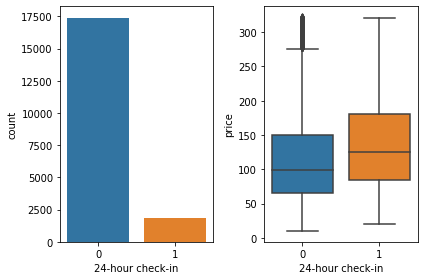

Dtype:  int64
Missing Values:  0
1    16672
0     2560
Name: Air conditioning, dtype: int64


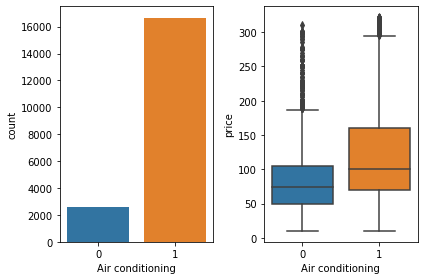

Dtype:  int64
Missing Values:  0
0    13080
1     6152
Name: Coffee maker, dtype: int64


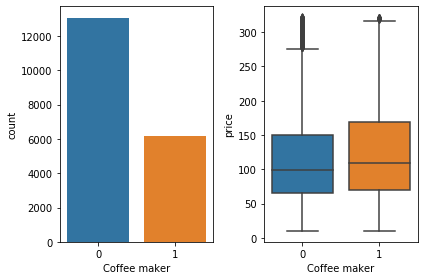

Dtype:  int64
Missing Values:  0
0    12212
1     7020
Name: Cooking basics, dtype: int64


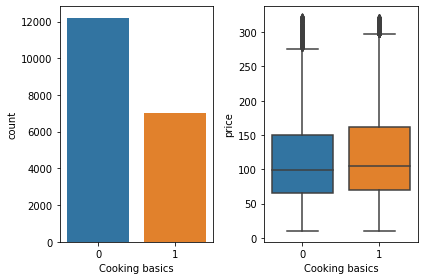

Dtype:  int64
Missing Values:  0
0    18920
1      312
Name: Crib, dtype: int64


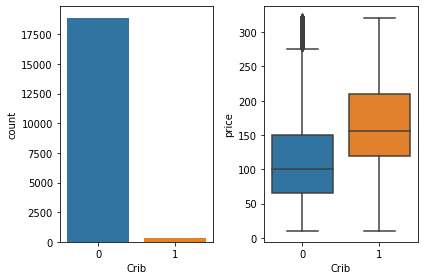

Dtype:  int64
Missing Values:  0
0    11766
1     7466
Name: Dishes and silverware, dtype: int64


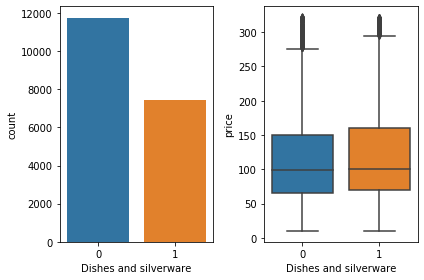

Dtype:  int64
Missing Values:  0
0    16395
1     2837
Name: Dishwasher, dtype: int64


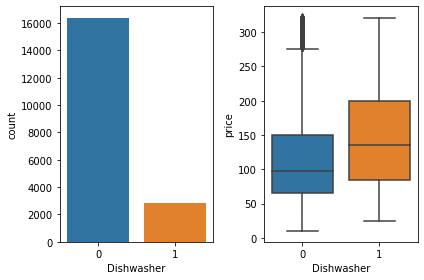

Dtype:  int64
Missing Values:  0
0    18844
1      388
Name: Doorman, dtype: int64


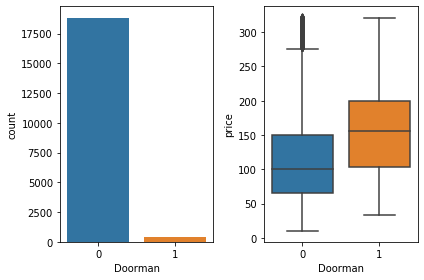

Dtype:  int64
Missing Values:  0
0    12390
1     6842
Name: Dryer, dtype: int64


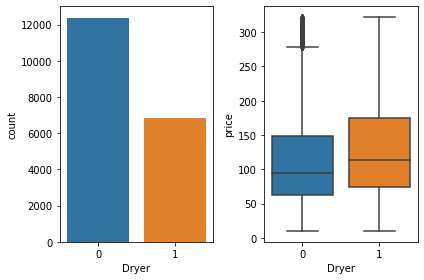

Dtype:  int64
Missing Values:  0
0    15091
1     4141
Name: Elevator, dtype: int64


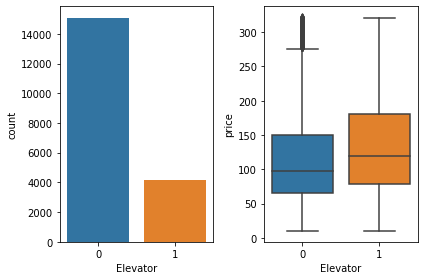

Dtype:  int64
Missing Values:  0
1    18708
0      524
Name: Essentials, dtype: int64


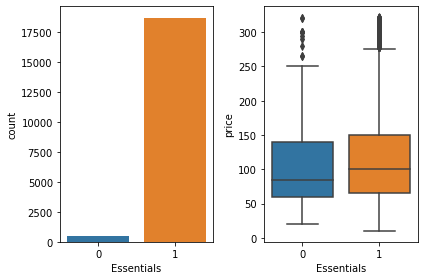

Dtype:  int64
Missing Values:  0
0    13960
1     5272
Name: Family/kid friendly, dtype: int64


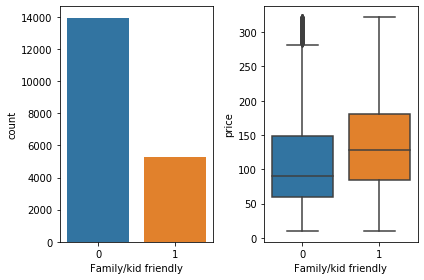

Dtype:  int64
Missing Values:  0
0    18007
1     1225
Name: Free parking on premises, dtype: int64


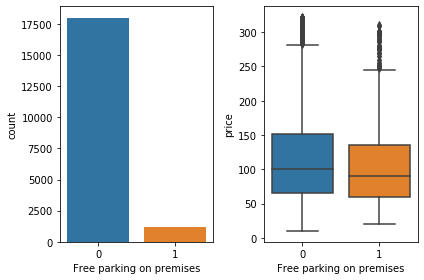

Dtype:  int64
Missing Values:  0
0    10295
1     8937
Name: Free street parking, dtype: int64


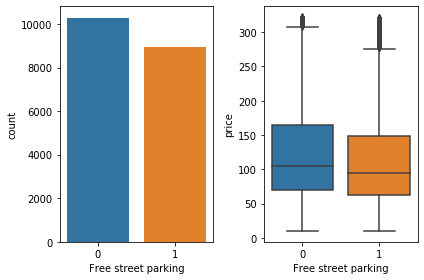

Dtype:  int64
Missing Values:  0
0    17699
1     1533
Name: Garden or backyard, dtype: int64


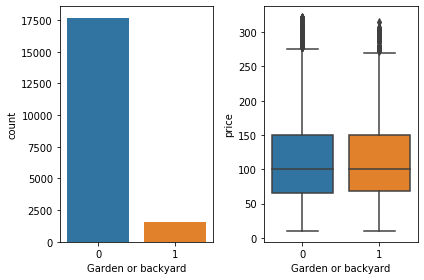

Dtype:  int64
Missing Values:  0
0    18109
1     1123
Name: Gym, dtype: int64


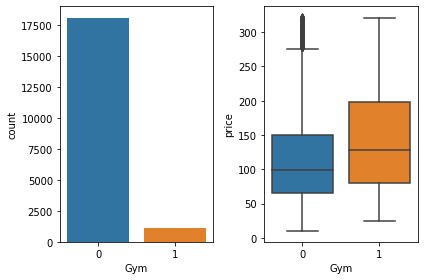

Dtype:  int64
Missing Values:  0
1    14725
0     4507
Name: Hair dryer, dtype: int64


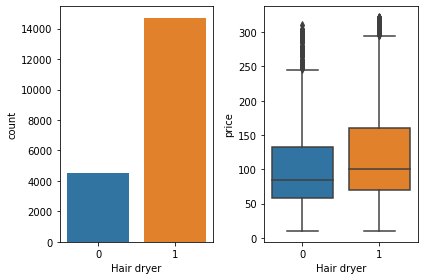

Dtype:  int64
Missing Values:  0
1    15907
0     3325
Name: Hangers, dtype: int64


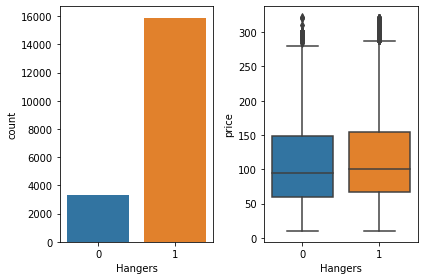

Dtype:  int64
Missing Values:  0
1    18473
0      759
Name: Heating, dtype: int64


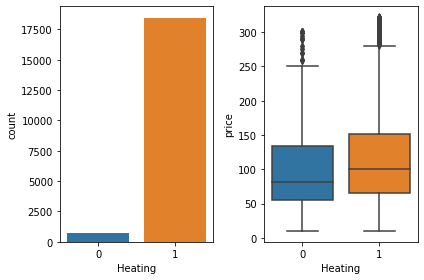

Dtype:  int64
Missing Values:  0
0    14608
1     4624
Name: Host greets you, dtype: int64


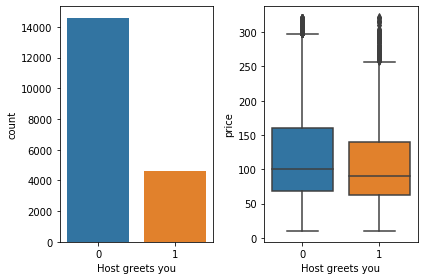

Dtype:  int64
Missing Values:  0
0    18689
1      543
Name: Hot tub, dtype: int64


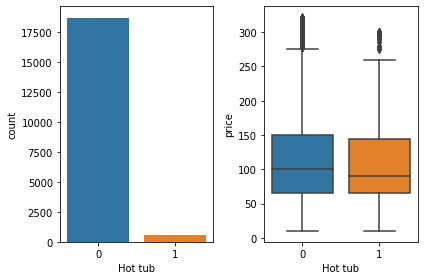

Dtype:  int64
Missing Values:  0
1    12976
0     6256
Name: Hot water, dtype: int64


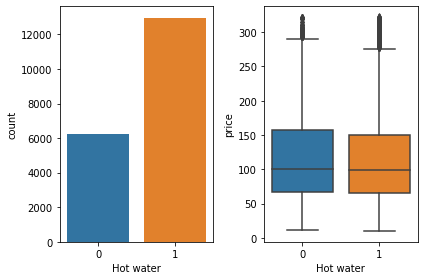

Dtype:  int64
Missing Values:  0
1    13624
0     5608
Name: Iron, dtype: int64


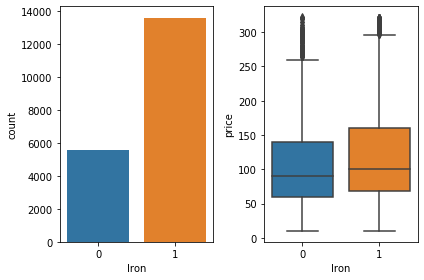

Dtype:  int64
Missing Values:  0
1    17440
0     1792
Name: Kitchen, dtype: int64


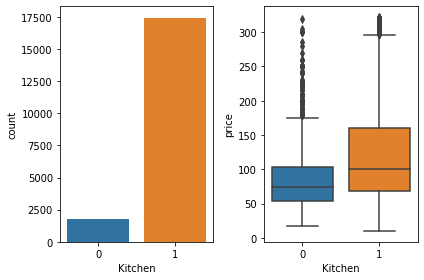

Dtype:  int64
Missing Values:  0
1    13383
0     5849
Name: Laptop friendly workspace, dtype: int64


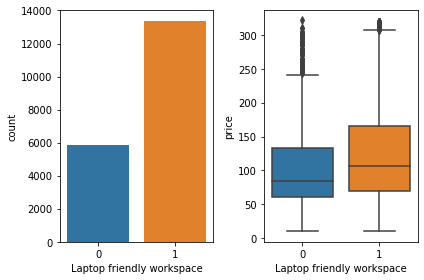

Dtype:  int64
Missing Values:  0
0    12376
1     6856
Name: Microwave, dtype: int64


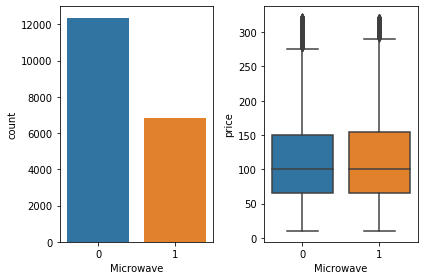

Dtype:  int64
Missing Values:  0
0    16678
1     2554
Name: Paid parking off premises, dtype: int64


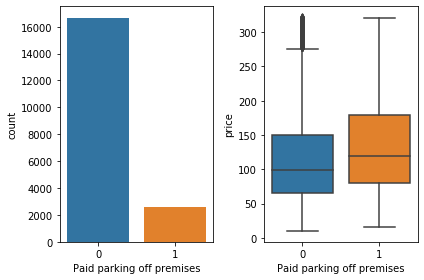

Dtype:  int64
Missing Values:  0
0    18599
1      633
Name: Paid parking on premises, dtype: int64


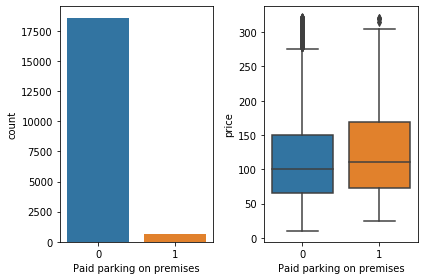

Dtype:  int64
Missing Values:  0
0    17698
1     1534
Name: Patio or balcony, dtype: int64


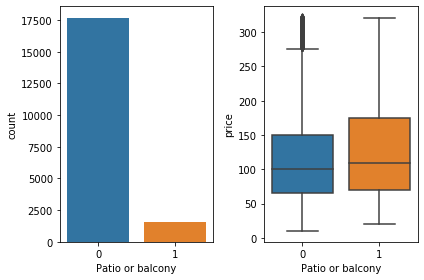

Dtype:  int64
Missing Values:  0
0    17194
1     2038
Name: Pets allowed, dtype: int64


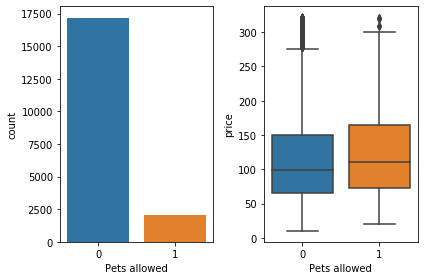

Dtype:  int64
Missing Values:  0
0    19078
1      154
Name: Pool, dtype: int64


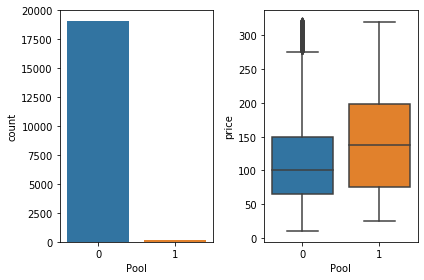

Dtype:  int64
Missing Values:  0
0    14807
1     4425
Name: Private entrance, dtype: int64


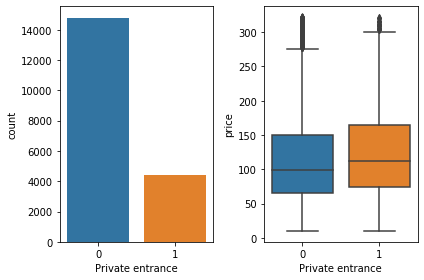

Dtype:  int64
Missing Values:  0
0    11029
1     8203
Name: Refrigerator, dtype: int64


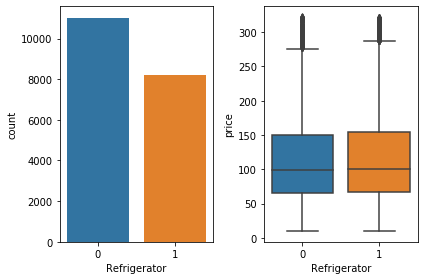

Dtype:  int64
Missing Values:  0
0    12886
1     6346
Name: Self check-in, dtype: int64


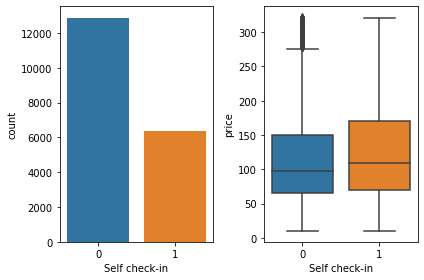

Dtype:  int64
Missing Values:  0
1    14740
0     4492
Name: Shampoo, dtype: int64


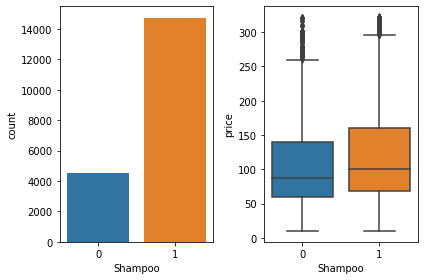

Dtype:  int64
Missing Values:  0
0    18351
1      881
Name: Smoking allowed, dtype: int64


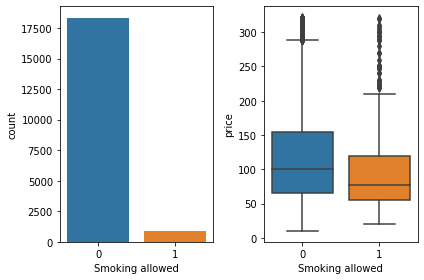

Dtype:  int64
Missing Values:  0
0    12069
1     7163
Name: Stove, dtype: int64


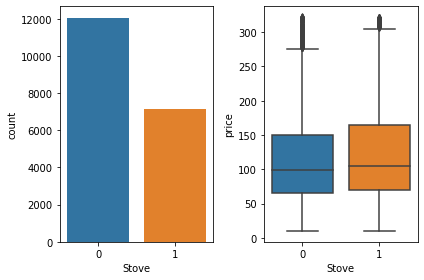

Dtype:  int64
Missing Values:  0
1    12894
0     6338
Name: TV, dtype: int64


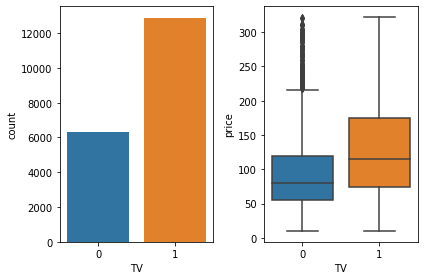

Dtype:  int64
Missing Values:  0
0    12282
1     6950
Name: Washer, dtype: int64


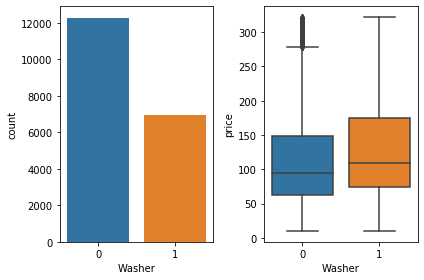

Dtype:  int64
Missing Values:  0
0    19083
1      149
Name: Waterfront, dtype: int64


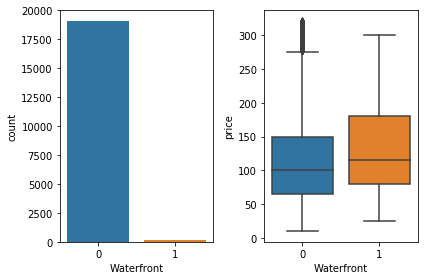

Dtype:  int64
Missing Values:  0
1    18971
0      261
Name: Wifi, dtype: int64


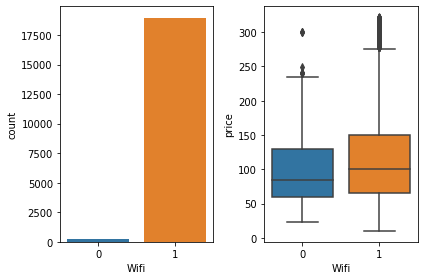

In [250]:
# Plot amenities columns
for col in amen_attribs:
    preliminaries(listings_explore, col)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    sns.countplot(listings_explore[col], ax=ax1)
    sns.catplot(col, 'price', data=listings_explore, kind='box', ax=ax2)
    fig.tight_layout()
    plt.close()
    plt.show()

Clean. Remember that you reset indices and dropped amenities column after transformations (in var dropped_amenities). Amenity attribs are in var amen_attribs.

**Feature: calendar_updated**

In [251]:
preliminaries(listings_explore, 'calendar_updated')

Dtype:  object
Missing Values:  0
today            2575
2 weeks ago      2108
a week ago       1491
3 weeks ago      1332
2 months ago     1317
4 weeks ago      1004
3 months ago      885
yesterday         873
4 days ago        840
3 days ago        807
5 weeks ago       754
5 days ago        693
4 months ago      570
6 weeks ago       569
5 months ago      525
6 months ago      444
6 days ago        333
2 days ago        321
7 weeks ago       310
7 months ago      277
10 months ago     209
1 week ago        201
8 months ago      200
9 months ago      181
11 months ago     167
12 months ago     134
13 months ago      38
14 months ago      22
15 months ago       6
17 months ago       5
16 months ago       5
24 months ago       4
18 months ago       4
21 months ago       3
22 months ago       3
36 months ago       2
25 months ago       2
30 months ago       2
32 months ago       2
35 months ago       2
20 months ago       2
23 months ago       1
27 months ago       1
49 months ago       

This feature doesn't seem to directly affect the price of a listing. A calendar can be updated or not, but the price is still the listed price. We will drop this feature.

However, this could be useful for analysis on prices for listings that update their prices frequently vs. listings that haven't updated in a while.

In [252]:
listings_explore.drop(columns='calendar_updated', inplace=True)
dropped_cols.append('calendar_updated')

**Feature: has_availability**

In [253]:
preliminaries(listings_explore, 'has_availability')

Dtype:  object
Missing Values:  0
t    19232
Name: has_availability, dtype: int64


This feature is dropped because all values are the same.

In [254]:
listings_explore.drop(columns='has_availability', inplace=True)
dropped_cols.append('has_availability')

## **Feature: instant_bookable**

In [255]:
preliminaries(listings_explore, 'instant_bookable')

Dtype:  object
Missing Values:  0
f    10763
t     8469
Name: instant_bookable, dtype: int64


In [256]:
# Convert t/f to 1/0
listings_explore['instant_bookable'] = convert_tf(listings_explore, 'instant_bookable')

In [257]:
preliminaries(listings_explore, 'instant_bookable')

Dtype:  int64
Missing Values:  0
0    10763
1     8469
Name: instant_bookable, dtype: int64


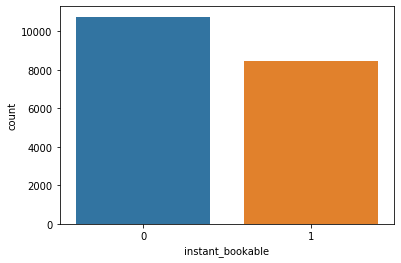

In [258]:
sns.countplot(listings_explore.instant_bookable)
plt.show()

instant_bookable and non-instant are similar, but not instant bookable has about 2000 more instances.

In [259]:
cat_attribs.append('instant_bookable')

Clean.

## **Feature: cancellation_policy**

In [260]:
preliminaries(listings_explore, 'cancellation_policy')

Dtype:  object
Missing Values:  0
strict_14_with_grace_period    9760
moderate                       5404
flexible                       4044
super_strict_30                  16
super_strict_60                   6
strict                            2
Name: cancellation_policy, dtype: int64


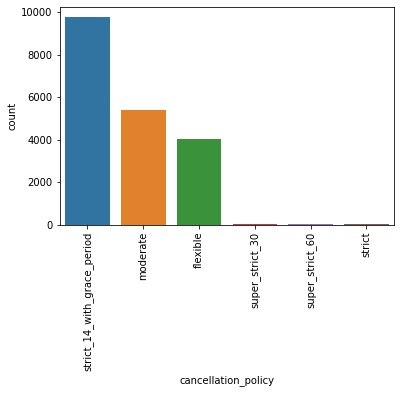

In [261]:
fig = sns.countplot(listings_explore.cancellation_policy)
fig.set_xticklabels(labels=listings_explore.cancellation_policy.unique(), rotation=90)
plt.show()

Strict with 14 grace period has the most, moderate and flexible have about half that, and the other 3 have almost none.

In [262]:
cat_attribs.append('cancellation_policy')

Clean.

**Feature: require_guest_profile_picture**

In [263]:
preliminaries(listings_explore, 'require_guest_profile_picture')

Dtype:  object
Missing Values:  0
f    18697
t      535
Name: require_guest_profile_picture, dtype: int64


In [264]:
# Convert t/f to 1/0
listings_explore['require_guest_profile_picture'] = convert_tf(listings_explore, 'require_guest_profile_picture')

In [265]:
preliminaries(listings_explore, 'require_guest_profile_picture')

Dtype:  int64
Missing Values:  0
0    18697
1      535
Name: require_guest_profile_picture, dtype: int64


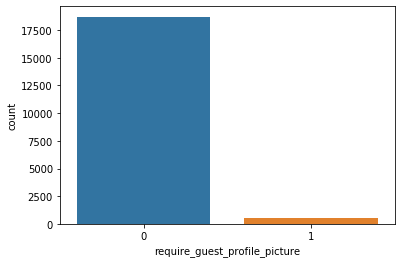

In [266]:
sns.countplot(listings_explore.require_guest_profile_picture)
plt.show()

Virtually no listings require guest profile picture.

This feature is quite imbalanced and intuitively does not factor into price very much for a potential guest (as adding a profile picture is rather quick and easy with smartphones today), so we will remove this feature.

In [267]:
listings_explore.drop(columns='require_guest_profile_picture', inplace=True)
dropped_cols.append('require_guest_profile_picture')

Clean.

## **Feature: require_guest_phone_verification**

In [268]:
preliminaries(listings_explore, 'require_guest_phone_verification')

Dtype:  object
Missing Values:  0
f    18614
t      618
Name: require_guest_phone_verification, dtype: int64


In [269]:
# Convert t/f to 1/0
listings_explore['require_guest_phone_verification'] = convert_tf(listings_explore, 'require_guest_phone_verification')

In [270]:
preliminaries(listings_explore, 'require_guest_phone_verification')

Dtype:  int64
Missing Values:  0
0    18614
1      618
Name: require_guest_phone_verification, dtype: int64


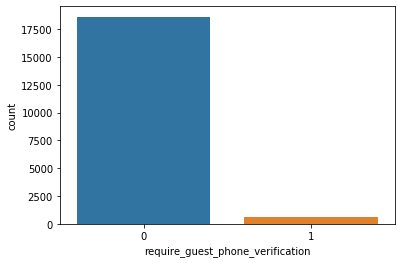

In [271]:
sns.countplot(listings_explore.require_guest_phone_verification)
plt.show()

This feature is quite imbalanced and intuitively does not factor into price very much for a potential guest (as phone verification is rather easy with smartphones today), so we will remove this feature.

In [272]:
listings_explore.drop(columns='require_guest_phone_verification', inplace=True)
dropped_cols.append('require_guest_phone_verification')

# Feature Correlation
Here, we will analyze Spearman (linear and non-linear correlations) feature correlations in order to remove features with multicollinearity, and identify features highly correlated with our label feature 'price'.

In [273]:
# Send 'price' column to end of dataframe for correlation matrix readability
all_cols = listings_explore.columns.tolist()
price_ind = all_cols.index('price')
new_cols = all_cols[0:15] + all_cols[16:] + [all_cols[15]]
new_cols
listings_explore = listings_explore[new_cols]

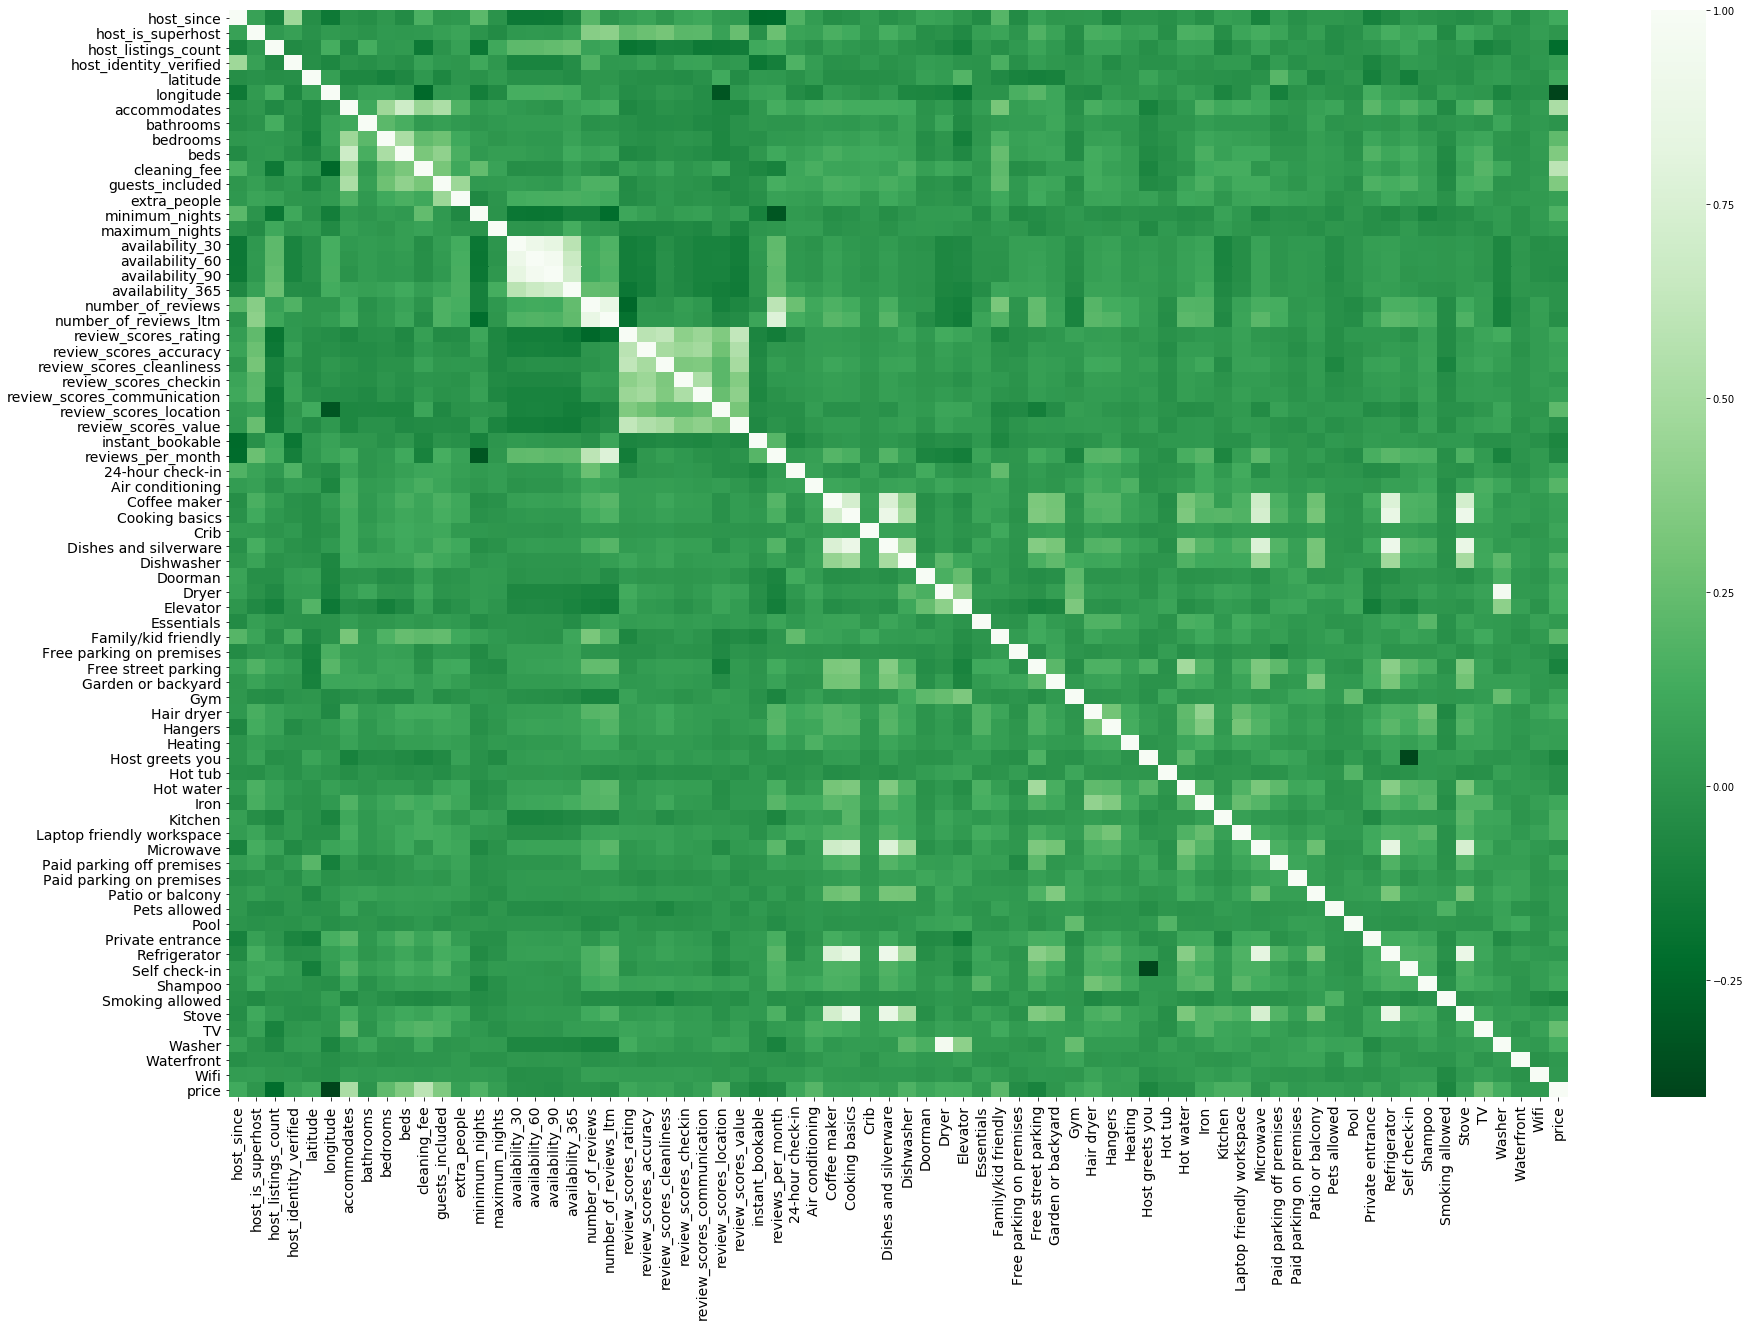

In [274]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(listings_explore.corr(method='spearman'), cmap='Greens_r', ax=ax)
ax.tick_params(labelsize=14)

In [275]:
# Drop highly correlated features
corr_drop = ['number_of_reviews_ltm', # keep number_of_reviews (higher corr with price)
             'availability_60', 'availability_90', # keep availability_30,
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', # keep rating and location
             'Dishes and silverware', 'Coffee maker', 'Refrigerator', 'Microwave', 'Stove', # keep cooking_basics
             'Dryer', # keep washer
            ]
listings_explore.drop(columns=corr_drop, inplace=True)
dropped_cols.extend(corr_drop)

# remove items from attribs lists
for attrib in corr_drop:
    try:
        num_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        disc_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        cat_attribs.remove(attrib)
    except ValueError:
        pass
for attrib in corr_drop:
    try:
        amen_attribs.remove(attrib)
    except ValueError:
        pass

In [276]:
# DataFrame of all columns by type
col_df = pd.DataFrame({'Numerical': pd.Series(num_attribs),
              'Discrete:': pd.Series(disc_attribs),
              'Categorical': pd.Series(cat_attribs),
              'Amenities': pd.Series(amen_attribs)}).fillna('')
print('Used features: ({})'.format(len(num_attribs) + len(disc_attribs) + len(cat_attribs) + len(amen_attribs)))
print('Dropped features: ({})'.format(len(dropped_cols) + len(dropped_amenities)))
col_df

Used features: (63)
Dropped features: (169)


Numerical                    Discrete:                   Categorical                  Amenities
0                  price                   host_since             host_is_superhost           24-hour check-in
1               latitude            number_of_reviews        neighbourhood_cleansed           Air conditioning
2              longitude                 accommodates  neighbourhood_group_cleansed             Cooking basics
3           cleaning_fee                    bathrooms                 property_type                       Crib
4           extra_people                     bedrooms                     room_type                 Dishwasher
5   review_scores_rating                         beds                      bed_type                    Doorman
6      reviews_per_month              guests_included              instant_bookable                   Elevator
7                                      minimum_nights           cancellation_policy                 Essentials
8                                      maximum_nights                                      Family/kid friendly
9                                     availability_30                                 Free parking on premises
10                                   availability_365                                      Free street parking
11                        review_scores_communication                                       Garden or backyard
12                             review_scores_location                                                      Gym
13                                                                                                  Hair dryer
14                                                                                                     Hangers
15                                                                                                     Heating
16                                                                                             Host greets you
17                                                                                                     Hot tub
18                                                                                                   Hot water
19                                                                                                        Iron
20                                                                                                     Kitchen
21                                                                                   Laptop friendly workspace
22                                                                                   Paid parking off premises
23                                                                                    Paid parking on premises
24                                                                                            Patio or balcony
25                                                                                                Pets allowed
26                                                                                                        Pool
27                                                                                            Private entrance
28                                                                                               Self check-in
29                                                                                                     Shampoo
30                                                                                             Smoking allowed
31                                                                                                          TV
32                                                                                                      Washer
33                                                                                                  Waterfront
34                                                                                                        Wifi

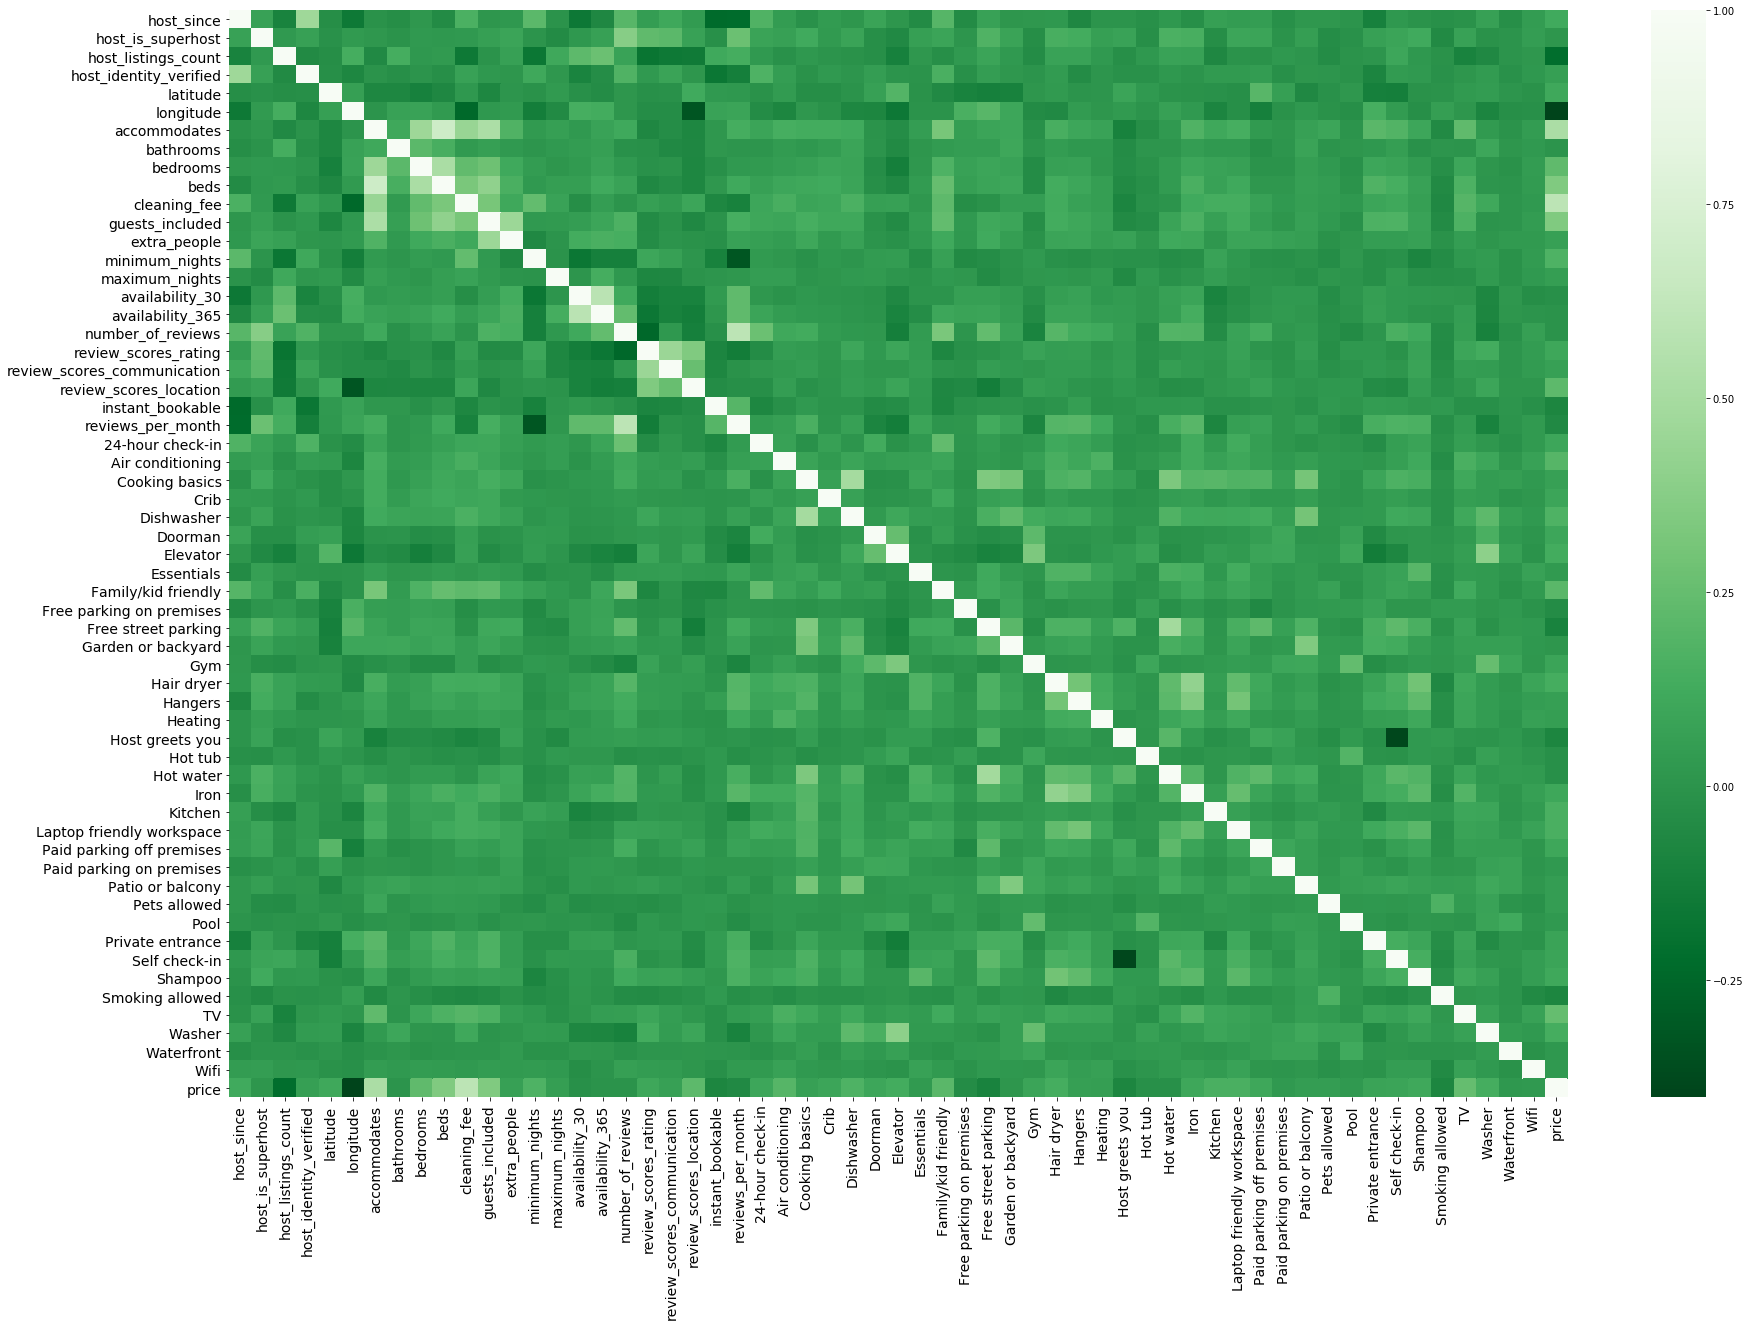

In [277]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(listings_explore.corr(method='spearman'), cmap='Greens_r', ax=ax)
ax.tick_params(labelsize=14)

In [278]:
# Correlations with price
listings_explore.corr(method='spearman').price.sort_values(ascending=False)

price                          1.000000
cleaning_fee                   0.599033
accommodates                   0.518887
guests_included                0.346797
beds                           0.344311
TV                             0.246351
bedrooms                       0.233150
review_scores_location         0.219791
Family/kid friendly            0.208685
Air conditioning               0.196304
Dishwasher                     0.168425
minimum_nights                 0.167984
Kitchen                        0.156079
Laptop friendly workspace      0.153786
Washer                         0.136074
Hair dryer                     0.135015
Elevator                       0.130527
host_since                     0.122586
latitude                       0.110839
Shampoo                        0.108419
Iron                           0.107327
review_scores_rating           0.106467
Paid parking off premises      0.102248
24-hour check-in               0.100687
Doorman                        0.098514


In [279]:
# List of features highly correlated with price (not including categorical string features)
highly_correlated = ['host_since', # discrete
                     'host_listings_count', # discrete
                     'longitude', # numerical
                     'accommodates', # discrete
                     'bedrooms', # discrete
                     'beds', # discrete
                     'cleaning_fee', # numerical
                     'guests_included', # discrete
                     'minimum_nights', # discrete
                     'review_scores_location', # discrete
                     'instant_bookable', # categorical
                     'reviews_per_month', # numerical
                     'Free parking on premises', # categorical
                     'Free street parking', # # categorical
                     'Host greets you', # categorical
                     'Hot water', # categorical
                     'Smoking allowed', # categorical
                     'TV', # categorical
                    ]

In [280]:
# Categorical string variables not shown in correlation matrix
cat_str = pd.Series(['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type'])

In [281]:
corr_df = pd.DataFrame({'numerical': pd.Series(['longitude', 'cleaning_fee', 'reviews_per_month']),
                        'discrete': pd.Series(['host_since', 'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'guests_included',
                                     'minimum_nights', 'review_scores_location']),
                        'categorical': pd.Series(['instant_bookable', 'Free parking on premises', 'Free street parking',
                                        'Host greets you', 'Hot water', 'Smoking allowed']),
                        'cat strings': cat_str}).fillna('')

# Missing Value Imputation (for exploration of data)
This missing value imputation using Pandas is for the multi-variate analysis below, but the true missing value imputations are performed later in Scikit-Learn Pipeline and ColumnTransformer (with the same mean/mode strategy).

In [282]:
# Impute missing values
listings_explore.fillna(listings_explore[num_attribs].mean(), inplace=True) # mean for numerical
listings_explore.fillna(listings_explore[disc_attribs].mode().iloc[0], inplace=True) # mode
listings_explore.fillna(listings_explore[cat_attribs].mode().iloc[0], inplace=True) # mode
listings_explore.fillna(listings_explore[amen_attribs].mode().iloc[0], inplace=True) # mode

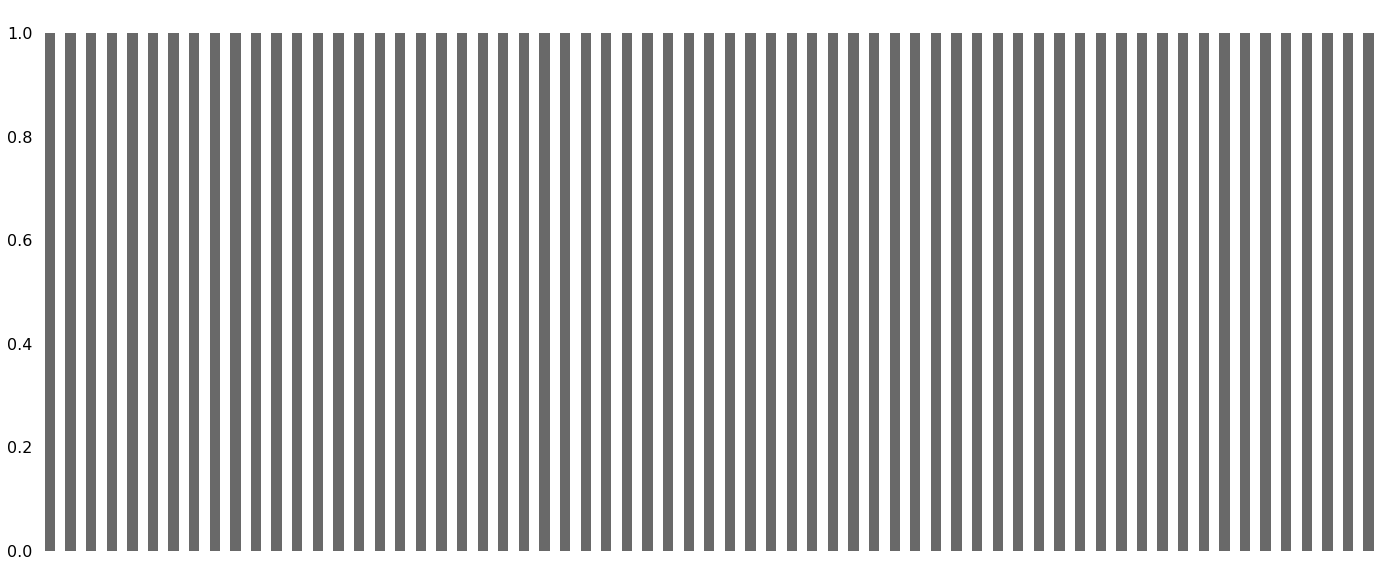

In [283]:
# Confirm missing values imputed
missingno.bar(listings_explore)
plt.show()

# Statistical Analysis of Numerical Features

In [284]:
# Function to plot pearsonr and p-value for regplots
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

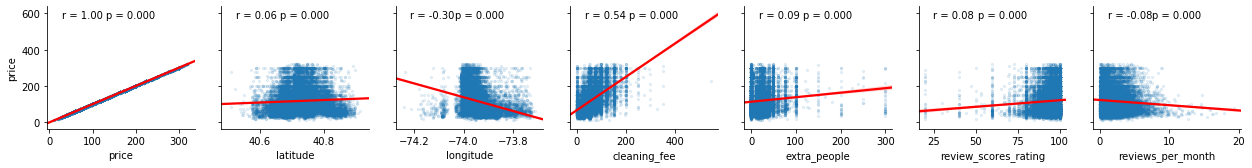

In [285]:
# Regplot numerical features
fig = sns.pairplot(x_vars = num_attribs, y_vars='price', data=listings_explore, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 5}})
fig.map(corrfunc)
plt.show()

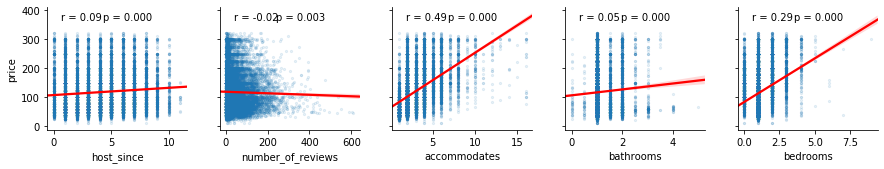

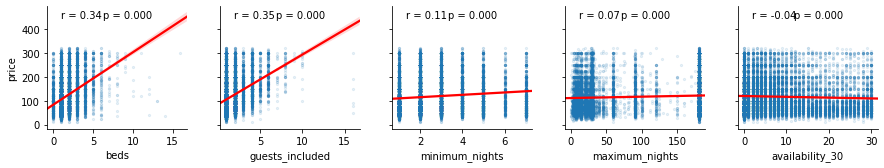

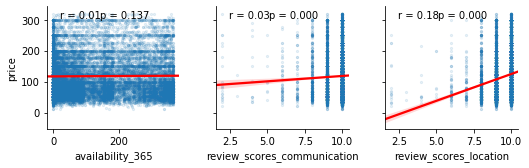

In [286]:
# Regplot discrete features
fig = sns.pairplot(x_vars = disc_attribs[:5], y_vars='price', data=listings_explore, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 5}})
fig.map(corrfunc)
plt.show()
fig = sns.pairplot(x_vars = disc_attribs[5:10], y_vars='price', data=listings_explore, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 5}})
fig.map(corrfunc)
plt.show()
fig = sns.pairplot(x_vars = disc_attribs[10:15], y_vars='price', data=listings_explore, kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 5}})
fig.map(corrfunc)
plt.show()

In [287]:
# Create dictionary of value counts for listings_explore for chisquare goodness of fit tests
listings_dict={}
for col in listings_explore.columns:
    listings_dict[col] = listings_explore[col].value_counts()

In [288]:
# chi-square neighbourhood_cleansed
chi, p = scipy.stats.chisquare(listings_dict['neighbourhood_cleansed'])
print(chi, p)

111251.18406821963 0.0


In [289]:
# chi-square neighbourhood_group_cleansed
chi, p = scipy.stats.chisquare(listings_dict['neighbourhood_group_cleansed'])
print(chi, p)

15215.532237936772 0.0


In [290]:
# chi-square property_type
chi, p = scipy.stats.chisquare(listings_dict['property_type'])
print(chi, p)

144618.14871048252 0.0


In [291]:
# chi-square room_type
chi, p = scipy.stats.chisquare(listings_dict['room_type'])
print(chi, p)

8282.945819467554 0.0


In [292]:
# chi-square bed_type
chi, p = scipy.stats.chisquare(listings_dict['bed_type'])
print(chi, p)

73880.40744592347 0.0


# Multi-Variate Analysis

## Features: Longitude / Latitude

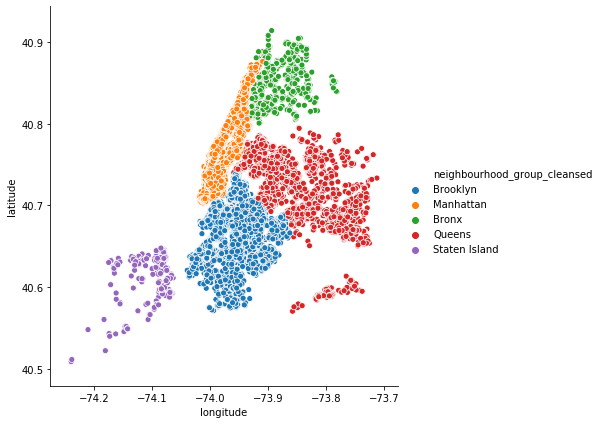

In [293]:
sns.relplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed',
            data=listings_explore, height=6, aspect=1)
plt.figsize = (10,7)
plt.show()

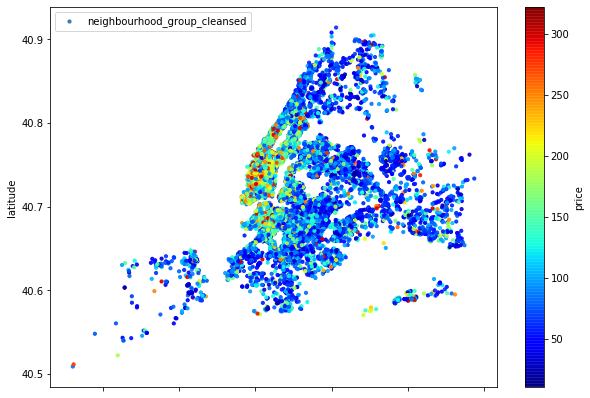

In [294]:
cm = plt.cm.get_cmap('RdYlBu')
listings_explore.plot(kind='scatter', x="longitude", y="latitude", alpha=0.9,
         label="neighbourhood_group_cleansed", figsize=(10,7),
         c='price', cmap=plt.get_cmap("jet"), colorbar=True, s=10)
plt.xlabel=''
plt.show()

Manhattan has significantly higher prices than other boroughs (the lowest Manhattan prices are in the far Upper West Side), along with northern brooklyn. Prices also seem to rise near bodies of water.

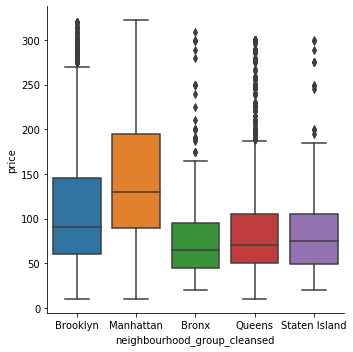

In [295]:
sns.catplot(x='neighbourhood_group_cleansed', y='price',
            data=listings_explore, kind='box',
            hue=None)
plt.show()

In [296]:
neighbourhoods_medians = []
neighbourhoods_names = []

for neighbourhood in listings_explore.neighbourhood_cleansed.unique():
    #print('{} Prices:\n'.format(neighbourhood))
    if len(listings_explore[listings_explore.neighbourhood_cleansed == neighbourhood]) >= 5:
        neighbourhoods_medians.append(listings_explore[listings_explore.neighbourhood_cleansed == neighbourhood].price.median())
        neighbourhoods_names.append(str(neighbourhood))

# Create dataframe of neighborhoods and their median prices (for >=5 listings)
nbh_medians = pd.DataFrame({'neighbourhood': neighbourhoods_names, 'median_price': neighbourhoods_medians})
nbh_medians.sort_values(by=['median_price'], ascending=False, inplace=True)

The boxplots confirm that Manhattan has the highest prices on average, followed by Brooklyn (its upper range likely coming from northern Brooklyn).

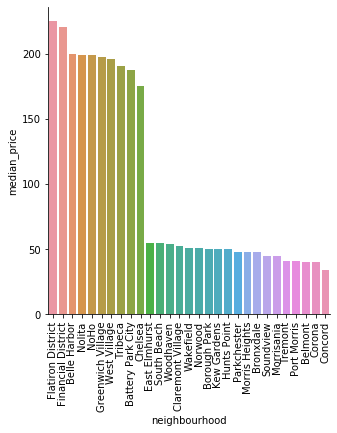

In [297]:
# Top 10 and bottom 10 median prices (for >=5 listings)
fig = sns.catplot(x='neighbourhood', y='median_price', data=nbh_medians.iloc[pd.np.r_[0:10, -19:-1, -1]], kind='bar')
fig.set_xticklabels(rotation=90)
plt.show()

In [298]:
corr_df

numerical                discrete               categorical                   cat strings
0          longitude              host_since          instant_bookable        neighbourhood_cleansed
1       cleaning_fee     host_listings_count  Free parking on premises  neighbourhood_group_cleansed
2  reviews_per_month            accommodates       Free street parking                 property_type
3                                   bedrooms           Host greets you                     room_type
4                                       beds                 Hot water                      bed_type
5                            guests_included           Smoking allowed                              
6                             minimum_nights                                                        
7                     review_scores_location

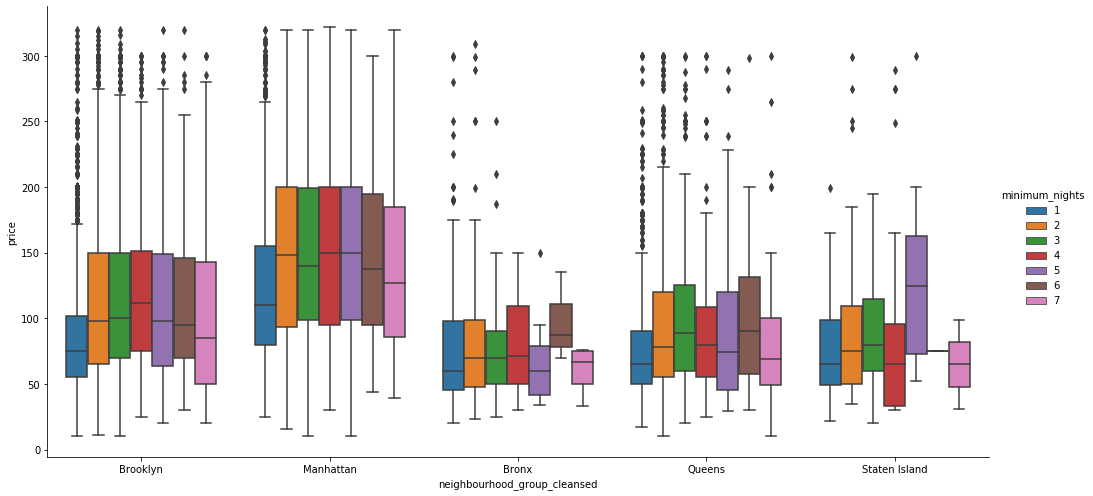

In [299]:
sns.catplot(x='neighbourhood_group_cleansed', y='price',
            data=listings_explore, kind='box',
            hue='minimum_nights', height=7, aspect=2)
plt.show()

## Feature: host_since

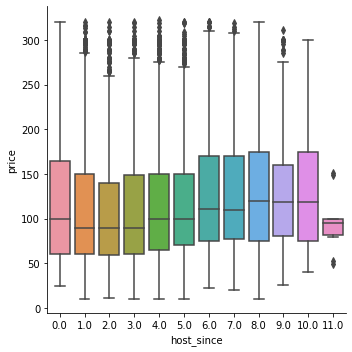

In [300]:
sns.catplot(x='host_since', y='price', data=listings_explore, kind='box')
plt.show()

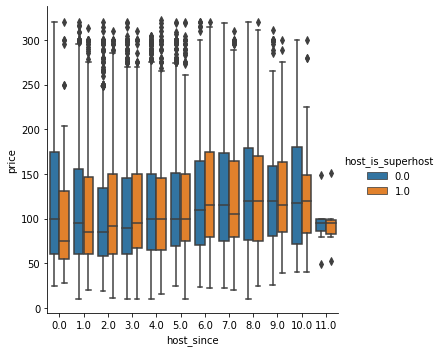

In [301]:
sns.catplot(x='host_since', y='price', data=listings_explore,
            kind='box', hue='host_is_superhost')
plt.show()

# Feature: Accommodates

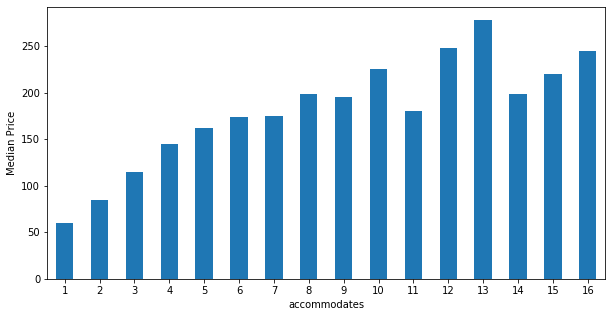

In [302]:
plt.figure(figsize=(10,5))
listings_explore.groupby('accommodates').price.median().plot(kind='bar')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

Median price tends to increase as accommodates increases.

## Census Data

Lets pull some more insights from census.gov (2017):
(https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork#)
(https://www.baruch.cuny.edu/nycdata/income-taxes/hhold_income-numbers.htm)

In [303]:
# Create dataframe of NYC stats
#nyc_stats = pd.DataFrame(data={'neighbourhood': ['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island']})
#nyc_stats = nyc_stats
nyc_stats = pd.DataFrame(data={'Manhattan': [758345, 79781], 'Bronx': [495356, 36593], 'Queens': [777904, 62008], 'Brooklyn': [944650, 52782], 'Staten_Island': [166150, 76244]},
             index=['households', 'median_household_income'])
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Manhattan': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'])],
            'Bronx': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'])],
            'Queens': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'])],
            'Brooklyn': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'])],
            'Staten_Island': [len(listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'])]},
            index=['total_listings']))
nyc_stats.loc['households_per_listing'] = (nyc_stats.loc['households'].values / nyc_stats.loc['total_listings'])
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Manhattan': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'].price.median()],
            'Bronx': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'].price.median()],
            'Queens': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'].price.median()],
            'Brooklyn': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'].price.median()],
            'Staten_Island': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'].price.median()]},
            index=['median_listing_price']))
nyc_stats = nyc_stats.append(pd.DataFrame(data=
            {'Manhattan': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Manhattan'].price.sum()],
            'Bronx': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Bronx'].price.sum()],
            'Queens': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Queens'].price.sum()],
            'Brooklyn': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Brooklyn'].price.sum()],
            'Staten_Island': [listings_explore[listings_explore.neighbourhood_group_cleansed == 'Staten Island'].price.sum()]},
            index=['total_revenue']))

nyc_stats = nyc_stats.round(0).astype('int').T
nyc_stats['neighbourhood'] = ['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island']
cols = nyc_stats.columns.tolist()
cols = [cols[-1]] + cols[:-1]
nyc_stats = nyc_stats[cols]
nyc_stats

neighbourhood  households  median_household_income  total_listings  households_per_listing  median_listing_price  total_revenue
Manhattan          Manhattan      758345                    79781            7212                     105                   130        1041371
Bronx                  Bronx      495356                    36593             551                     899                    65          42506
Queens                Queens      777904                    62008            2725                     285                    70         240647
Brooklyn            Brooklyn      944650                    52782            8527                     111                    91         918807
Staten_Island  Staten Island      166150                    76244             217                     766                    75          18769

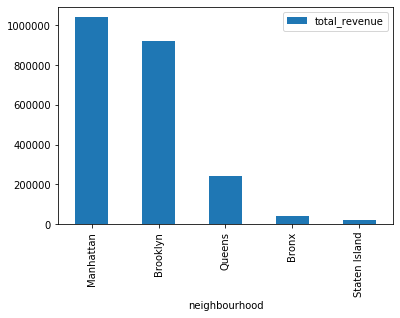

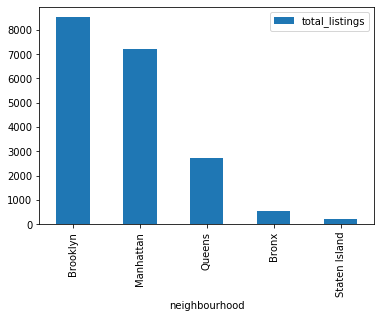

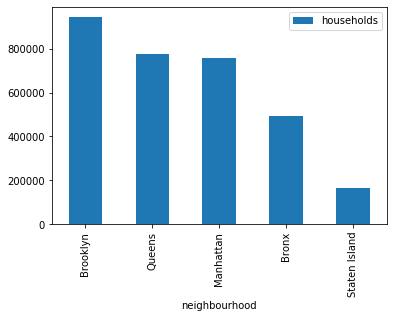

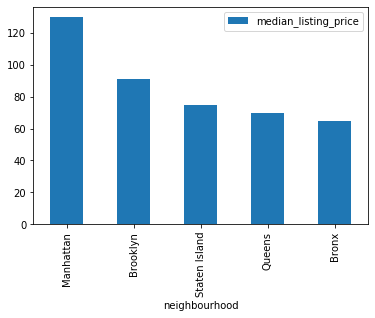

In [304]:
nyc_stats[['neighbourhood', 'total_revenue']].groupby('neighbourhood').sum().sort_values("total_revenue", ascending=False).plot(kind='bar')
nyc_stats[['neighbourhood', 'total_listings']].groupby('neighbourhood').sum().sort_values("total_listings", ascending=False).plot(kind='bar')
nyc_stats[['neighbourhood', 'households']].groupby('neighbourhood').sum().sort_values("households", ascending=False).plot(kind='bar')
nyc_stats[['neighbourhood', 'median_listing_price']].groupby('neighbourhood').sum().sort_values("median_listing_price", ascending=False).plot(kind='bar')
plt.show()

Split these up and title them and pull insights from each.

Next steps:
-  finish bivariate for high corrs, calculate revenue/household for how much you make per additional household
-  Conclude your insights
-  Convert listings_train and prime for listings_test
-  isolate features vs. labels
-  Machine Learning Algorithms (xgboost, lightgbm, catboost)?
-  RandomSearchCV
-  Choose best model
-  Plug in for Liz's Airbnb

# Preparing Training Set for ML Models.

In [305]:
listings_train.head()

id                            listing_url       scrape_id last_scraped                                               name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                                             access                                        interaction                                        house_rules  thumbnail_url  medium_url                                        picture_url  xl_picture_url    host_id                                     host_url        host_name  host_since                      host_location                                         host_about host_response_time host_response_rate  host_acceptance_rate host_is_superhost  \
37753  29060392  https://www.airbnb.com/rooms/29060392  20190602163209   2019-06-03  Spacious Bedroom for 2 w/ washer/dryer + backyard  This modern apartment will be perfect for your...  Washer and Dryer, quaint but enjoyable living ...  This modern apartment will be perfect for your...                none  This is right next to trendy Bushwick. You hav...  Please recycle properly. I will have bins with...  You have many options when it comes traveling ...  Backyard, washer and dryer, living room, kitch...  I will most likely be there during the stay, b...  If this is for staying purposes only, please t...            NaN         NaN  https://a0.muscache.com/im/pictures/097f4aa7-4...             NaN  121836170  https://www.airbnb.com/users/show/121836170           Rafael  2017-03-21  New York, New York, United States  I am a nerd at heart hence why you will see al...     within an hour               100%                   NaN                 f   
12791   9685158   https://www.airbnb.com/rooms/9685158  20190602163209   2019-06-02                    Awesome East Village Apartment!  Super clean, modern and all newly renovated ap...  The apartment is fully furnished, super comfor...  Super clean, modern and all newly renovated ap...                none  The neighborhood is extremely safe with a very...                                                NaN  All the major subway lines can be accessed wit...         The entire apartment is available to book.                                                NaN  Please enjoy your time here and treat our home...            NaN         NaN  https://a0.muscache.com/im/pictures/2c185b69-a...             NaN   28191353   https://www.airbnb.com/users/show/28191353  Norah And James  2015-02-22  New York, New York, United States                                                NaN                NaN                NaN                   NaN                 f   
3719    2223082   https://www.airbnb.com/rooms/2223082  20190602163209   2019-06-03                 Beautiful 1 BR with Private Garden  This quiet one bedroom apartment with a privat...  * Personal entrance  * Private garden (full su...  This quiet one bedroom apartment with a privat...                none  Chelsea is the ultimate hub of NYC with restau...  A dog lives in the apartment, so please be awa...            10 Minute walk to the A, C, E & L lines             Full access to private garden terrace!                                                NaN  No smoking or parties in the apartment. It is ...            NaN         NaN  https://a0.muscache.com/im/pictures/29972903/4...             NaN    1446751    https://www.airbnb.com/users/show/1446751          Allison  2011-11-27  New York, New York, United States  Originally from Maryland I have been living in...       within a day                80%                   NaN                 f   
6355    4589819   https://www.airbnb.com/rooms/4589819  20190602163209   2019-06-03  Cozy bedroom in a luxury building with 24h doo...  It's a cozy and nice place even thoug

In [306]:
# drop price (label) from num_attribs list
num_attribs.remove('price')

We will now create a function to clean any dataframe based on the preprocessing performed above. This way, any new data can be cleansed through this function in the future, including the test set.

In [307]:
# Function to clean dataframe
def clean_listings(df):
    '''
    Cleans listings dataframe to prepare for ML models.
    
    Args:
    
    df -- uncleaned listings dataframe
    
    Returns:
    
    clean_df -- cleaned listings dataframe'''
    
    # 1. Price (string mod, cut)
    
    # Remove string characters, convert to float
    df['price'] = df['price'].astype('str')
    df['price'] = df['price'].str.replace('.00', '', regex=False)
    df['price'] = df['price'].str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False)
    df['price'] = df['price'].astype('float64')

    # Only include price in range [10, 323]
    df = df[(df.price < 323) & (df.price >= 10)]

    # 2. number_of_reviews_ltm (cut)

    # Only include number_of_reviews_ltm > 0
    df = df[df.number_of_reviews_ltm > 0]

    # 3. host_since (string mod)

    # Convert to how many years host
    df['host_since'] = 2019 - df['host_since'].str[:4].astype('float64')

    # 4. cleaning_fee (string mod)

    # Remove string characters, convert to float
    df['cleaning_fee'] = df.cleaning_fee.str.replace('$', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.str.replace('.00', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.str.replace(',', '', regex=False)
    df['cleaning_fee'] = df.cleaning_fee.astype('float64')

    # 5. extra_people (string mod)

    # Remove string characters, convert to float
    df['extra_people'] = df.extra_people.str.replace('$', '', regex=False)
    df['extra_people'] = df.extra_people.str.replace('.00', '', regex=False)
    df['extra_people'] = df.extra_people.str.replace(',', '', regex=False)
    df['extra_people'] = df.extra_people.astype('float64')

    # 6. minimum_nights (cut)

    # only include minimum_nights <= 7
    df = df[df.minimum_nights <= 7].copy()

    # 7. maximum_nights (cap)

    # Cap maximum_nights at 1125
    df['maximum_nights'].values[df.maximum_nights > 180] = 180

    # 8. host_is_superhost (convert to 1/0)

    # Convert t/f to 1/0
    df['host_is_superhost'] = convert_tf(df, 'host_is_superhost')

    # 9. host_identity_verified (convert to 1/0) # column is in drop_later actually

    # Convert t/f to 1/0
    #df['host_identity_verified'] = convert_tf(df, 'host_identity_verified')

    # 10. property_type (filter)

    # Filter specific property types
    df = df[
                           (df.property_type == 'Apartment') |
                           (df.property_type == 'House') |
                           (df.property_type == 'Condominium') |
                           (df.property_type == 'Townhouse') |
                           (df.property_type == 'Guest suite') |
                           (df.property_type == 'Guesthouse') |
                           (df.property_type == 'Loft') |
                           (df.property_type == 'Serviced apartment') |
                           (df.property_type == 'Tiny house') |
                           (df.property_type == 'Earth house') |
                           (df.property_type == 'Villa') |
                           (df.property_type == 'Castle') |
                           (df.property_type == 'Cottage') |
                           (df.property_type == 'Dome house')]

    # 11. amenities (cut, string mod)

    # Remove empty values ({})
    df = df[df.amenities != '{}']

    # Remove brackets and quotes, split by ','
    df['amenities'] = df.amenities.astype('str').str.replace('{', '', regex=False).copy()
    df['amenities'] = df.amenities.str.replace('}', '', regex=False).copy()
    df['amenities'] = df.amenities.str.replace('"', '', regex=False).copy()
    df['amenities'] = df.amenities.str.split(',').copy()

    # 12. instant_bookable (convert to 1/0)

    # Convert t/f to 1/0
    df['instant_bookable'] = convert_tf(df, 'instant_bookable')

    # 13. require_guest_profile_picture (convert to 1/0)

    # Convert t/f to 1/0
    df['require_guest_profile_picture'] = convert_tf(df, 'require_guest_profile_picture')

    # 14. amenities (multilabelbinarizer)

    # Create columns for each amenity using MultiLabelBinarizer
    from sklearn.preprocessing import MultiLabelBinarizer

    mlb = MultiLabelBinarizer()
    amenities_df = pd.DataFrame(mlb.fit_transform(df.amenities))
    classes = mlb.classes_ # amenity names
    amenities_df.columns = classes # add amenity names as columns

    # Save indices
    indices = np.array(df.index)

    # Merge new amenities columns with original dataframe
    df = pd.concat([df.reset_index(drop=True), amenities_df.reset_index(drop=True)], axis=1)

    # Reapply original indices
    df = df.set_index(indices)

    # Drop 'amenities' column
    df.drop(columns='amenities', inplace=True)

    # Drop unused amenities
    df.drop(columns=dropped_amenities, inplace=True)
    
    #15. LabelEncoder for string-type categories
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in ['neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'property_type',
                'room_type',
                'bed_type',
                'cancellation_policy']:
        le.fit(df[col])
        df[col] = le.transform(df[col])
        
    #16. Drop unused features
    df.drop(columns=(dropped_cols+drop_later), inplace=True)
        
    return df

In [308]:
# Clean Training Data
listings_prepared = clean_listings(listings_train)
listings_prepared.head()

host_since  host_is_superhost  neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude  property_type  room_type  accommodates  bathrooms  bedrooms  beds  bed_type  price  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_365  number_of_reviews  review_scores_rating  review_scores_communication  review_scores_location  instant_bookable  cancellation_policy  reviews_per_month  24-hour check-in  Air conditioning  Cooking basics  Crib  Dishwasher  Doorman  Elevator  Essentials  Family/kid friendly  Free parking on premises  Free street parking  Garden or backyard  Gym  Hair dryer  Hangers  Heating  Host greets you  Hot tub  Hot water  Iron  Kitchen  Laptop friendly workspace  Paid parking off premises  Paid parking on premises  Patio or balcony  Pets allowed  Pool  Private entrance  Self check-in  Shampoo  Smoking allowed  TV  Washer  Waterfront  Wifi
37753         2.0                0.0                      27                             1  40.70229  -73.92223              0          1             2        1.0       1.0   1.0         4   85.0          25.0                1          20.0               1              60                6               325                 38                  95.0                         10.0                    10.0                 0                    3               5.09                 0                 1               1     0           1        0         0           1                    0                         0                    1                   1    0           0        1        1                0        0          1     1        1                          1                          0                         0                 0             1     0                 0              1        1                0   1       1           0     1
3719          8.0                0.0                      33                             2  40.74502  -74.00429              0          0             4        1.0       1.0   4.0         4  285.0          90.0                2          50.0               2              10                0               168                 45                  96.0                         10.0                    10.0                 0                    1               0.72                 0                 1               0     0           0        0         0           1                    1                         0                    0                   0    0           1        1        1                0        0          1     1        1                          1                          0                         0                 0             0     0                 0              0        0                0   1       1           0     1
6355          6.0                0.0                      79                             1  40.69563  -73.98193              0          1             2        1.0       1.0   1.0         4  110.0          70.0                1           0.0               1               3               17                22                 34                  98.0                         10.0                    10.0                 0                    3               1.97                 0                 1               1     0           1        0         1           1                    0                         0                    0                   0    1           1        0        0                0        0          0     1        1                          1                          0                         0                 0             0     0                 0              1        1                0   1       1           0     1
44513         3.0                0.0                     200                             2  40.84232  -73.93772              0          1             1        1.0       1.0   1.0         4   60.0          25.0                1         

Remove label feature from training data.

In [309]:
# create y_train from label, drop label from listings_prepared
y_train = listings_prepared['price']
listings_prepared.drop(columns='price', inplace=True)

In [310]:
# Confirm y_train values correct
print(len(y_train))
print(len(listings_prepared))
y_train[0:5]

19232
19232


37753     85.0
3719     285.0
6355     110.0
44513     60.0
39362     50.0
Name: price, dtype: float64

In [311]:
# Compare shape of listings_explore and listings_prepared
print(listings_explore.shape) # +2 cols in drop_later, +1 col is price
print(listings_prepared.shape)

(19232, 65)
(19232, 62)


In [312]:
# Check missing values
sum(listings_prepared.isnull().sum())

3041

## Transformation Pipelines

We will now create transformation Pipelines to scale, missing value impute, and one hot encode the data based on data type, and run it through the training data using ColumnTransformer. These pipelines can later be used to transform the test data as well.

In [313]:
# Create pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler()),
])

disc_pipeline = Pipeline([
    ('disc_imputer', SimpleImputer(strategy='most_frequent')),
    ('disc_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_ohe', OneHotEncoder(categories='auto', drop='first',
                              sparse=False)),
])

amen_pipeline= Pipeline([
    ('amen_imputer', SimpleImputer(strategy='most_frequent')),
])

ohe_attribs = ['neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'property_type',
                'room_type',
                'bed_type',
                'cancellation_policy']

In [314]:
# Create X_train from ColumnTransformer
from sklearn.compose import ColumnTransformer

listings_prepared_pipeline = listings_prepared.copy()
listings_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('disc', disc_pipeline, disc_attribs),
    ('cat', cat_pipeline, cat_attribs),
    ('amen', amen_pipeline, amen_attribs),
])
X_train = listings_pipeline.fit_transform(listings_prepared_pipeline)

In [315]:
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  \
0 -0.411028  0.464247 -0.770533  0.093062  0.085891  1.814904 -0.906721 -0.030291 -0.496336 -0.313221 -0.216815 -0.514094 -0.535962 -0.995271 -0.608701 -0.102335  1.584336  0.338921  0.612039  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.333903 -1.144846  0.909734  1.316271  0.229418 -0.674963  1.622366  0.098167  0.680744 -0.313221 -0.216815  2.417721  0.364739 -0.337503 -1.259061 -0.796392  0.323093  0.338921  0.612039  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.527135 -0.706395  0.392729 -0.722411  0.516473  0.037241  0.779337 -0.103696 -0.496336 -0.313221 -0.216815 -0.514094 -0.535962 -0.995271 -1.350112  1.170103 -0.849783  0.338921  0.612039  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  2.030

We will also create a separate X_train_trees for tree-based algorithms using only LabelEncoder, not OneHotEncoder for non-binary categories. Tree-based algorithms often perform better on data with less binary columns.

In [316]:
# remove OneHotEncoder from cat_pipeline
cat_pipeline_trees = Pipeline([
    ('cat_imputer_trees', SimpleImputer(strategy='most_frequent')),
])

In [317]:
# X_train_trees
listings_prepared_trees = listings_prepared.copy()
listings_pipeline_trees = ColumnTransformer([
    ('num_trees', num_pipeline, num_attribs),
    ('disc_trees', disc_pipeline, disc_attribs),
    ('cat_trees', cat_pipeline_trees, cat_attribs),
    ('amen_trees', amen_pipeline, amen_attribs),
])
X_train_trees = listings_pipeline_trees.fit_transform(listings_prepared_trees)

In [318]:
# Confirm for no missing values in X_train and X_train_trees
print(sum(pd.DataFrame(X_train).isnull().sum()))
print(sum(pd.DataFrame(X_train_trees).isnull().sum()))

0
0


In [319]:
# Confirm shape
print(X_train_trees.shape)
print(listings_prepared.shape)

(19232, 62)
(19232, 62)


# SelectKBest Feature Importance (Top 10)

Here, we use the SelectKBest method to choose the top 10 most important features. We will then create training data for the top 10 features, and compare the results with the full training data.

In [320]:
# SelectKBest Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# X_train's column names
X_train_cols = (num_attribs+disc_attribs+cat_attribs+amen_attribs)

# Create X and y
X = pd.DataFrame(X_train_trees, columns=X_train_cols).copy()
y = y_train.copy()

# Fit SelectKBest with k=10
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X,y)

# Create DataFrames for scores and features (columns)
df_fscores = pd.DataFrame(fit.scores_, columns=['f-score'])
df_pvals = pd.DataFrame(fit.pvalues_, columns=['p-value'])
df_columns = pd.DataFrame(X.columns, columns=['Feature'])

# concat two dataframes for better visualization
featureScores = pd.concat([df_columns,df_fscores,df_pvals], axis=1)
featureScores.columns = ['Feature', 'F-score', 'p-value'] # naming the dataframe columns
featureScores.sort_values(by='F-score', ascending=False)

Feature       F-score        p-value
23                     room_type  12202.294680   0.000000e+00
2                   cleaning_fee   8063.623491   0.000000e+00
8                   accommodates   6090.811005   0.000000e+00
12               guests_included   2757.526806   0.000000e+00
11                          beds   2540.682177   0.000000e+00
1                      longitude   1839.408376   0.000000e+00
10                      bedrooms   1828.756253   0.000000e+00
58                            TV   1106.252522  6.723969e-236
35           Family/kid friendly    735.710637  4.998905e-159
28              Air conditioning    637.215554  2.397275e-138
31                    Dishwasher    632.610746  2.234600e-137
18        review_scores_location    622.731332  2.691393e-135
47                       Kitchen    421.773295   9.911016e-93
59                        Washer    409.790920   3.540681e-90
48     Laptop friendly workspace    408.793023   5.777999e-90
33                      Elevator    326.357349   2.368435e-72
40                    Hair dryer    308.047423   1.986774e-68
20        neighbourhood_cleansed    282.522905   5.960451e-63
26           cancellation_policy    258.747545   7.674831e-58
13                minimum_nights    257.050585   1.778613e-57
46                          Iron    200.951939   2.191659e-45
32                       Doorman    195.733887   2.936903e-44
56                       Shampoo    192.129009   1.765302e-43
37           Free street parking    188.837022   9.085132e-43
49     Paid parking off premises    183.324423   1.413217e-41
30                          Crib    180.013392   7.350885e-41
27              24-hour check-in    168.747155   2.016222e-38
3                   extra_people    167.996204   2.931830e-38
6                     host_since    159.567108   1.963303e-36
39                           Gym    150.105225   2.209019e-34
55                 Self check-in    130.255260   4.503220e-30
43               Host greets you    127.831472   1.514692e-29
22                 property_type    124.365173   8.589295e-29
5              reviews_per_month    114.759906   1.056556e-26
4           review_scores_rating    114.282498   1.342244e-26
57               Smoking allowed    102.115271   6.011784e-24
25              instant_bookable     93.036905   5.755906e-22
54              Private entrance     88.186405   6.603519e-21
14                maximum_nights     87.203397   1.083015e-20
29                Cooking basics     76.254108   2.694743e-18
41                       Hangers     72.498667   1.792696e-17
0                       latitude     69.272997   9.140399e-17
51              Patio or balcony     52.686923   4.060860e-13
9                      bathrooms     52.419402   4.651735e-13
24                      bed_type     47.988084   4.423736e-12
42                       Heating     43.510078   4.327592e-11
15               availability_30     37.370891   9.955176e-10
52                  Pets allowed     36.939745   1.241324e-09
36      Free parking on premises     33.644734   6.719130e-09
53                          Pool     23.946926   9.982986e-07
21  neighbourhood_group_cleansed     23.864565   1.041879e-06
34                    Essentials     21.912893   2.872567e-06
17   review_scores_communication     18.322371   1.874069e-05
50      Paid parking on premises     17.713750   2.579292e-05
61                          Wifi     17.531806   2.837988e-05
45                     Hot water      8.987239   2.722188e-03
7              number_of_reviews      8.908781   2.841595e-03
60                    Waterfront      8.810101   2.999365e-03
44                       Hot tub      7.089225   7.761331e-03
38            Garden or backyard      2.224370   1.358645e-01
16              availability_365      2.210029   1.371325e-01
19             host_is_superhost      0.063258   8.014217e-01

In [321]:
# Get top 10 features
top_10 = list(featureScores[featureScores['F-score'] >= 637]['Feature'])
top_10

['longitude',
 'cleaning_fee',
 'accommodates',
 'bedrooms',
 'beds',
 'guests_included',
 'room_type',
 'Air conditioning',
 'Family/kid friendly',
 'TV']

In [322]:
# Modify attrib lists for Top 10
import collections

# num_attribs_10
num_test = top_10 + num_attribs
num_attribs_10 = []
num_attribs_10.extend([item for item, count in collections.Counter(num_test).items() if count > 1])
print(num_attribs_10)

# disc_attribs_10
disc_test = top_10 + disc_attribs
disc_attribs_10 = []
disc_attribs_10.extend([item for item, count in collections.Counter(disc_test).items() if count > 1])
print(disc_attribs_10)

#cat_attribs_10
cat_test = (top_10 + cat_attribs)
cat_attribs_10 = []
cat_attribs_10.extend([item for item, count in collections.Counter(cat_test).items() if count > 1])
print(cat_attribs_10)

#amen_attribs_10
amen_test = (top_10 + amen_attribs)
amen_attribs_10 = []
amen_attribs_10.extend([item for item, count in collections.Counter(amen_test).items() if count > 1])
print(amen_attribs_10)

['longitude', 'cleaning_fee']
['accommodates', 'bedrooms', 'beds', 'guests_included']
['room_type']
['Air conditioning', 'Family/kid friendly', 'TV']


In [323]:
# Create new pipelines and ColumnTransformer for Top 10

# Create pipelines (X_train)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipeline_ = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler()),
])

disc_pipeline_ = Pipeline([
    ('disc_imputer', SimpleImputer(strategy='most_frequent')),
    ('disc_scaler', StandardScaler()),
])

cat_pipeline_ = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_ohe_10', OneHotEncoder(categories='auto', drop='first',
                              sparse=False)),
])

amen_pipeline_ = Pipeline([
    ('amen_imputer', SimpleImputer(strategy='most_frequent')),
])

# Create X_train from ColumnTransformer
from sklearn.compose import ColumnTransformer

listings_prepared_pipeline_ = listings_prepared.copy()
listings_pipeline = ColumnTransformer([
    ('num', num_pipeline_, num_attribs_10),
    ('disc', disc_pipeline_, disc_attribs_10),
    ('cat', cat_pipeline_, cat_attribs_10),
    ('amen', amen_pipeline_, amen_attribs_10),
])
X_train_10 = listings_pipeline.fit_transform(listings_prepared_pipeline)

# remove OneHotEncoder from cat_pipeline
cat_pipeline_trees = Pipeline([
    ('cat_imputer_trees', SimpleImputer(strategy='most_frequent')),
])

# X_train_trees_10
listings_prepared_trees_10 = listings_prepared.copy()
listings_pipeline_trees_10 = ColumnTransformer([
    ('num_trees', num_pipeline, num_attribs_10),
    ('disc_trees', disc_pipeline, disc_attribs_10),
    ('cat_trees_10', cat_pipeline_trees, cat_attribs_10),
    ('amen_trees', amen_pipeline, amen_attribs_10),
])
X_train_trees_10 = listings_pipeline_trees_10.fit_transform(listings_prepared_trees_10)

# Machine Learning Algorithms

Before feature selection, the best CV RMSE we got was 35.5678 with XGBoost Regressor. Catboost was 35.6.

To do:


Models:
-  RandomSearchCV/GridSearchCV's for promising models.
-  See Krish Naik's video for xgboost tuning.
-  Plot feature importances for best model.
-  Research what do do with feature importances.
-  Find out how to make it better.


Data:
-  Import NYC household sizes for income range (See what you can do with it).
-  Play with scatterplot filters for num vars with cat filters.
-  Write conclusions.

In [324]:
# Split training set into validation and train sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train.copy(), y_train.copy(),
                                                        test_size=0.2, random_state=42)
# Trees data
X_train_trees_val, X_val_trees, y_train_trees_val, y_val_trees = train_test_split(X_train_trees.copy(), y_train.copy(),
                                                                                test_size=0.2, random_state=42)

In [325]:
# Run Model function
def run_model(model, X_train, y_train):
    '''
    Function to run models and output RMSE.
    
    Args:
    model -- model with parameters
    X_train -- X_train
    y_train -- y_train
    
    Return:
    rmse -- root mean squared error
    run_time -- model run time'''
    
    start_time = time.time() # Timing
    
    # Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    # Metrics
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    rmse = np.round(np.sqrt(mean_squared_error(y_train, y_pred)), 4)
    r2 = np.round(r2_score(y_train, y_pred), 4)
    print('RMSE:', rmse)
    print('r2:', r2)
    
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    
    return rmse, r2, run_time

In [326]:
def run_model_cv(model, X_train, y_train, cv=10):
    '''
    Function to run cross_val_score on a model.
    
    Args:
    model -- model with parameters
    X_train -- X_train
    y_train -- y_train
    
    Return:
    cv_scores -- RMSE scores of each k-fold
    run_time'''
    
    start_time = time.time() # Timing
    from sklearn.model_selection import cross_validate

    scoring = {'RMSE': 'neg_mean_squared_error',
               'r2': 'r2'}
    scores = cross_validate(model, X_train, y_train, scoring=scoring,
                             cv=cv, return_train_score=False)
    rmse = np.round(np.mean(np.sqrt(-scores['test_RMSE'])), 4)
    r2 = np.round(np.mean(scores['test_r2']), 4)
    print('RMSE CV:', rmse)
    print('r2 CV:', r2)
    
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    
    return rmse, r2
    
    
    
'''    from sklearn.model_selection import cross_val_score
    start_time = time.time() # Timing
    cv_scores = cross_val_score(model, X_train, y_train,
                                      scoring='r2', #'neg_mean_squared_error',
                                      cv=cv)
    #cv_scores = np.sqrt(-cv_scores)
    # Metrics
    #print('CV RMSE:', cv_scores.mean())
    #print('CV Std:', cv_scores.std())
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    
    return cv_scores'''

"    from sklearn.model_selection import cross_val_score\n    start_time = time.time() # Timing\n    cv_scores = cross_val_score(model, X_train, y_train,\n                                      scoring='r2', #'neg_mean_squared_error',\n                                      cv=cv)\n    #cv_scores = np.sqrt(-cv_scores)\n    # Metrics\n    #print('CV RMSE:', cv_scores.mean())\n    #print('CV Std:', cv_scores.std())\n    run_time = (time.time() - start_time)\n    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))\n    \n    return cv_scores"

In [327]:
# RandomSearchCV
def random_search(est, params, nbr_iter, X_train, y_train, cv=10):
    start_time = time.time() # Timing
    from sklearn.model_selection import RandomizedSearchCV
    rdmsearch = RandomizedSearchCV(est, param_distributions=params,
                                   scoring='neg_mean_squared_error',
                                   n_iter=nbr_iter, cv=cv)
    rdmsearch.fit(X_train, y_train)
    best_params = rdmsearch.best_params_
    best_estimator = rdmsearch.best_estimator_
    best_score = rdmsearch.best_score_
    print('Best RMSE:', np.sqrt(-best_score))
    print(best_params)
    # Timing
    run_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=run_time)))
    return rdmsearch, best_estimator

In [328]:
# Plot Learning Curves function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

## Linear Regression

In [385]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Run Model
lin_reg_rmse, lin_reg_r2, lin_reg_time = run_model(lin_reg, X_train, y_train)
print()
# Run Model CV
lin_reg_rmse_cv, lin_reg_r2_cv = run_model_cv(lin_reg, X_train, y_train)

RMSE: 36.4627
r2: 0.6924
Running Time: 0:00:00.516028

RMSE CV: 62120873432.1528
r2 CV: -6.071130849190576e+18
Running Time: 0:00:04.484702


In [386]:
# Linear Regression Model Top 10
from sklearn.linear_model import LinearRegression
lin_reg_10 = LinearRegression()
# Run Model
lin_reg_10_rmse, lin_reg_10_r2, lin_reg_10_time = run_model(lin_reg, X_train_10, y_train)
print()
# Run Model CV
lin_reg_10_rmse_cv, lin_reg_10_r2_cv = run_model_cv(lin_reg, X_train_10, y_train)

RMSE: 44.2512
r2: 0.547
Running Time: 0:00:00.014880

RMSE CV: 44.2857
r2 CV: 0.5455
Running Time: 0:00:00.105575


Let's try out some polynomial features. We will only run for top 10 due to dimensionality constraints.

In [331]:
# Polynomial Linear Regression Top 10 (deg 2 was 43.0661/43.3208)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_10 = poly_features.fit_transform(X_train_10)
lin_reg_poly_10 = LinearRegression()

# Run Model
lin_reg_poly_10_rmse, lin_reg_poly_10_r2, lin_reg_poly_10_time = run_model(lin_reg_poly_10, X_poly_10, y_train)
print()
# Run Model CV
lin_reg_poly_10_rmse_cv, lin_reg_poly_10_r2_cv = run_model_cv(lin_reg_poly_10, X_poly_10, y_train)

RMSE: 41.1676
r2: 0.6079
Running Time: 0:00:00.636256

RMSE CV: 43.148
r2 CV: 0.5682
Running Time: 0:00:04.052256


Linear Regression performs best with degree=2.

# Stochastic Gradient Descent

In [332]:
# SGD Model
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
# Run Model
sgd_rmse, sgd_r2, sgd_time = run_model(sgd, X_train, y_train)
print()
# Run Model CV
sgd_rmse_cv, sgd_r2_cv = run_model_cv(sgd, X_train, y_train)

RMSE: 36.8065
r2: 0.6866
Running Time: 0:00:01.576715

RMSE CV: 37.2353
r2 CV: 0.6787
Running Time: 0:00:10.612077


In [333]:
# SGD Model Top 10
from sklearn.linear_model import SGDRegressor
sgd_10 = SGDRegressor()

# Run Model
sgd_10_rmse, sgd_10_r2, sgd_10_time = run_model(sgd_10, X_train_10, y_train.ravel())
print()
# Run Model CV
sgd_10_rmse_cv, sgd_10_r2_cv = run_model_cv(sgd_10, X_train_10, y_train)

RMSE: 44.3245
r2: 0.5455
Running Time: 0:00:00.060280

RMSE CV: 44.3124
r2 CV: 0.545
Running Time: 0:00:00.711876


SGDRegressor looks promising so we will RandomSearchCV.

In [336]:
'''# RandomSearchCV
sgd_param_grid = {
    max_iter =
        }
sgd_best_params, sgd_best_score = random_search()'''

'# RandomSearchCV\nsgd_param_grid = {\n    max_iter =\n        }\nsgd_best_params, sgd_best_score = random_search()'

SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',
                       alpha=0.0002, eta0=0.00001,
                       random_state=42)

In [337]:
'''# Polynomial SGD Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

# Run Model
sgd_reg_poly = SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',
                            alpha=0.0002, eta0=0.00001,
                            random_state=42)
sgd_reg_poly, sgd_reg_poly_time = run_model(sgd_reg, X_poly, y_train)
print()
sgd_reg_poly_cv = run_model_cv(sgd_reg, X_poly, y_train)'''

"# Polynomial SGD Regression\nfrom sklearn.preprocessing import PolynomialFeatures\npoly_features = PolynomialFeatures(degree=2, include_bias=False)\nX_poly = poly_features.fit_transform(X_train)\n\n# Run Model\nsgd_reg_poly = SGDRegressor(max_iter=5000, tol=1e-3, penalty='l2',\n                            alpha=0.0002, eta0=0.00001,\n                            random_state=42)\nsgd_reg_poly, sgd_reg_poly_time = run_model(sgd_reg, X_poly, y_train)\nprint()\nsgd_reg_poly_cv = run_model_cv(sgd_reg, X_poly, y_train)"

For now, SGDRegressor with full features performs best at RMSE 36 and CV at 37.

# KNN Regressor

In [338]:
# KNN Model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)

# Run Model
knn_rmse, knn_r2, knn_time = run_model(KNeighborsRegressor(n_neighbors=2), X_train, y_train)
print()
# Run Model CV
knn_rmse_cv, knn_r2_cv = run_model_cv(knn, X_train, y_train, cv=5)

RMSE: 26.5359
r2: 0.8371
Running Time: 0:02:52.292211



In [339]:
# KNN Model Top 10
from sklearn.neighbors import KNeighborsRegressor
knn_10 = KNeighborsRegressor(n_neighbors=4)

# Run Model
knn_10_rmse, knn_10_r2, knn_10_time = run_model(knn_10, X_train_10, y_train)
print()
# Run Model CV
knn_10_rmse_cv, knn_10_r2_cv = run_model_cv(knn_10, X_train_10, y_train, cv=5)

RMSE: 34.3149
r2: 0.7276
Running Time: 0:00:02.004422

RMSE CV: 44.7586
r2 CV: 0.536
Running Time: 0:00:03.298530


# Support Vector Machine Regressor

### Linear SVR

In [340]:
# Linear SVR
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(epsilon=0)

# Run Model
lin_svr_rmse, lin_svr_r2, lin_svr_time = run_model(lin_svr, X_train, y_train)
print()
# Run Model CV
lin_svr_rmse_cv, lin_svr_r2_cv = run_model_cv(lin_svr, X_train, y_train)

RMSE: 37.5309
r2: 0.6741
Running Time: 0:00:00.241921

RMSE CV: 37.7504
r2 CV: 0.6698
Running Time: 0:00:02.416786


In [389]:
# Linear SVR Top 10
from sklearn.svm import LinearSVR
lin_svr_10 = LinearSVR(epsilon=0)

# Run Model
lin_svr_10_rmse, lin_svr_10_r2, lin_svr_10_time = run_model(lin_svr_10, X_train_10, y_train)
print()
# Run Model CV
lin_svr_10_rmse_cv, lin_svr_10_r2_cv = run_model_cv(lin_svr_10, X_train_10, y_train)

RMSE: 44.8149
r2: 0.5354
Running Time: 0:00:00.055051

RMSE CV: 44.849
r2 CV: 0.534
Running Time: 0:00:00.428582


### SVR Poly Kernel

Need to Random Search different degrees, C's, and epsilon's.

In [342]:
# SVR Poly Kernel Top 10
from sklearn.svm import SVR
svr_poly_10 = SVR(kernel='poly', degree=2, C=100, epsilon=1, gamma='auto_deprecated')

# Run Model
svr_poly_10_rmse, svr_poly_10_r2, svr_poly_10_time = run_model(svr_poly_10, X_train_10, y_train)
print()
# Run Model CV
#svr_poly_10_rmse_cv, svr_poly_10_r2_cv = run_model_cv(svr_poly_10, X_train_10, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE: 44.4849
r2: 0.5422
Running Time: 0:00:25.791952



# Decision Tree Regressor
-  `max_depth`: restricts the maximum depth.
-  `min_samples_split`: (the minimum number of samples a node must have before it can be split)
-  `min_samples_leaf`: the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances)
-  `max_leaf_nodes`: maximum number of leaf nodes
-  `max_features`: maximum number of features that are evaluated for splitting at each node


Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model.

In [343]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5,
                                 random_state=42)
# Run Model
tree_reg_rmse, tree_reg_r2, tree_reg_time = run_model(tree_reg, X_train, y_train)
print()
# Run Model CV
tree_reg_rmse_cv, tree_reg_r2_cv = run_model_cv(tree_reg, X_train, y_train)

RMSE: 41.5669
r2: 0.6003
Running Time: 0:00:00.436686

RMSE CV: 42.4037
r2 CV: 0.5832
Running Time: 0:00:03.907876


In [344]:
# Decision Tree Regressor Top 10
from sklearn.tree import DecisionTreeRegressor

tree_reg_10 = DecisionTreeRegressor(max_depth=9,
                                 random_state=42)
# Run Model
tree_reg_10_rmse, tree_reg_10_r2, tree_reg_10_time = run_model(tree_reg_10, X_train_10, y_train)
print()
# Run Model CV
tree_reg_10_rmse_cv, tree_reg_10_r2_cv = run_model_cv(tree_reg_10, X_train_10, y_train)

RMSE: 38.4633
r2: 0.6577
Running Time: 0:00:00.038549

RMSE CV: 42.7197
r2 CV: 0.577
Running Time: 0:00:00.365720


# Random Forest Regressor

-  `max_depth`: restricts the maximum depth.
-  `min_samples_split`: (the minimum number of samples a node must have before it can be split)
-  `min_samples_leaf`: the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances)
-  `max_leaf_nodes`: maximum number of leaf nodes
-  `max_features`: maximum number of features that are evaluated for splitting at each node


Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model.

In [364]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=4, n_estimators=100,
                               random_state=42)
# Run Model
forest_rmse, forest_r2, forest_time = run_model(forest, X_train_trees, y_train)
print()
# Run Model CV
forest_rmse_cv, forest_r2_cv = run_model_cv(forest, X_train_trees, y_train)

RMSE: 41.0618
r2: 0.6099
Running Time: 0:00:05.268000

RMSE CV: 41.4059
r2 CV: 0.6025
Running Time: 0:00:48.659276


In [358]:
# Forest RandomSearchCV
from scipy.stats import randint

forest_rds = RandomForestRegressor(random_state=42)

forest_param_grid = {
    'max_depth':[1,2,3,4,10,None],
    'n_estimators':[100,200,300,400,500,'warn'],
    'max_features':randint(1,3),
    'bootstrap':[True,False],
    'min_samples_leaf':randint(1,4),
    }
forest_best_params, forest_best = random_search(forest, forest_param_grid,
                                        40, X_train_trees, y_train,
                                        cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Best RMSE: 40.83688755774437
{'bootstrap': True, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 500}
Running Time: 0:04:20.745161


In [365]:
# Run Model
forest_rmse, forest_r2, forest_time = run_model(forest_best, X_train_trees, y_train)
print()
# Run Model CV
forest_rmse_cv, forest_r2_cv = run_model_cv(forest_best, X_train_trees, y_train)

RMSE: 30.3369
r2: 0.7871
Running Time: 0:00:08.643089

RMSE CV: 40.6184
r2 CV: 0.6178
Running Time: 0:01:06.430403


Get the feature importances for this and run a top 10 using those.

#### Feature importances:

In [360]:
# Feature importances
sorted(zip(forest_best.feature_importances_, (num_attribs+disc_attribs+cat_attribs+amen_attribs)), reverse=True)

[(0.13696136802351028, 'room_type'),
 (0.09706199443127699, 'cleaning_fee'),
 (0.07381458913320153, 'longitude'),
 (0.07333891303393275, 'accommodates'),
 (0.05346460940310583, 'bedrooms'),
 (0.04334678947371745, 'beds'),
 (0.04320703620681815, 'latitude'),
 (0.03645147597253477, 'guests_included'),
 (0.028540745572728787, 'neighbourhood_group_cleansed'),
 (0.027868982288670654, 'neighbourhood_cleansed'),
 (0.02344993032810446, 'extra_people'),
 (0.02166740541467623, 'reviews_per_month'),
 (0.019951094327358292, 'availability_365'),
 (0.01905363369185293, 'review_scores_location'),
 (0.01894546570214999, 'number_of_reviews'),
 (0.018108503524256962, 'minimum_nights'),
 (0.016982503879657943, 'availability_30'),
 (0.01688087545200359, 'host_since'),
 (0.016693083942244228, 'review_scores_rating'),
 (0.016046333317848233, 'TV'),
 (0.013150365223255732, 'maximum_nights'),
 (0.012017174020976053, 'Family/kid friendly'),
 (0.009852172153284015, 'Dishwasher'),
 (0.009292612380759246, 'proper

In [363]:
# Random Forest Regressor Top 10
from sklearn.ensemble import RandomForestRegressor

forest_10 = RandomForestRegressor(max_depth=4, n_estimators=100,
                               random_state=42)
# Run Model
forest_10_rmse, forest_10_r2, forest_10_time = run_model(forest_10, X_train_trees_10, y_train)
print()
# Run Model CV
forest_10_rmse_cv, forest_10_r2_cv = run_model_cv(forest_10, X_train_trees_10, y_train)

RMSE: 42.5629
r2: 0.5809
Running Time: 0:00:01.246026

RMSE CV: 42.9262
r2 CV: 0.5729
Running Time: 0:00:12.079485


Random Search CV with params listed above. Can also do baggingregressor and/or votingregressor once we've tuned a few good models to make them even better.

# AdaBoost Regressor

If overfitting, reduce n_estimators or more strongly regularize base estimator.

In [366]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5,
                                                  random_state=42),
                            n_estimators=200,
                            loss='linear', random_state=42)
# Run Model
ada_reg_rmse, ada_reg_r2, ada_reg_time = run_model(ada_reg, X_train_trees, y_train)
print()
# Run Model CV
ada_reg_rmse_cv, ada_reg_r2_cv = run_model_cv(ada_reg, X_train_trees, y_train)

RMSE: 48.0543
r2: 0.4658
Running Time: 0:00:22.313480

RMSE CV: 48.9882
r2 CV: 0.443
Running Time: 0:03:02.275905


RandomSearchCV on Decision Tree and then gridsearch on n_estimators.

In [370]:
# Adaboost Top 10
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg_10 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=9,
                                                  random_state=42),
                            n_estimators=200,
                            loss='linear', random_state=42)
# Run Model
ada_reg_10_rmse, ada_reg_10_r2, ada_reg_10_time = run_model(ada_reg_10, X_train_trees_10, y_train)
print()
# Run Model CV
ada_reg_10_rmse_cv, ada_reg_10_r2_cv = run_model_cv(ada_reg_10, X_train_trees_10, y_train)

RMSE: 50.0634
r2: 0.4202
Running Time: 0:00:06.467893

RMSE CV: 50.4637
r2 CV: 0.409
Running Time: 0:00:55.196276


# XGBoost Regressor

In [371]:
# XGB
import xgboost
xgb = xgboost.XGBRegressor(max_depth=5, objective='reg:squarederror')

# Run Model
xgb_rmse, xgb_r2, xgb_time = run_model(xgb, X_train_trees, y_train)
print()
# Run Model CV
xgb_rmse_cv, xgb_r2_cv = run_model_cv(xgb, X_train_trees, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE: 30.7555
r2: 0.7812
Running Time: 0:00:10.090574



//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

RMSE CV: 34.7602
r2 CV: 0.72
Running Time: 0:01:34.757007


In [372]:
# XGB RandomSearchCV
xgb = xgboost.XGBRegressor(objective='reg:squarederror')
xgb_param_grid = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
}
xgb_rdsearch, xgb_best = random_search(xgb,
                                        xgb_param_grid,
                                        100,
                                        X_train_trees, y_train,
                                        cv=5)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

Best RMSE: 34.58160408768124
{'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.7}
Running Time: 1:04:30.713933


In [373]:
# Run model
run_model(xgboost.XGBRegressor(objective='reg:squarederror', max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4), X_train_trees, y_train)
print()
# Run model CV
run_model_cv(xgboost.XGBRegressor(objective='reg:squarederror', max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4), X_train_trees, y_train)

RMSE: 28.794
r2: 0.8082
Running Time: 0:00:06.586225



//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

RMSE CV: 34.459
r2 CV: 0.7248
Running Time: 0:00:58.866946


(34.459, 0.7248)

In [374]:
# Run model
xgb_rmse, xgb_r2, xgb_time = run_model(xgb_best, X_train, y_train)
print()
# Run model CV
xgb_rmse_cv, xgb_r2_cv = run_model_cv(xgb_best, X_train, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE: 28.6485
r2: 0.8101
Running Time: 0:00:37.240018



//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-pack

RMSE CV: 34.557
r2 CV: 0.7232
Running Time: 0:05:37.440517


In [375]:
# XGB RandomSearchCV Top 10
xgb_10 = xgboost.XGBRegressor(objective='reg:squarederror')
xgb_param_grid_10 = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
}
xgb_10_rdsearch, xgb_10_best = random_search(xgb_10,
                                                xgb_param_grid_10,
                                                100,
                                                X_train_trees_10, y_train,
                                                cv=5)

[19:38:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:38:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:42:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:43:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:44:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:47:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:48:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:49:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:51:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:52:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:52:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best RMSE: 40.014637987948234
{'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.5}
Running Time: 0:14:22.145188


In [392]:
# Run model top 10
xgb_10_rmse, xgb_10_r2, xgb_10_time = run_model(xgb_10_best, X_train_trees_10, y_train)
print()
# Run model CV
xgb_10_rmse_cv, xgb_10_r2_cv = run_model_cv(xgb_10_best, X_train_trees_10, y_train)

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:28:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 35.4979
r2: 0.7085
Running Time: 0:00:02.833098

[23:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:28:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:29:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:29:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:29:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE CV: 39.9729
r2 CV: 0.6298
Running Time: 0:00:24.076523


# Catboost Regressor

In [380]:
# Prepare catboost model

# Array of all categorical columns by number
cat_features = [listings_prepared.columns.get_loc(c) for c in list(cat_attribs+amen_attribs)]

# Create X_train with all categories and Nan as type 'str'
catboost_X_train = listings_prepared.copy()
catboost_X_train[catboost_X_train.isnull()] = catboost_X_train[catboost_X_train == None].astype('str')
catboost_X_train[list(cat_attribs+amen_attribs)] = catboost_X_train[list(cat_attribs+amen_attribs)].astype('str')

# Pool training data
from catboost import Pool
train_pool = Pool(catboost_X_train,
                  y_train,
                  cat_features)

In [381]:
# Catboost Model
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(iterations=1000)
catboost.fit(train_pool)
catboost_rmse = catboost.score(catboost_X_train, y_train)

0:	learn: 131.2828278	total: 129ms	remaining: 2m 8s
1:	learn: 127.8718777	total: 208ms	remaining: 1m 43s
2:	learn: 124.5589393	total: 299ms	remaining: 1m 39s
3:	learn: 121.3231087	total: 373ms	remaining: 1m 32s
4:	learn: 118.2486346	total: 444ms	remaining: 1m 28s
5:	learn: 115.2783864	total: 526ms	remaining: 1m 27s
6:	learn: 112.4039353	total: 604ms	remaining: 1m 25s
7:	learn: 109.6348203	total: 661ms	remaining: 1m 21s
8:	learn: 106.9334244	total: 743ms	remaining: 1m 21s
9:	learn: 104.3352859	total: 821ms	remaining: 1m 21s
10:	learn: 101.8189622	total: 988ms	remaining: 1m 28s
11:	learn: 99.3553679	total: 1.08s	remaining: 1m 29s
12:	learn: 97.0095478	total: 1.21s	remaining: 1m 31s
13:	learn: 94.7262079	total: 1.3s	remaining: 1m 31s
14:	learn: 92.4887567	total: 1.38s	remaining: 1m 30s
15:	learn: 90.3282373	total: 1.46s	remaining: 1m 29s
16:	learn: 88.3001542	total: 1.57s	remaining: 1m 30s
17:	learn: 86.3242941	total: 1.66s	remaining: 1m 30s
18:	learn: 84.4379216	total: 1.76s	remaining: 1

156:	learn: 36.3359053	total: 18.4s	remaining: 1m 38s
157:	learn: 36.3048494	total: 18.5s	remaining: 1m 38s
158:	learn: 36.2811045	total: 18.6s	remaining: 1m 38s
159:	learn: 36.2616785	total: 18.7s	remaining: 1m 37s
160:	learn: 36.2502729	total: 18.8s	remaining: 1m 37s
161:	learn: 36.2300449	total: 18.9s	remaining: 1m 37s
162:	learn: 36.2128532	total: 19.1s	remaining: 1m 37s
163:	learn: 36.1976985	total: 19.2s	remaining: 1m 37s
164:	learn: 36.1786620	total: 19.3s	remaining: 1m 37s
165:	learn: 36.1583173	total: 19.4s	remaining: 1m 37s
166:	learn: 36.1407656	total: 19.6s	remaining: 1m 37s
167:	learn: 36.1241260	total: 19.7s	remaining: 1m 37s
168:	learn: 36.1031333	total: 19.9s	remaining: 1m 37s
169:	learn: 36.0793488	total: 20.1s	remaining: 1m 37s
170:	learn: 36.0596132	total: 20.1s	remaining: 1m 37s
171:	learn: 36.0573663	total: 20.2s	remaining: 1m 37s
172:	learn: 36.0422236	total: 20.3s	remaining: 1m 36s
173:	learn: 36.0201465	total: 20.4s	remaining: 1m 36s
174:	learn: 36.0056261	total

309:	learn: 34.7640233	total: 33.3s	remaining: 1m 14s
310:	learn: 34.7600710	total: 33.4s	remaining: 1m 13s
311:	learn: 34.7544506	total: 33.5s	remaining: 1m 13s
312:	learn: 34.7476634	total: 33.6s	remaining: 1m 13s
313:	learn: 34.7403592	total: 33.7s	remaining: 1m 13s
314:	learn: 34.7298072	total: 33.8s	remaining: 1m 13s
315:	learn: 34.7295689	total: 33.8s	remaining: 1m 13s
316:	learn: 34.7250596	total: 33.9s	remaining: 1m 13s
317:	learn: 34.7216929	total: 34s	remaining: 1m 12s
318:	learn: 34.7206340	total: 34.1s	remaining: 1m 12s
319:	learn: 34.7094608	total: 34.2s	remaining: 1m 12s
320:	learn: 34.6988887	total: 34.3s	remaining: 1m 12s
321:	learn: 34.6878409	total: 34.4s	remaining: 1m 12s
322:	learn: 34.6869007	total: 34.5s	remaining: 1m 12s
323:	learn: 34.6864638	total: 34.6s	remaining: 1m 12s
324:	learn: 34.6863723	total: 34.6s	remaining: 1m 11s
325:	learn: 34.6825728	total: 34.7s	remaining: 1m 11s
326:	learn: 34.6819042	total: 34.8s	remaining: 1m 11s
327:	learn: 34.6783206	total: 

467:	learn: 33.9142648	total: 48.5s	remaining: 55.1s
468:	learn: 33.9123766	total: 48.5s	remaining: 54.9s
469:	learn: 33.9120688	total: 48.6s	remaining: 54.8s
470:	learn: 33.9058075	total: 48.7s	remaining: 54.7s
471:	learn: 33.8967404	total: 48.8s	remaining: 54.6s
472:	learn: 33.8914785	total: 48.9s	remaining: 54.5s
473:	learn: 33.8823718	total: 49s	remaining: 54.4s
474:	learn: 33.8786977	total: 49.1s	remaining: 54.3s
475:	learn: 33.8758512	total: 49.2s	remaining: 54.2s
476:	learn: 33.8722611	total: 49.3s	remaining: 54.1s
477:	learn: 33.8714949	total: 49.4s	remaining: 53.9s
478:	learn: 33.8714322	total: 49.4s	remaining: 53.8s
479:	learn: 33.8707476	total: 49.5s	remaining: 53.6s
480:	learn: 33.8673546	total: 49.6s	remaining: 53.5s
481:	learn: 33.8669028	total: 49.7s	remaining: 53.4s
482:	learn: 33.8628500	total: 49.7s	remaining: 53.2s
483:	learn: 33.8582623	total: 49.8s	remaining: 53.1s
484:	learn: 33.8554226	total: 49.9s	remaining: 53s
485:	learn: 33.8494428	total: 50s	remaining: 52.9s

626:	learn: 33.4704985	total: 1m 3s	remaining: 38s
627:	learn: 33.4703248	total: 1m 3s	remaining: 37.8s
628:	learn: 33.4690411	total: 1m 3s	remaining: 37.7s
629:	learn: 33.4683530	total: 1m 4s	remaining: 37.6s
630:	learn: 33.4678169	total: 1m 4s	remaining: 37.5s
631:	learn: 33.4676315	total: 1m 4s	remaining: 37.4s
632:	learn: 33.4655269	total: 1m 4s	remaining: 37.3s
633:	learn: 33.4617672	total: 1m 4s	remaining: 37.2s
634:	learn: 33.4583010	total: 1m 4s	remaining: 37.1s
635:	learn: 33.4577247	total: 1m 4s	remaining: 37s
636:	learn: 33.4566043	total: 1m 4s	remaining: 36.9s
637:	learn: 33.4530789	total: 1m 4s	remaining: 36.8s
638:	learn: 33.4496783	total: 1m 4s	remaining: 36.7s
639:	learn: 33.4491445	total: 1m 5s	remaining: 36.6s
640:	learn: 33.4460101	total: 1m 5s	remaining: 36.5s
641:	learn: 33.4459637	total: 1m 5s	remaining: 36.3s
642:	learn: 33.4382627	total: 1m 5s	remaining: 36.2s
643:	learn: 33.4360618	total: 1m 5s	remaining: 36.1s
644:	learn: 33.4318322	total: 1m 5s	remaining: 36s

781:	learn: 33.1720942	total: 1m 19s	remaining: 22.1s
782:	learn: 33.1720114	total: 1m 19s	remaining: 22s
783:	learn: 33.1717558	total: 1m 19s	remaining: 21.9s
784:	learn: 33.1677602	total: 1m 19s	remaining: 21.8s
785:	learn: 33.1668484	total: 1m 19s	remaining: 21.7s
786:	learn: 33.1668235	total: 1m 19s	remaining: 21.6s
787:	learn: 33.1655607	total: 1m 19s	remaining: 21.5s
788:	learn: 33.1650360	total: 1m 20s	remaining: 21.4s
789:	learn: 33.1637820	total: 1m 20s	remaining: 21.3s
790:	learn: 33.1567232	total: 1m 20s	remaining: 21.2s
791:	learn: 33.1524897	total: 1m 20s	remaining: 21.1s
792:	learn: 33.1454625	total: 1m 20s	remaining: 21s
793:	learn: 33.1443253	total: 1m 20s	remaining: 20.9s
794:	learn: 33.1408002	total: 1m 20s	remaining: 20.8s
795:	learn: 33.1392070	total: 1m 20s	remaining: 20.7s
796:	learn: 33.1386686	total: 1m 20s	remaining: 20.6s
797:	learn: 33.1377018	total: 1m 21s	remaining: 20.5s
798:	learn: 33.1375097	total: 1m 21s	remaining: 20.4s
799:	learn: 33.1296066	total: 1m

934:	learn: 32.9204932	total: 1m 33s	remaining: 6.53s
935:	learn: 32.9203080	total: 1m 34s	remaining: 6.43s
936:	learn: 32.9195094	total: 1m 34s	remaining: 6.33s
937:	learn: 32.9163473	total: 1m 34s	remaining: 6.23s
938:	learn: 32.9132967	total: 1m 34s	remaining: 6.13s
939:	learn: 32.9105714	total: 1m 34s	remaining: 6.03s
940:	learn: 32.9104871	total: 1m 34s	remaining: 5.93s
941:	learn: 32.9102478	total: 1m 34s	remaining: 5.83s
942:	learn: 32.9095157	total: 1m 34s	remaining: 5.73s
943:	learn: 32.9093213	total: 1m 34s	remaining: 5.63s
944:	learn: 32.9081174	total: 1m 34s	remaining: 5.52s
945:	learn: 32.9022086	total: 1m 35s	remaining: 5.42s
946:	learn: 32.9015800	total: 1m 35s	remaining: 5.32s
947:	learn: 32.8987742	total: 1m 35s	remaining: 5.22s
948:	learn: 32.8987594	total: 1m 35s	remaining: 5.12s
949:	learn: 32.8984381	total: 1m 35s	remaining: 5.02s
950:	learn: 32.8982298	total: 1m 35s	remaining: 4.92s
951:	learn: 32.8980358	total: 1m 35s	remaining: 4.82s
952:	learn: 32.8964336	total

In [382]:
# Catboost CV
start_time = time.time() # Timing
from catboost import cv

# Set params for cross-validation as same as initial model
cv_params = catboost.get_params()

# Run the cross-validation for 5-folds
cv_data = cv(train_pool,
             cv_params,
             fold_count=5,
             plot=True)

# CV Score
catboost_rmse_cv = np.min(cv_data['test-RMSE-mean'])

# Timing
catboost_time = (time.time() - start_time)
print('\nRunning Time: {}'.format(datetime.timedelta(seconds=catboost_time)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 131.2243599	test: 131.2247929	best: 131.2247929 (0)
1:	learn: 127.8328127	test: 127.8337048	best: 127.8337048 (1)
2:	learn: 124.5284782	test: 124.5379065	best: 124.5379065 (2)	total: 1.76s	remaining: 9m 43s
3:	learn: 121.3347273	test: 121.3545148	best: 121.3545148 (3)
4:	learn: 118.2563439	test: 118.2774856	best: 118.2774856 (4)
5:	learn: 115.2611002	test: 115.2853356	best: 115.2853356 (5)
6:	learn: 112.3984960	test: 112.4184767	best: 112.4184767 (6)
7:	learn: 109.6039796	test: 109.6297879	best: 109.6297879 (7)
8:	learn: 106.9335102	test: 106.9643547	best: 106.9643547 (8)
9:	learn: 104.3338043	test: 104.3613785	best: 104.3613785 (9)
10:	learn: 101.8047274	test: 101.8323738	best: 101.8323738 (10)
11:	learn: 99.3772570	test: 99.4045766	best: 99.4045766 (11)
12:	learn: 97.0189967	test: 97.0484571	best: 97.0484571 (12)
13:	learn: 94.7486209	test: 94.7816070	best: 94.7816070 (13)
14:	learn: 92.5545115	test: 92.5876482	best: 92.5876482 (14)
15:	learn: 90.4385118	test: 90.4828611	be


Running Time: 0:06:45.537755


In [399]:
# DataFrame of model RMSE scores
model_scores = pd.DataFrame({
    'Model': ['Linear Regression',
             'Linear Regression 10',
             'Polynomial Linear Regression 10',
             'SGD',
             'SGD 10',
             #'KNN',
             'KNN 10',
             'Linear SVR',
             'Linear SVR 10',
             #'Linear SVR Poly 10',
             'Decision Tree',
             'Decision Tree 10',
             'Random Forest',
             'AdaBoost',
             'AdaBoost 10',
             'XGBoost',
             'XGBoost 10',
             'Catboost'],
    'RMSE CV': [np.round(lin_reg_rmse_cv,2),
            np.round(lin_reg_10_rmse_cv,2),
            np.round(lin_reg_poly_10_rmse_cv,2),
            np.round(sgd_rmse_cv,2),
            np.round(sgd_10_rmse_cv,2),
            #np.round(knn_rmse_cv,2),
            np.round(knn_10_rmse_cv,2),
            np.round(lin_svr_rmse_cv,2),
            np.round(lin_svr_10_rmse_cv,2),
            #np.round(svr_poly_10_rmse_cv,2),
            np.round(tree_reg_rmse_cv,2),
            np.round(tree_reg_10_rmse_cv,2),
            np.round(forest_rmse_cv,2),
            np.round(ada_reg_rmse_cv,2),
            np.round(ada_reg_10_rmse_cv,2),
            np.round(xgb_rmse_cv,2),
            np.round(xgb_10_rmse_cv,2),
            np.round(catboost_rmse_cv,2)],
    'R2 CV': [np.round(lin_reg_r2_cv,2),
            np.round(lin_reg_10_r2_cv,2),
            np.round(lin_reg_poly_10_r2_cv,2),
            np.round(sgd_r2_cv,2),
            np.round(sgd_10_r2_cv,2),
            #np.round(knn_r2_cv,2),
            np.round(knn_10_r2_cv,2),
            np.round(lin_svr_r2_cv,2),
            np.round(lin_svr_10_r2_cv,2),
            #np.round(svr_poly_10_r2_cv,2),
            np.round(tree_reg_r2_cv,2),
            np.round(tree_reg_10_r2_cv,2),
            np.round(forest_r2_cv,2),
            np.round(ada_reg_r2_cv,2),
            np.round(ada_reg_10_r2_cv,2),
            np.round(xgb_r2_cv,2),
            np.round(xgb_10_r2_cv,2),
            #np.round(catboost_r2_cv,2),
            'N/A'],
    'Runtime':[lin_reg_time,
            lin_reg_10_time,
            lin_reg_poly_10_time,
            sgd_time,
            sgd_10_time,
            #knn_time,
            knn_10_time,
            lin_svr_time,
            lin_svr_10_time,
            #svr_poly_10_time,
            tree_reg_time,
            tree_reg_10_time,
            forest_time,
            ada_reg_time,
            ada_reg_10_time,
            xgb_time,
            xgb_10_time,
            catboost_time],
})
model_scores.sort_values('RMSE CV')

Model       RMSE CV        R2 CV     Runtime
15                         Catboost  3.455000e+01          N/A  405.537755
13                          XGBoost  3.456000e+01         0.72   37.240018
3                               SGD  3.724000e+01         0.68    1.576715
6                        Linear SVR  3.775000e+01         0.67    0.241921
14                       XGBoost 10  3.997000e+01         0.63    2.833098
10                    Random Forest  4.062000e+01         0.62    8.643089
8                     Decision Tree  4.240000e+01         0.58    0.436686
9                  Decision Tree 10  4.272000e+01         0.58    0.038549
2   Polynomial Linear Regression 10  4.315000e+01         0.57    0.636256
1              Linear Regression 10  4.429000e+01         0.55    0.014880
4                            SGD 10  4.431000e+01         0.55    0.060280
5                            KNN 10  4.476000e+01         0.54    2.004422
7                     Linear SVR 10  4.485000e+01         0.53    0.055051
11                         AdaBoost  4.899000e+01         0.44   22.313480
12                      AdaBoost 10  5.046000e+01         0.41    6.467893
0                 Linear Regression  6.212087e+10 -6.07113e+18    0.516028

We can see that our best model is the Catboost Regressor with an RMSE of 34.55, followed closely by XGBoost Regressor with an RMSE of 34.56. Due to time efficiency, XGBoost is our model of choice for the test set.

# Evaluate Model on the Test Set

In [400]:
# Create test set
listings_test_prepared = clean_listings(listings_test)
y_test = listings_test_prepared['price']
listings_test_prepared.drop(columns='price', inplace=True)
X_test_trees = listings_pipeline_trees.transform(listings_test_prepared.copy())
# Confirm no missing values in X_test_trees
print(sum(pd.DataFrame(X_test_trees).isnull().sum()))
# Confirm X_test_trees shape
print(X_test_trees.shape)
# Confirm y_test_trees shape
y_test.shape

0
(4898, 62)


(4898,)

In [403]:
# Run model
final_rmse, final_r2, final_time = run_model(xgb_best, X_test_trees, y_test)

RMSE: 20.6417
r2: 0.9024
Running Time: 0:00:02.774980


# Notes

-  To add new datasets, just run them through the clean_df function. But add to that function the method that can find values in one list that aren't in another (for amen_attribs), then delete those duplicates. Or else if there are new amenities you haven't seen in your train set, they'll get multilabelbinarized and leak into the data. Then when it tries to combine the DF's it won't work because they'll be different dimensions. You also may want to train_test_split each dataset you're using and concat all the train sets and concat all the test sets in this function--that way you literally don't have to do anything to the individual datasets just plug them in.


-  In the clean_df function maybe make the function's df parameter a list of the df's you're plugging in. Then you split the list in the function and apply the transformations to each df in the list then concatenate them. So now if you add an extra column "city" to each dataset, you can train it on any number of cities you want. And you can add a "date" column (or just use the data-scraped column), you can train it on any date for any given city. Now you've got a serious algorithm to train any city, any time period. And once you learn scraping you could technically scrape the Airbnb scraped data to just plug them all into one function.


-  If you're gonna plug in different cities, maybe run feature selection on each city for the amenities because each one may be different. Corr-matrix each city you want to use, or if you have the time you could even create a function to only include the >.2 correlations with price or something.


-  Look into log-transforming the data that is skewed--not normally distributed. Do this before StandardScaler(), which scales the data but doesn't stop the skew.


-  Look into using MAE or Huber loss instead of RMSE because apparently they're better for data with outliers.

# Conclusion

Our model can now predict the price of any standard Airbnb listing in NYC with an RMSE of $20.64.

Along with increased targeted advertising in the Manhattan borough (as discussed above), Airbnb can utilize this predictor in their app to provide hosts with an estimate of their listing's price.